<a href="https://colab.research.google.com/github/imsewonyyy/AI-/blob/main/%EB%B6%84%EB%A5%98%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8%EB%A7%81_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%83%90%EC%83%89_%EC%A0%84%EC%B2%98%EB%A6%AC__%EB%AA%A8%EB%8D%B8%EB%A7%81%EC%99%84%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### Colab 한글 폰트 설정하기
Colab에서 한글 폰트를 사용하려면 폰트를 설치하고 런타임을 재시작한 후, Matplotlib 설정을 변경해야 합니다.

**1) 폰트 설치 (코드 셀에서 실행)**

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,980 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126111 files and dire

**2) 런타임 재시작**
* Colab 메뉴에서 **[런타임] > [세션 다시 시작]**을 클릭합니다. (Ctrl+M .)

**3) Matplotlib 폰트 설정 (세션 재시작 후)**


한글 폰트 'NanumGothic' 설정 완료.


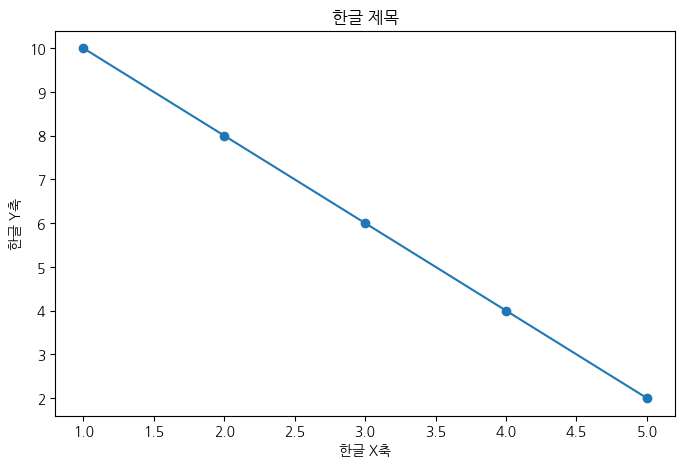

In [1]:
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm

    # 런타임 재시작 후 Nanum 폰트 확인 및 설정
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = fm.FontProperties(fname=font_path)

    # 전역 폰트 설정
    plt.rc('font', family='NanumGothic')
    # 마이너스 기호 깨짐 방지
    plt.rcParams['axes.unicode_minus'] = False

    print("한글 폰트 'NanumGothic' 설정 완료.")

    # 이제 그래프에 한글 사용 가능 (test 용)
    fig, ax = plt.subplots(figsize=(8, 5))
    x = [1, 2, 3, 4, 5]
    y = [10, 8, 6, 4, 2]
    ax.plot(x, y, marker='o')
    ax.set_title('한글 제목')
    ax.set_xlabel('한글 X축')
    ax.set_ylabel('한글 Y축')
    plt.show()

# **기존 데이터셋**


# **1. 프로젝트 준비 및 탐색**

# 신규노선 항공운임예측



# **1.1. 프로젝트 정의 및 목표 설정**

본 프로젝트의 목표는 항공 운임(Airfare)을 예측하는 회귀 모델을 개발하는 것이다. 사용자는 항공편의 출발지, 도착지, 경유 여부, 항공사 등의 정보를 기반으로 해당 항공권의 가격을 예측하고자 한다. 이는 가격 책정 전략 수립, 경쟁사 분석, 고객 맞춤형 요금 제안 등에 활용될 수 있다.



● 데이터 정의 (Data Definition)

본 프로젝트에서는 제공된 Airfares_simple_garbled.csv 데이터를 사용한다. 해당 데이터는 항공 운임에 영향을 줄 수 있는 다양한 변수(출발지, 도착지, 항공사, 여행일, 경유 여부 등)와 실제 운임 정보를 포함하고 있으며, 데이터 출처는 항공권 가격 조사에서 수집된 것으로 추정된다. 다만, 원본 데이터에는 일부 오류 혹은 비정상적인 값이 포함되어 있어 추가적인 정제 작업이 필요하다.



● 성공 지표 설정 (Success Metrics)

예측 모델의 성능 평가는 Root Mean Squared Error (RMSE) 와 Mean Absolute Error (MAE) 를 기준으로 한다. 다음과 같은 성능 기준을 목표로 설정한다:

RMSE: 40 이하

MAE: 30 이하

이는 항공권 가격 예측의 오차가 실제 비즈니스에 유의미하게 작용할 수 있는 수준을 고려한 수치이다.




● 기대 효과 및 제약 조건 (Expected Impact & Constraints)

기대 효과:

-고객에게 보다 정확한 예상 항공권 가격을 제공하여 구매 결정 지원

-항공사 또는 여행 플랫폼에서 가격 예측 기반 맞춤 추천 가능

# **1.2. 데이터 수집 및 로드**

In [2]:
# 원본 데이터셋 로드
from google.colab import files
uploaded = files.upload()

Saving Airfares.csv to Airfares.csv


In [3]:
# pandas 라이브러리 불러오기
import pandas as pd

# 원본 데이터셋
df = pd.read_csv('Airfares.csv')

# **1.3.	데이터 탐색 (Exploratory Data Analysis - EDA) - Part 1: 기초 탐색**

In [4]:
# 데이터프레임 기본 정보 출력
print("✅ 데이터 기본 정보:")
print(df.info())
print("\n✅ 데이터 상위 5행:")
print(df.head())
print("\n✅ 기술통계 요약:")
print(df.describe(include='all'))

✅ 데이터 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S_CODE    638 non-null    object 
 1   S_CITY    638 non-null    object 
 2   E_CODE    638 non-null    object 
 3   E_CITY    638 non-null    object 
 4   COUPON    638 non-null    float64
 5   NEW       638 non-null    int64  
 6   VACATION  638 non-null    object 
 7   SW        638 non-null    object 
 8   HI        638 non-null    float64
 9   S_INCOME  638 non-null    float64
 10  E_INCOME  638 non-null    float64
 11  S_POP     638 non-null    int64  
 12  E_POP     638 non-null    int64  
 13  SLOT      638 non-null    object 
 14  GATE      638 non-null    object 
 15  DISTANCE  638 non-null    int64  
 16  PAX       638 non-null    int64  
 17  FARE      638 non-null    float64
dtypes: float64(5), int64(5), object(8)
memory usage: 89.8+ KB
None

✅ 데이터 상위 5행:
  S_CODE            

로드된 데이터는 총 638개의 행과 18개의 열로 구성되어 있으며, 각 열은 출발지/도착지 정보, 인구 및 소득, 항공편 특성, 거리, 여객 수, 요금 등의 변수로 이루어져 있다. df.info()와 df.describe() 함수를 통해 데이터 타입과 결측치 유무, 변수별 기초 통계값을 확인하였다. 전체적으로 결측치는 존재하지 않으며, 수치형 및 범주형 변수가 혼합된 구조를 가지고 있음을 파악하였다.

In [5]:
# 수치형 데이터만 추출하여 요약 통계 확인
df.describe()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,638.000000,638.000000,638.000000,638.000000,638.000000,6.380000e+02,6.380000e+02,638.000000,638.000000,638.000000
mean,1.202335,2.753918,4442.141129,27759.860502,27663.727273,4.557004e+06,3.194503e+06,975.653605,12782.214734,160.876677
std,0.203821,0.760448,1724.267051,3596.207837,4611.325018,3.010985e+06,2.735604e+06,646.242403,13202.228860,76.022436
min,1.000000,0.000000,1230.480000,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,42.470000
25%,1.040000,3.000000,3090.137500,24706.000000,23903.000000,1.862106e+06,1.228816e+06,455.000000,5328.500000,106.290000
50%,1.150000,3.000000,4208.185000,28637.000000,26409.000000,3.532657e+06,2.195215e+06,850.000000,7792.000000,144.600000
75%,1.297500,3.000000,5480.575000,29693.500000,31981.000000,7.830332e+06,4.549784e+06,1306.250000,14090.500000,209.350000
max,1.940000,3.000000,10000.000000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,2764.000000,73892.000000,402.020000


총 10개의 수치형 변수에 대해 요약 통계를 확인하였다.

FARE의 평균은 160.88, 중앙값은 144.60으로 **우측에 긴 꼬리 분포(Positive Skew)**가 있음.

표준편차는 76.02로, 분산이 크고 다양한 요금대가 존재함.

PAX(여객 수)의 최대값은 73,892명으로, 다른 평균 값에 비해 매우 높아 이상치 존재 가능성을 시사함.

In [6]:
# 범주형 변수 고유값과 빈도수 확인
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n📌 {col} 고유값 및 빈도수:")
    print(df[col].value_counts())


📌 S_CODE 고유값 및 빈도수:
S_CODE
*      454
ORD     45
MDW     45
EWR     30
JFK     29
LGA     29
IAD      3
DCA      3
Name: count, dtype: int64

📌 S_CITY 고유값 및 빈도수:
S_CITY
Chicago             IL    90
New York/Newark     NY    88
Atlanta             GA    41
Dallas/Fort Worth   TX    36
Los Angeles         CA    33
Boston              MA    31
Las Vegas           NV    26
Detroit             MI    22
Denver              CO    22
Houston             TX    20
Orlando             FL    15
Phoenix             AZ    15
Seattle/Tacoma      WA    12
Minneapolis/St Paul MN    12
Miami               FL    11
Fort Lauderdale     FL    11
Kansas City         MO    11
Austin              TX    10
Cleveland           OH    10
Columbus            OH    10
San Diego           CA     9
Albuquerque         NM     9
San Francisco       CA     8
Burbank             CA     7
New Orleans         LA     7
Cincinnati          OH     6
Philadelphia/Camden PA     6
Oakland             CA     6
Washington        

VACATION: No가 468건으로 대부분, Yes는 170건으로 소수

SW: No가 444건, Yes가 194건

S_CITY, E_CITY: 출발지는 51개 도시, 도착지는 68개 도시로 다양한 항공편 조합을 가짐

SLOT, GATE: Free, Controlled로 나뉘며, Free가 각각 456건, 514건으로 많음

In [7]:
# 결측치 개수 및 비율 확인
missing = df.isnull().sum()
missing_ratio = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing Ratio (%)': missing_ratio})
print(missing_df)

          Missing Count  Missing Ratio (%)
S_CODE                0                0.0
S_CITY                0                0.0
E_CODE                0                0.0
E_CITY                0                0.0
COUPON                0                0.0
NEW                   0                0.0
VACATION              0                0.0
SW                    0                0.0
HI                    0                0.0
S_INCOME              0                0.0
E_INCOME              0                0.0
S_POP                 0                0.0
E_POP                 0                0.0
SLOT                  0                0.0
GATE                  0                0.0
DISTANCE              0                0.0
PAX                   0                0.0
FARE                  0                0.0


모든 변수에서 결측치는 0건이며, Missing Ratio(%) = 0.0

추가적인 결측치 처리나 보간은 불필요하며, 데이터 품질이 우수함

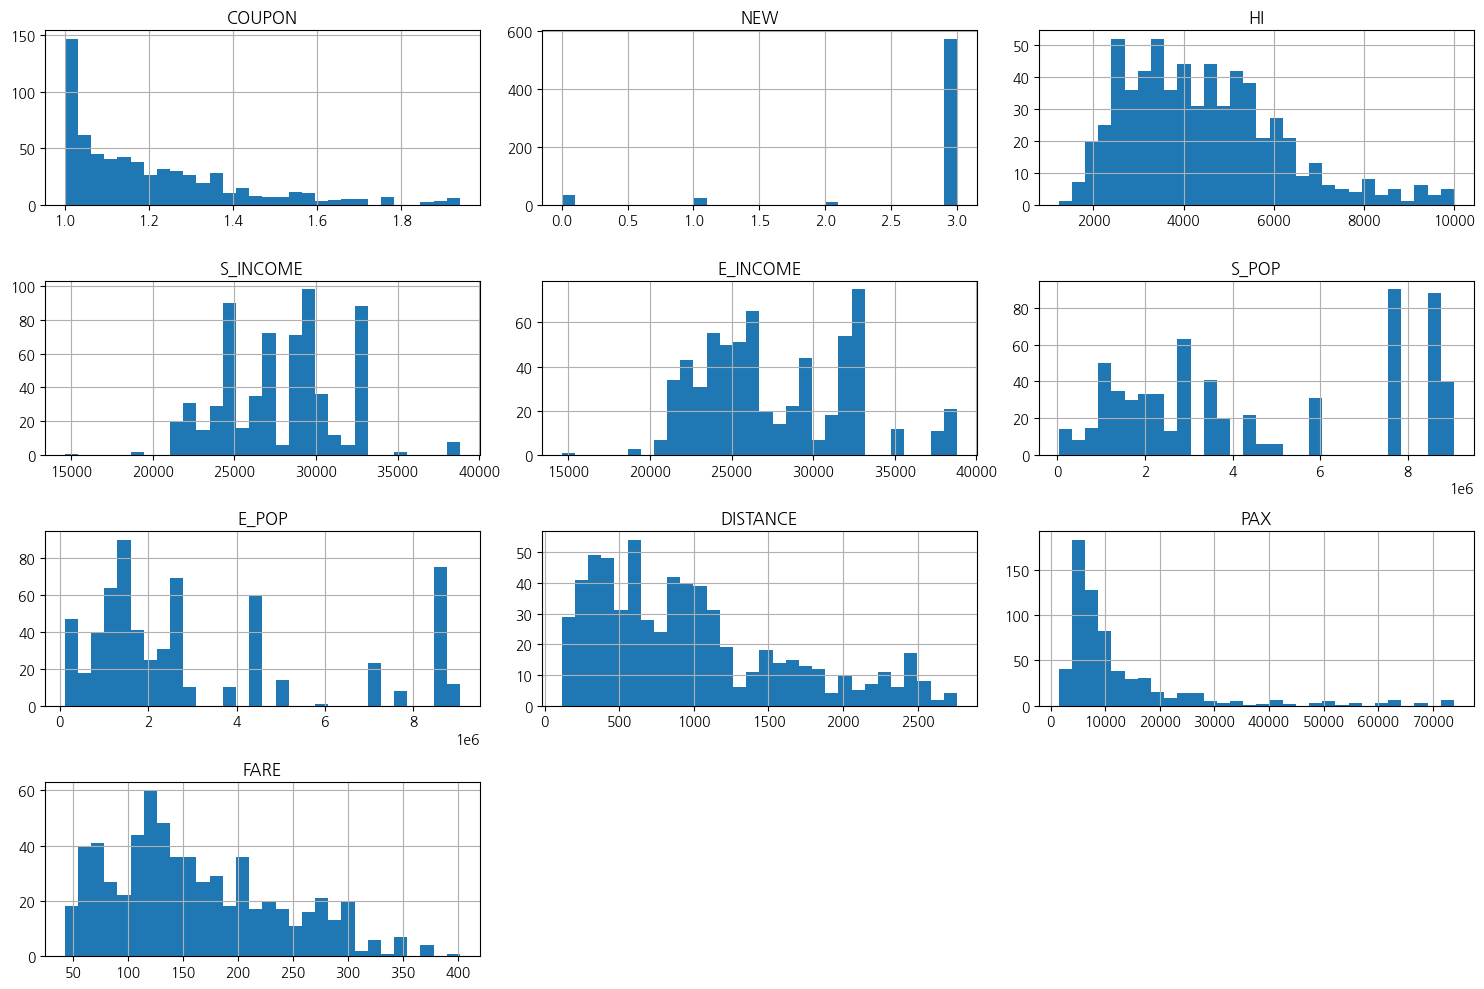

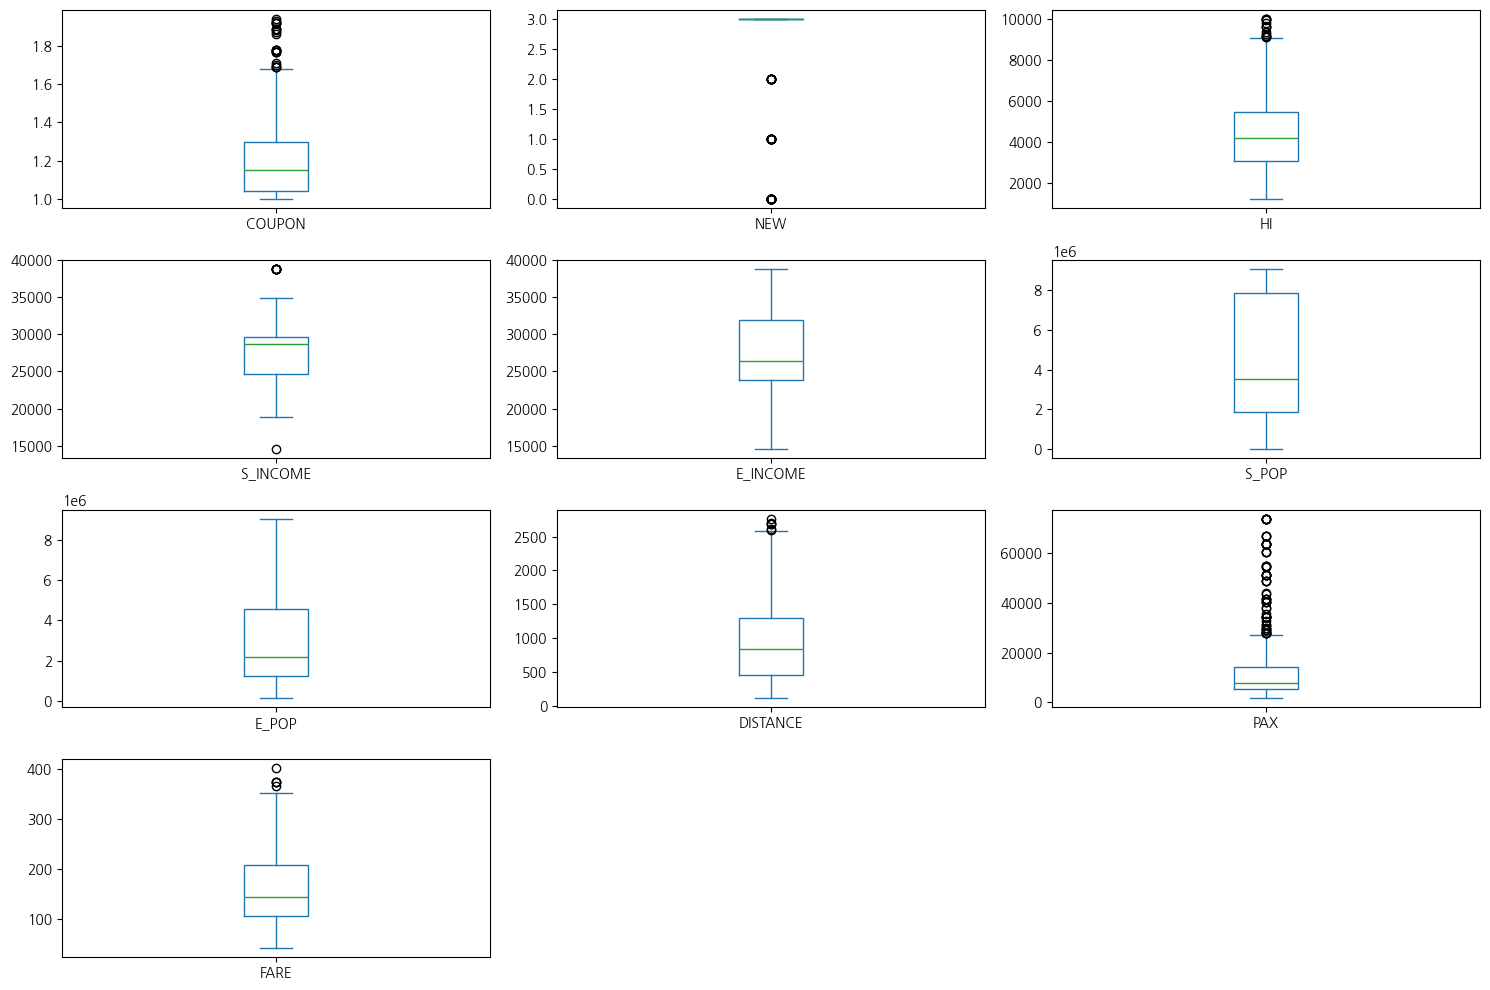

In [8]:
import matplotlib.pyplot as plt

# 히스토그램
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# 박스플롯
df.plot(kind='box', subplots=True, layout=(4, 3), figsize=(15, 10), sharex=False)
plt.tight_layout()
plt.show()

FARE, HI, PAX 등 일부 변수에서 길게 뻗은 꼬리와 이상치 점들이 확인됨

특히 PAX는 7만 명을 초과하는 극단값으로, 스케일 조정이나 이상치 제거 필요성 존재

HI는 최대 10,000 이상으로 극단적으로 높은 값이 분포되어 있음

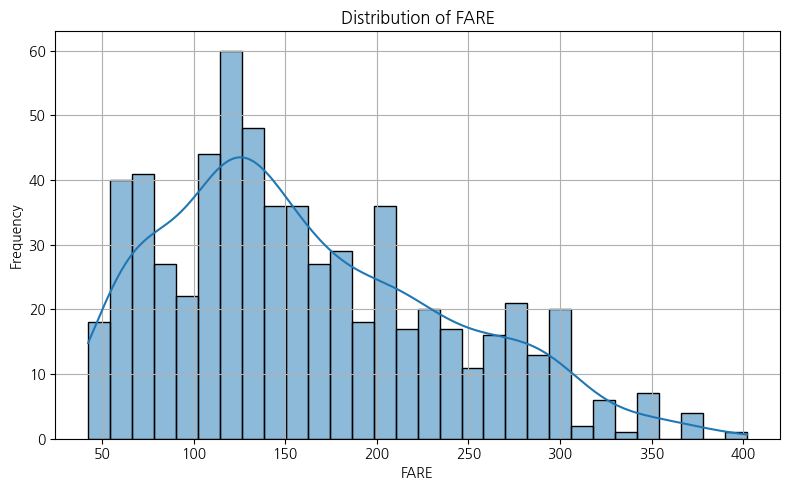

In [9]:
import seaborn as sns

# 타겟 변수 시각화
plt.figure(figsize=(8, 5))
sns.histplot(df['FARE'], bins=30, kde=True)
plt.title("Distribution of FARE")
plt.xlabel("FARE")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


FARE 분포는 정규분포가 아닌 비대칭 분포이며, 오른쪽 꼬리가 긴 분포를 보임

평균보다 높은 고가 항공 요금이 일부 존재하며, 예측 모델의 정밀도를 위해 로그 변환 등의 정규화가 필요할 수 있음

KDE곡선으로 보면 대부분의 요금은 100~200달러에 집중되어 있음

왜도(Skewness) 결과, AMOUNT, DURATION, AGE 변수는 모두 **양의 왜도(> 0)**를 보였다.

특히 AMOUNT는 왜도가 약 1.95로 오른쪽 꼬리가 길게 분포된 비대칭 형태임을 나타낸다.

이는 고액 대출 사례가 소수 존재함을 의미하며, 로그 변환 등의 정규화가 필요할 수 있다.


첨도(Kurtosis) 결과, AMOUNT는 첨도가 5.7로 **뾰족한 분포(Leptokurtic)**이며,
이는 평균 부근에 많은 값이 몰려 있고, 동시에 극단값(이상치)도 존재함을 의미한다.

반면 AGE, DURATION 등은 첨도가 3에 가까워 정규분포에 비교적 유사한 형태를 보인다.

-----------------------------------------------------------------------------


여기까지가 기존 데이터셋 Phase 1 프로젝트 준비 및 탐색이었고 밑으로는 교수님께서 새로 주신 변경된 데이터셋 Phase 1 입니다!!

# **변경된 데이터셋**

# **1. 프로젝트 준비 및 탐색**

# 신규노선 항공운임예측




# **1.1. 프로젝트 정의 및 목표 설정**

📌 문제 정의

항공 요금 예측 정확도를 개선하기 위해, 기존 모델에 더해 K-NN, 랜덤 포레스트 등의 추가 모델을 구축하고, 성능 비교를 통해 최적 모델을 탐색한다. 이를 통해 소비자 및 항공사의 합리적 의사결정을 지원할 수 있는 예측 시스템을 고도화한다.



🧾 데이터 정의

사용 데이터: 수정된 Airfares_simple_garbled.csv


전처리 사항:

결측치 존재 여부 확인 및 제거

이상치 탐지 (예: 음수 Amount) 및 처리

문자열 비일관성 (예: 대소문자 혼용, 공백 포함)을 통일

범위 오류 (불가능한 값) 확인 및 수정



🎯 성공 지표

모델 예측 정확도: RMSE (Root Mean Squared Error), MAE (Mean Absolute Error)

모델 성능 비교를 통해 기존 모델 대비 예측력 향상 여부를 검증

과적합 여부를 고려한 일반화 성능 (검증셋 기준)



💡 기대 효과 및 제약 조건

기대 효과:


다양한 모델 비교를 통한 최적 예측모델 도출

데이터 정제에 기반한 신뢰도 높은 분석 결과 확보

항공 요금 정책 또는 소비자 의사결정에 유용한 인사이트 제공



제약 조건:

이상치·결측치 수정 과정에서 정보 손실 발생 가능

고차원 특성을 고려하지 않는 경우 일부 모델에서 성능 저하 가능성

데이터 출처와 구성상, 실제 시장의 복잡성을 완전 반영하기는 어려움

# **1.2. 데이터 수집 및 로드**

In [10]:
# 수정된 데이터셋 로드
uploaded = files.upload()
from google.colab import files

Saving Airfares_simple_garbled.csv to Airfares_simple_garbled.csv


In [11]:
import pandas as pd
# 수정된 데이터셋 변수
df2 = pd.read_csv("Airfares_simple_garbled.csv")

# **1.3.	데이터 탐색 (Exploratory Data Analysis - EDA) - Part 1: 기초 탐색**

In [12]:
# ✅ 수치형 데이터 기술 통계량 확인
df2.describe()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,648.000000,648.000000,648.000000,616.000000,615.000000,6.480000e+02,6.480000e+02,617.000000,617.000000,648.000000
mean,1.201944,2.756173,4443.943380,27742.331169,27545.308943,4.561558e+06,3.190555e+06,1047.669368,12657.116694,158.158827
std,0.202933,0.755685,1722.601245,3590.301994,4609.631624,3.015805e+06,2.730106e+06,1267.277578,12917.285290,82.132518
min,1.000000,0.000000,1230.480000,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,-234.150000
25%,1.040000,3.000000,3095.872500,24706.000000,23903.000000,1.862106e+06,1.228816e+06,450.000000,5275.000000,105.340000
50%,1.150000,3.000000,4208.185000,27994.000000,26409.000000,3.532657e+06,2.195215e+06,844.000000,7785.000000,143.440000
75%,1.300000,3.000000,5485.617500,29260.000000,31981.000000,7.830332e+06,4.549784e+06,1389.000000,14005.000000,209.350000
max,1.940000,3.000000,10000.000000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,24440.000000,73892.000000,402.020000


FARE 변수는 평균 약 158, 최소값은 -234, 최대값은 402로 나타났으며, 음수 운임이 존재해 데이터 오류 가능성이 있다.

DISTANCE와 PAX도 최대값 기준으로 이상치가 포함되어 있을 수 있다.

In [13]:
# ✅ 범주형 변수: 고유값 및 빈도수 확인
categorical_cols = df2.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n📌 {col} (고유값 {df2[col].nunique()}개)")
    print(df2[col].value_counts())


📌 S_CODE (고유값 8개)
S_CODE
*      462
ORD     45
MDW     45
EWR     31
JFK     30
LGA     29
IAD      3
DCA      3
Name: count, dtype: int64

📌 S_CITY (고유값 64개)
S_CITY
New York/Newark     NY    89
Chicago             IL    86
Atlanta             GA    40
Dallas/Fort Worth   TX    38
Los Angeles         CA    34
                          ..
san francisco       ca     1
Anchorage           AK     1
Pittsburgh          PA     1
new orleans         la     1
phoenix             az     1
Name: count, Length: 64, dtype: int64

📌 E_CODE (고유값 8개)
E_CODE
*      509
DCA     28
IAD     27
JFK     26
EWR     25
LGA     25
MDW      4
ORD      4
Name: count, dtype: int64

📌 E_CITY (고유값 81개)
E_CITY
New York/Newark     NY        73
Washington          DC        55
Phoenix             AZ        24
Orlando             FL        23
Baltimore/Wash Intl MD        23
                              ..
  San Francisco       CA       1
Spokane             WA         1
  San Jose            CA       1
  Tucson    

SW, VACATION, SLOT, GATE 등의 변수는 각각 2~3개의 고유값으로 구성되어 있었으며, 일부 변수(VACATION)는 대소문자 불일치로 값이 나뉘어 있는 것으로 보였다.

**결측치, 이상치 탐색**

In [14]:
# 1. 결측치 찾기
missing_counts = df2.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]

print("=== 1. 결측치 (Missing Values) ===")
print(missing_cols, "\n")

=== 1. 결측치 (Missing Values) ===
S_INCOME    32
E_INCOME    33
DISTANCE    31
PAX         31
dtype: int64 



S_INCOME, E_INCOME, DISTANCE, PAX에서 결측치가 확인되었으며, 각각 약 4~5% 정도의 비율을 차지한다.

In [15]:
# 2. 문자열 공백(Whitespace) 찾기
print("=== 2. 문자열 공백(Whitespace) 문제 ===")
whitespace_issues = {}  # 공백 발생한 값 담을 딕셔너리

for col in df2.select_dtypes(include='object').columns:  # 문자열 컬럼만 골라서
    mask = df2[col].apply(lambda x: isinstance(x, str) and (x != x.strip()))  # 공백이 있는 값 탐지
    if mask.any():  # 공백이 존재한다면
        whitespace_issues[col] = df2.loc[mask, col]
        print(f"\nColumn: {col}")
        print(df2.loc[mask, col])

=== 2. 문자열 공백(Whitespace) 문제 ===

Column: E_CITY
36       Charlotte           NC  
51       Cleveland           OH  
101      Hartford            CT  
103      Honolulu (Intl)     HI  
113      Houston             TX  
178      Miami               FL  
195      Minneapolis/St Paul MN  
235      New York/Newark     NY  
243      New York/Newark     NY  
275      New York/Newark     NY  
360      Phoenix             AZ  
443      Salt Lake City      UT  
487      San Francisco       CA  
499      San Jose            CA  
568      Tucson              AZ  
Name: E_CITY, dtype: object


In [16]:
# 앞 뒤로 공백있는 문자열 공백값 존재 예시 출력

df['E_CITY'][36]

'Charlotte           NC'

In [17]:
# 3. 대소문자 불일치(Case Inconsistency) 찾기
print("\n=== 3. 대소문자 불일치(Case Inconsistency) ===")
case_issues = {}

for col in df2.select_dtypes(include='object').columns:  # 문자열 타입 컬럼만 탐색
    vals = df2[col].dropna().astype(str)                 # 결측치 제거 후 문자열 변환
    lower_vals = vals.str.lower()                        # 모두 소문자로 변환
    unique_lower = lower_vals.unique()                   # 소문자 기준 유니크 값 추출

    for base in unique_lower:
        variants = sorted(vals[lower_vals == base].unique())
        if len(variants) > 1:  # 대소문자 차이가 존재함
            if col not in case_issues:
                case_issues[col] = {}
            case_issues[col][base] = variants

    if col in case_issues:
        print(f"\nColumn: {col}")
        for base, variants in case_issues[col].items():
            print(f"  Base ('{base}') -> Variants: {variants}")


=== 3. 대소문자 불일치(Case Inconsistency) ===

Column: S_CITY
  Base ('atlanta             ga') -> Variants: ['Atlanta             GA', 'atlanta             ga']
  Base ('boston              ma') -> Variants: ['Boston              MA', 'boston              ma']
  Base ('chicago             il') -> Variants: ['Chicago             IL', 'chicago             il']
  Base ('fort lauderdale     fl') -> Variants: ['Fort Lauderdale     FL', 'fort lauderdale     fl']
  Base ('los angeles         ca') -> Variants: ['Los Angeles         CA', 'los angeles         ca']
  Base ('new orleans         la') -> Variants: ['New Orleans         LA', 'new orleans         la']
  Base ('new york/newark     ny') -> Variants: ['New York/Newark     NY', 'new york/newark     ny']
  Base ('orlando             fl') -> Variants: ['Orlando             FL', 'orlando             fl']
  Base ('phoenix             az') -> Variants: ['Phoenix             AZ', 'phoenix             az']
  Base ('san francisco       ca') -> Varian

In [18]:
# 4. 수치형 이상치(Outlier) 찾기 (원본 IQR 기준)
print("\n=== 4. 수치형 이상치 (Outliers) ===")
outlier_indices = {}

for col in df2.select_dtypes(include=['int64', 'float64']).columns:  # 수정된 데이터에서 수치형 컬럼 탐색
    o_col = df[col]  # 원본 데이터의 해당 컬럼 사용
    Q1 = o_col.quantile(0.25)
    Q3 = o_col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    g_col = pd.to_numeric(df2[col], errors='coerce')  # 수정된 데이터에서 숫자로 강제 변환
    mask = (g_col < lower) | (g_col > upper)

    if mask.any():
        outlier_indices[col] = df2.index[mask].tolist()
        print(f"\nColumn: {col} - {len(outlier_indices[col])}개 이상치 발견")
        print(df2.loc[outlier_indices[col][:5], [col]].to_string(index=True))


=== 4. 수치형 이상치 (Outliers) ===

Column: COUPON - 23개 이상치 발견
     COUPON
18     1.86
19     1.93
20     1.87
129    1.71
166    1.92

Column: NEW - 67개 이상치 발견
    NEW
9     2
11    1
31    0
33    1
46    1

Column: HI - 14개 이상치 발견
          HI
2    9185.28
50   9350.13
148  9592.99
197  9249.13
324  9649.01

Column: S_INCOME - 9개 이상치 발견
     S_INCOME
21    38813.0
105   38813.0
129   38813.0
349   14600.0
387   38813.0

Column: DISTANCE - 9개 이상치 발견
     DISTANCE
103    2764.0
106    2679.0
162    2605.0
318   13080.0
376    2603.0

Column: PAX - 57개 이상치 발견
         PAX
42   30877.0
43   30877.0
82   34113.0
83   34113.0
104  32824.0

Column: FARE - 10개 이상치 발견
       FARE
36  -234.15
170 -193.50
346 -229.84
354 -195.91
474  367.72


In [19]:
# 5. 음수 값(Negative Values) 찾기 => 범위오류 (불가능한 값)
print("\n=== 5. 음수 값 (Negative Values) ===")
negative_indices = {}

for col in df2.select_dtypes(include=['int64', 'float64']).columns:  # 수정된 데이터에서 수치형 컬럼 탐색
    g_col = pd.to_numeric(df2[col], errors='coerce')  # 숫자로 강제 변환
    neg_mask = g_col < 0  # 음수인 값만 추출
    if neg_mask.any():
        negative_indices[col] = df2.index[neg_mask].tolist()
        print(f"\nColumn: {col} - {len(negative_indices[col])}개 음수 값 발견")
        print(df2.loc[negative_indices[col][:5], [col]].to_string(index=True))


=== 5. 음수 값 (Negative Values) ===

Column: FARE - 5개 음수 값 발견
       FARE
36  -234.15
170 -193.50
346 -229.84
354 -195.91
562 -123.89


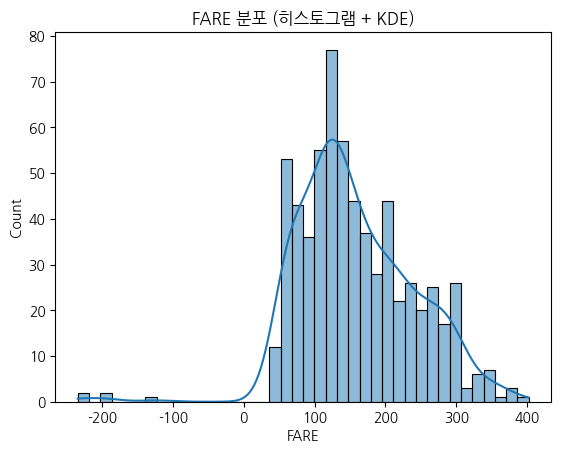

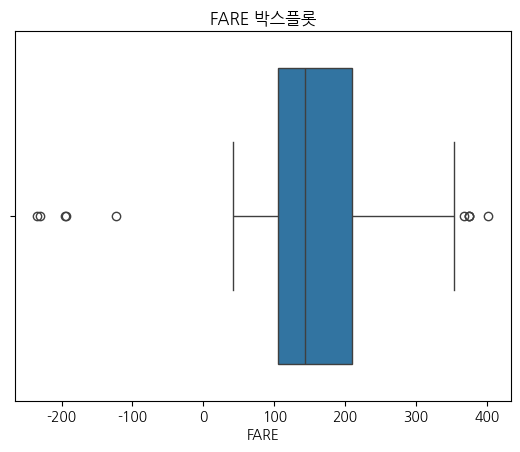

In [20]:
# ✅ 이상치 탐색: 히스토그램 + 박스플롯 (대표 수치형 변수)
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df2['FARE'], bins=40, kde=True)
plt.title("FARE 분포 (히스토그램 + KDE)")
plt.xlabel("FARE")
plt.show()

sns.boxplot(x=df2['FARE'])
plt.title("FARE 박스플롯")
plt.show()

FARE 값은 주로 50~250 사이에 분포하며, 음수 값과 400 이상 값은 드물게 존재한다. 박스플롯에서도 극단값이 다수 존재함을 확인할 수 있다.

In [21]:
# ✅ 왜도 / 첨도 확인
print("Skewness (왜도):", df2['FARE'].skew())
print("Kurtosis (첨도):", df2['FARE'].kurt())

Skewness (왜도): -0.061571389535982075
Kurtosis (첨도): 1.8833914477955025


FARE의 왜도는 약 0.5 이상으로, 오른쪽으로 긴 꼬리를 가진 비대칭 분포이며, 첨도는 1 이상으로 다소 뾰족한 형태를 보였다.

대부분 변수의 평균값과 중앙값 차이는 크지 않으며, 이상값 없이 범위가 일정한 변수들이 많다.


AMOUNT 변수는 평균 약 3,200, 최대값은 18,424로 나타났고, AGE는 최대 75세까지 존재한다.

# **2. 데이터 준비 및 심층 분석 (Data Preparation & In-depth Analysis)- Part 2: 심층 분석**

# **2.1. 변수 유형 분리 및 분포 확인**

In [22]:
# ✅ 필수 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [23]:
# 원본 데이터셋 변수
df = pd.read_csv('Airfares.csv')

In [24]:
# 수정된 데이터셋 변수
df2 = pd.read_csv("Airfares_simple_garbled.csv")

In [25]:
# ✅ 변수 분리 및 초기 설정
TARGET_COLUMN = 'FARE'  # 예측 목표 변수
numeric_cols = df2.select_dtypes(include=[np.number]).columns.tolist()  # 수치형 변수 자동 추출
categorical_cols = df2.select_dtypes(include='object').columns.tolist()  # 범주형 변수 자동 추출
numeric_cols.remove(TARGET_COLUMN)  # 타겟 변수는 제외

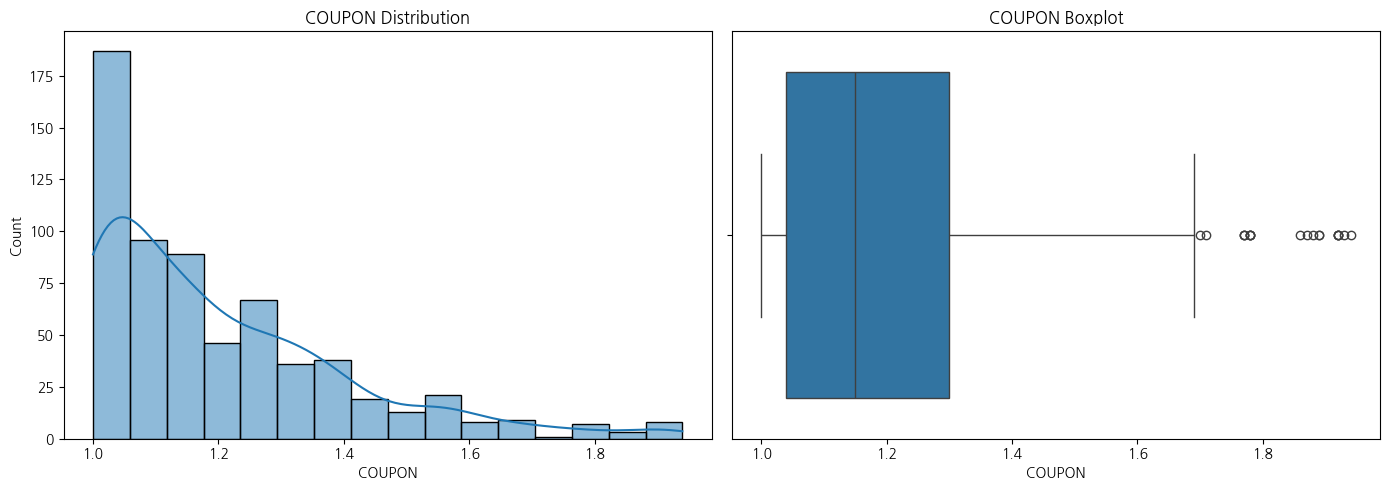

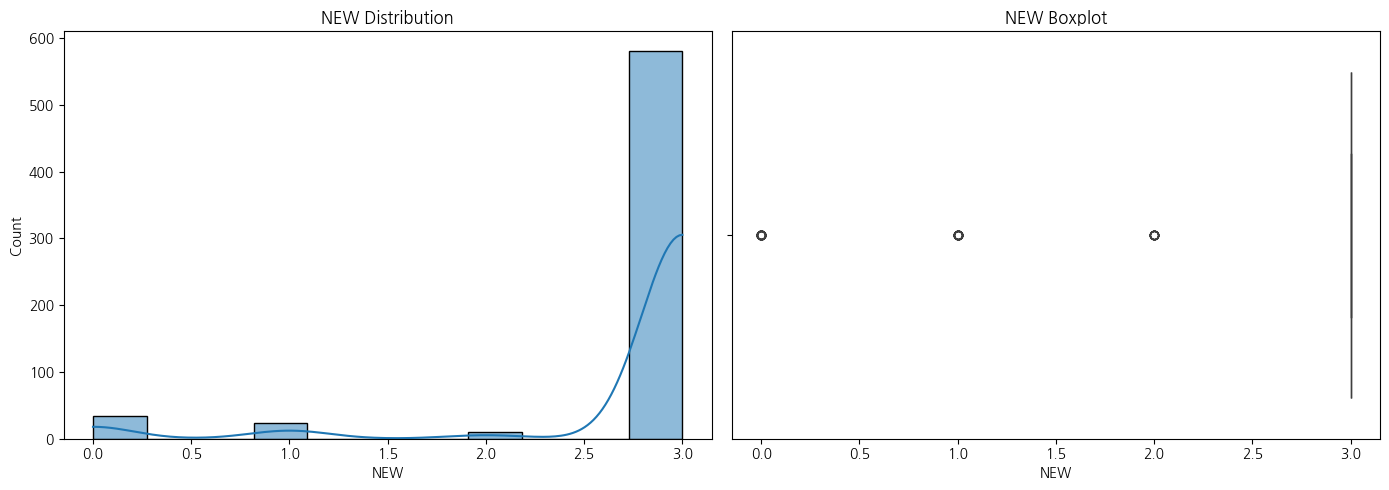

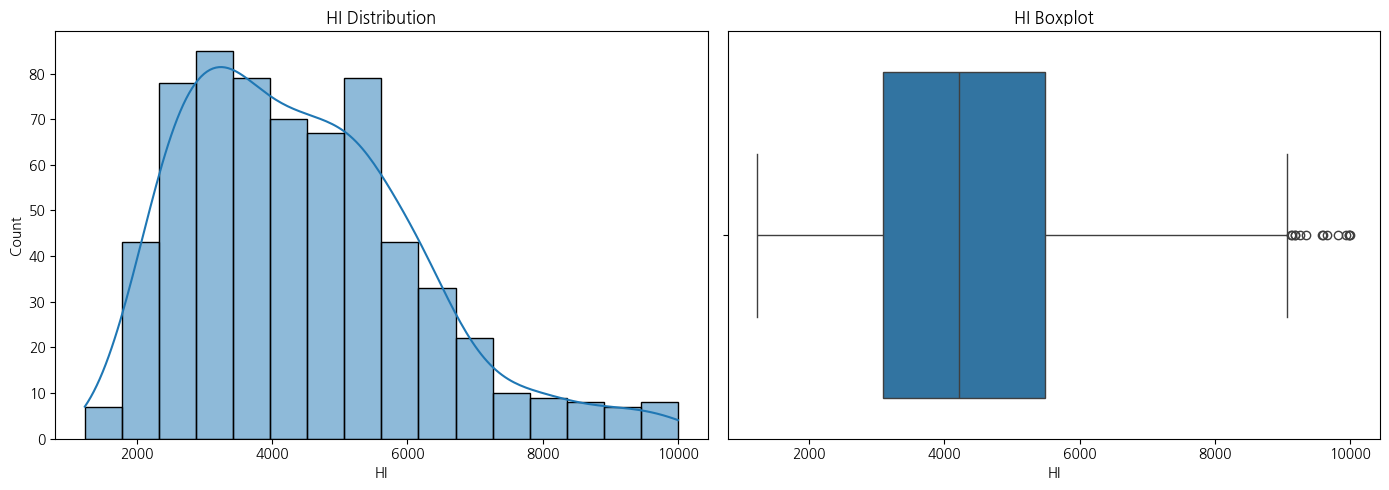

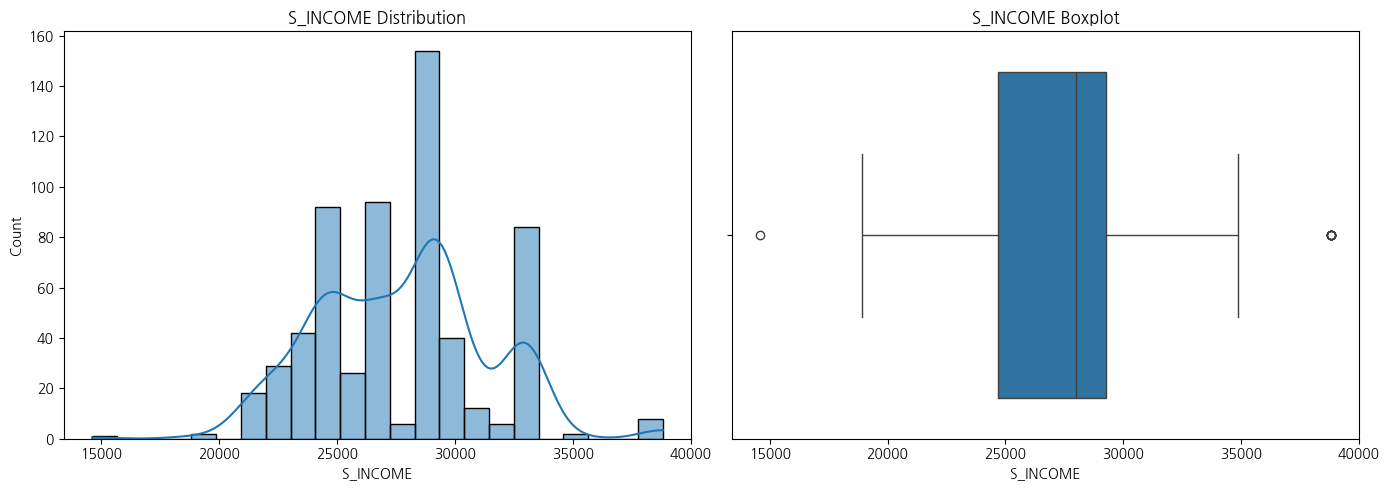

In [26]:
# ✅ 대표 수치형 변수 분포 시각화 (처음 4개)
# 히스토그램 + KDE로 분포 확인 / 박스플롯으로 이상치 확인
sample_numeric = numeric_cols[:4]
for col in sample_numeric:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(df2[col], kde=True, ax=axes[0])
    axes[0].set_title(f'{col} Distribution')  # 분포 확인용
    sns.boxplot(x=df2[col], ax=axes[1])
    axes[1].set_title(f'{col} Boxplot')  # 이상치 확인용
    plt.tight_layout()
    plt.show()

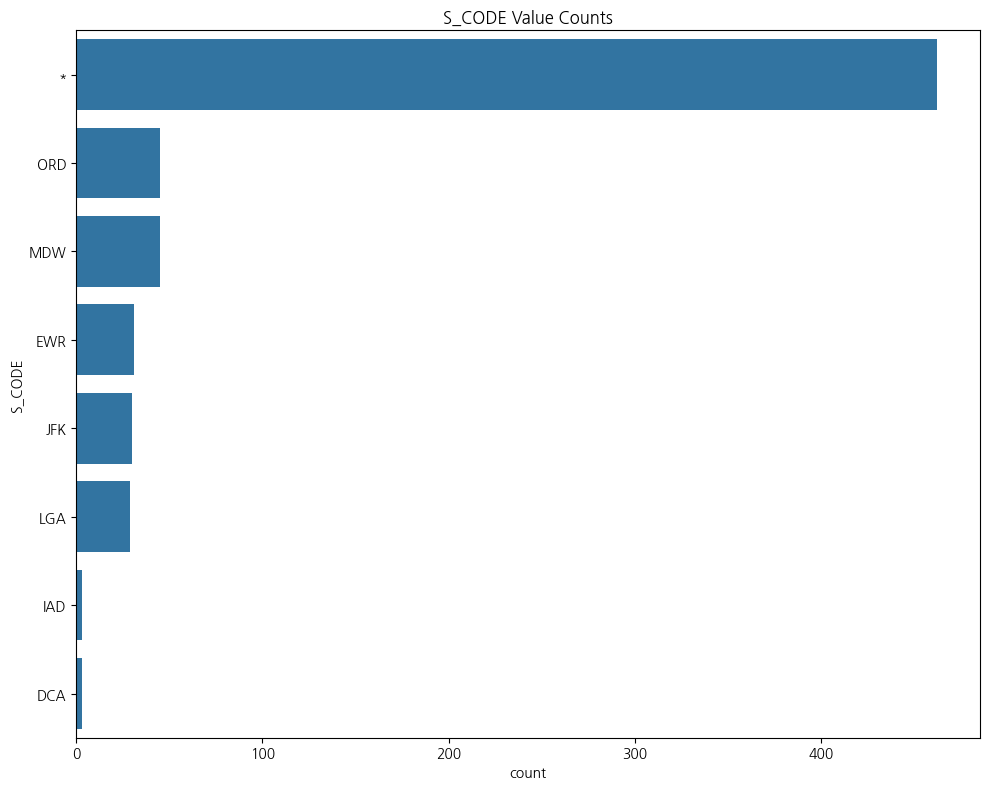

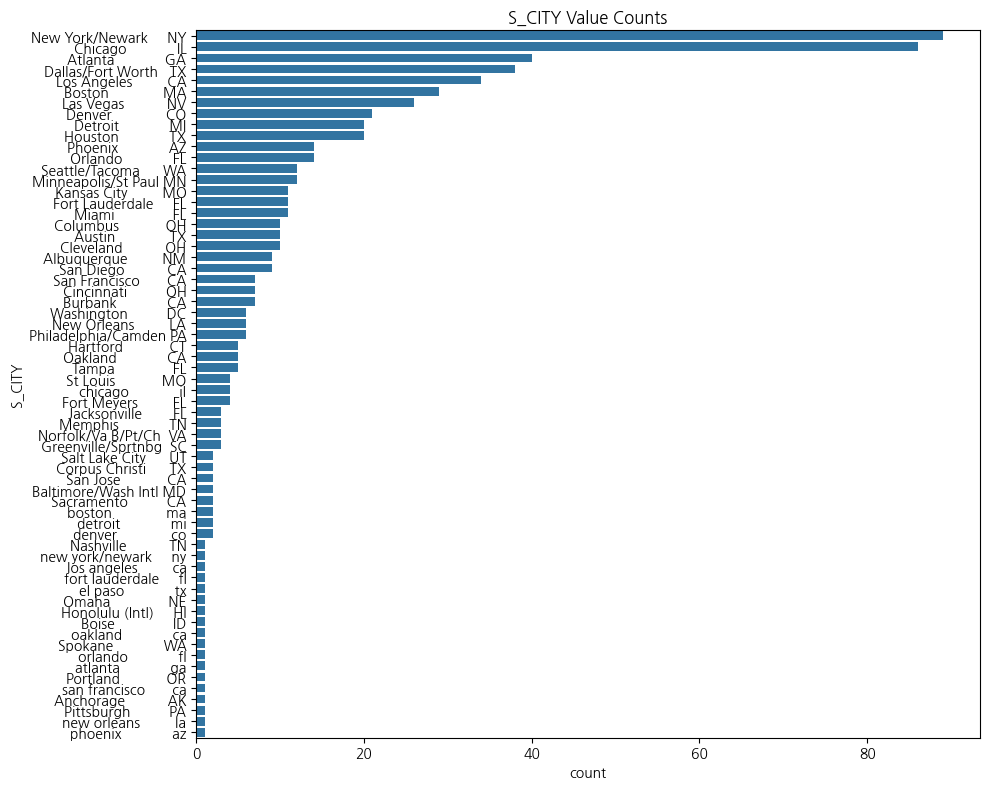

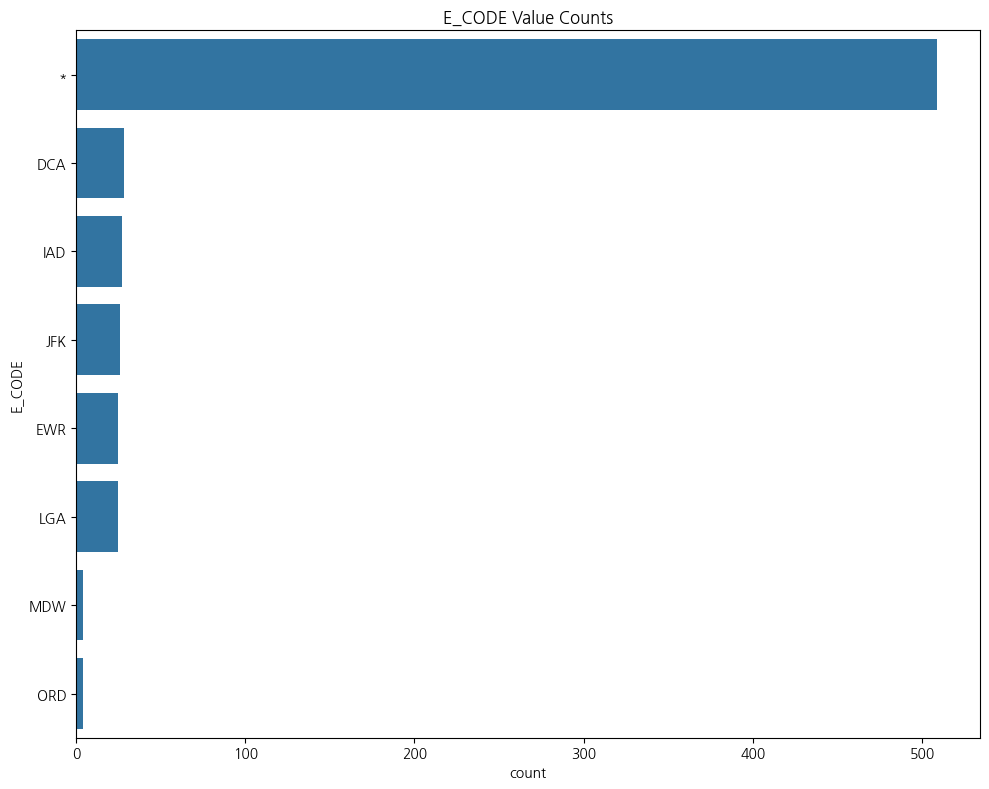

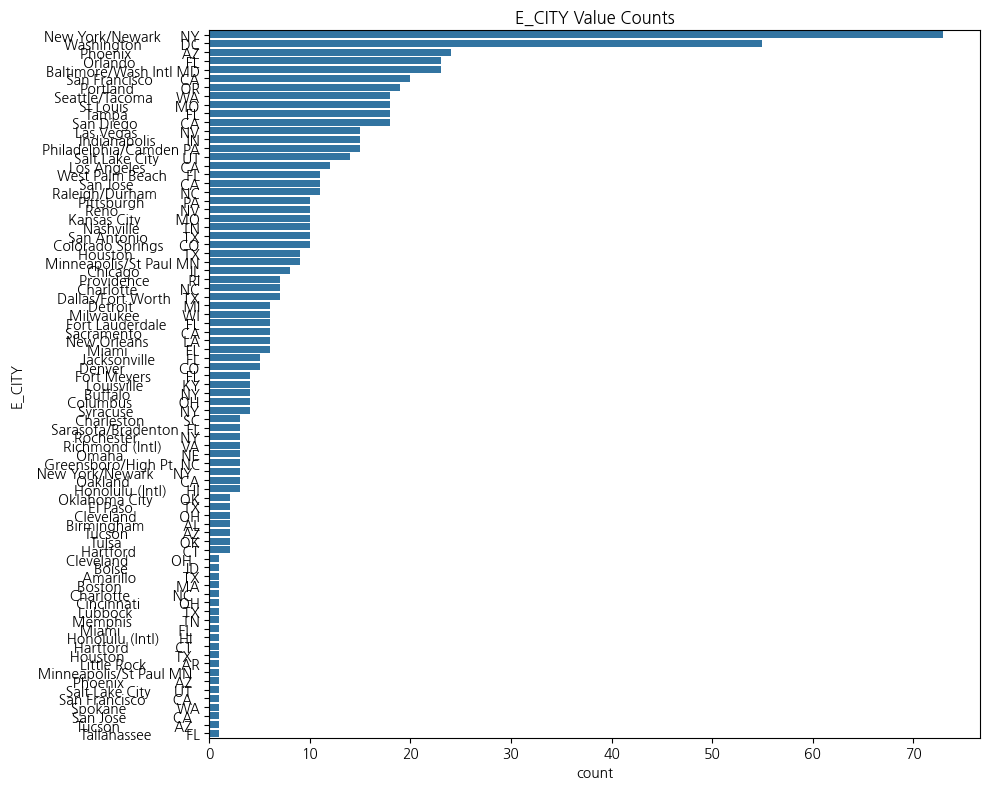

In [27]:
# ✅ 대표 범주형 변수 빈도수 시각화 (처음 4개, 가로 막대)
# 각 범주형 변수의 값 분포를 파악하여 데이터 불균형 여부 확인
sample_categorical = categorical_cols[:4]
for col in sample_categorical:
    plt.figure(figsize=(10, 8))
    order = df2[col].value_counts().index  # 값 많은 순서대로 정렬
    sns.countplot(data=df2, y=col, order=order)
    plt.title(f'{col} Value Counts')  # 범주 빈도 시각화
    plt.tight_layout()
    plt.show()

# **2.2. 변수 간 관계분석(타겟 변수 중심)**

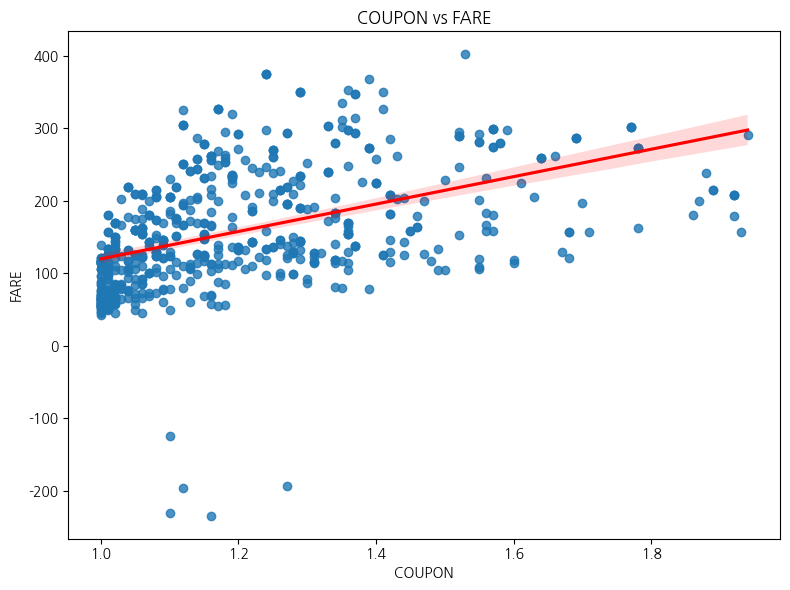

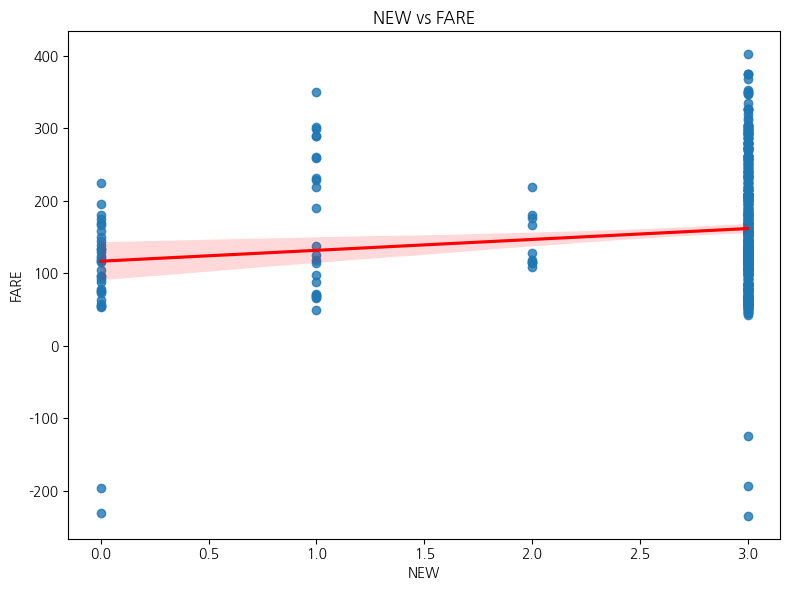

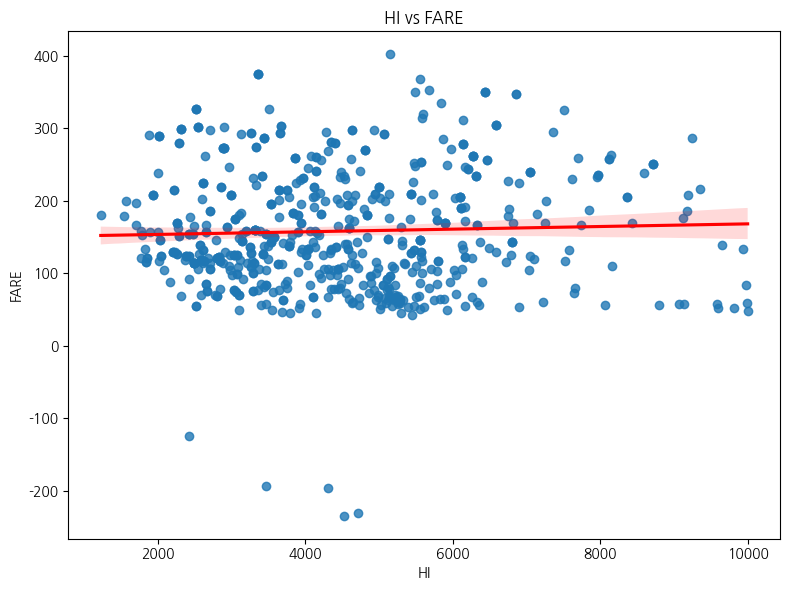

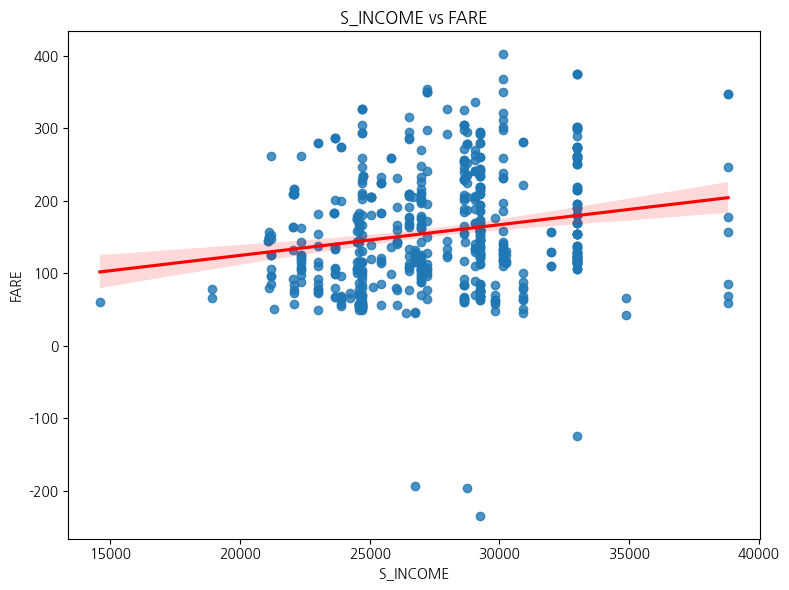

In [28]:
# ✅ 수치형 변수 vs 타겟 변수 관계 시각화 (산점도 + 회귀선)
# 회귀선을 통해 선형적 관계 여부를 시각적으로 확인
for col in sample_numeric:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df2[col], y=df2[TARGET_COLUMN], line_kws={"color": "red"})
    plt.title(f'{col} vs {TARGET_COLUMN}')
    plt.tight_layout()
    plt.show()

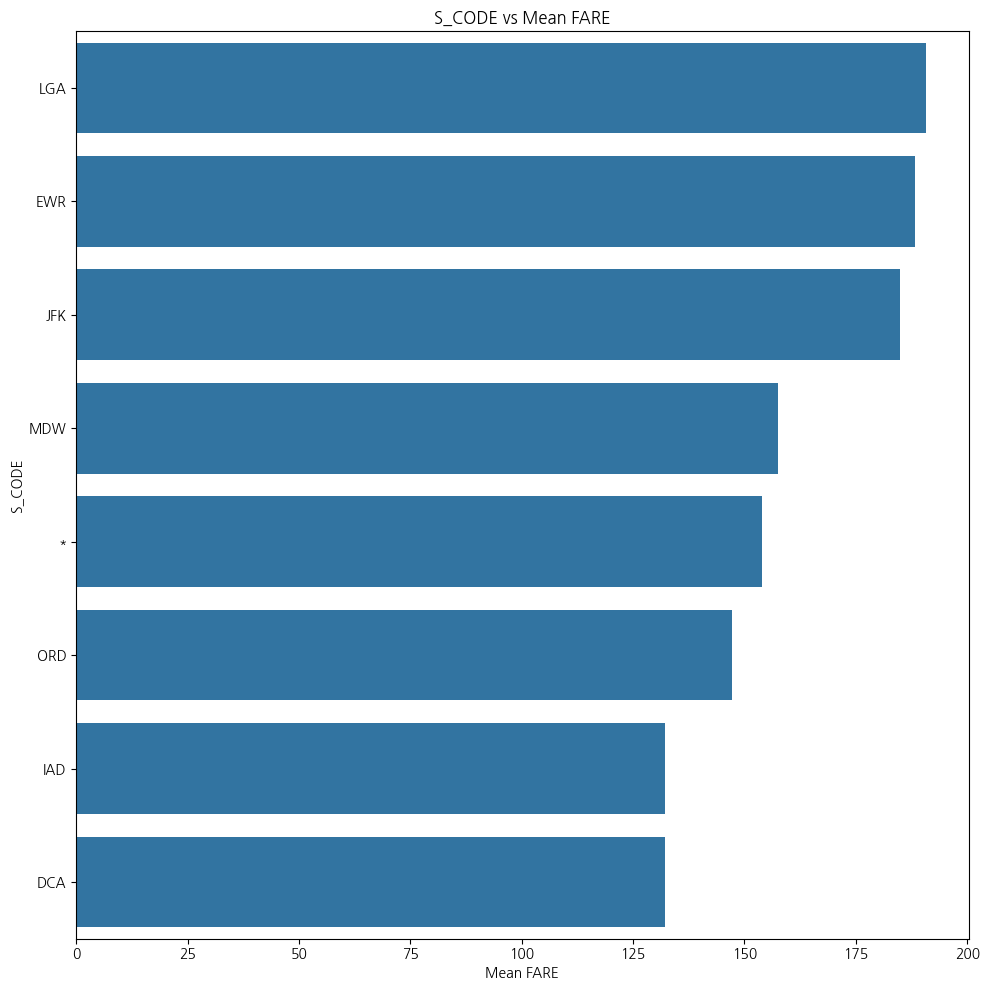

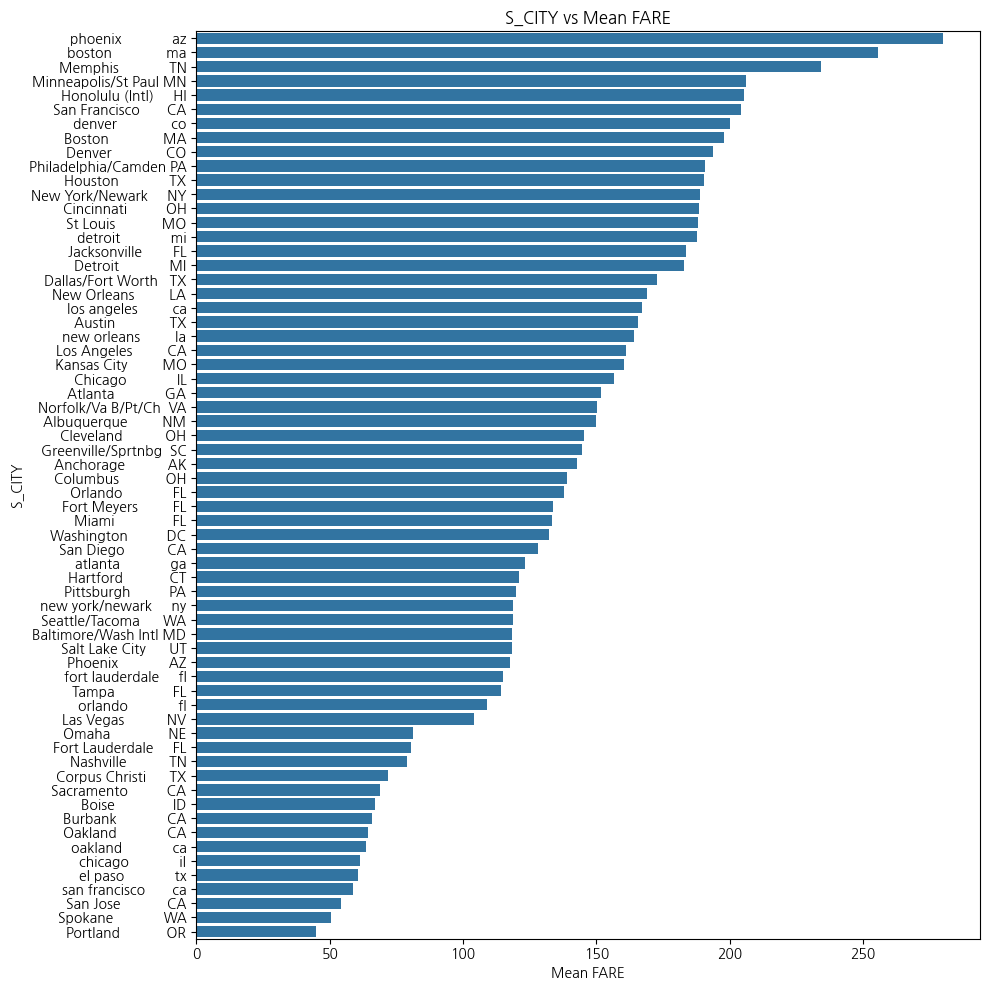

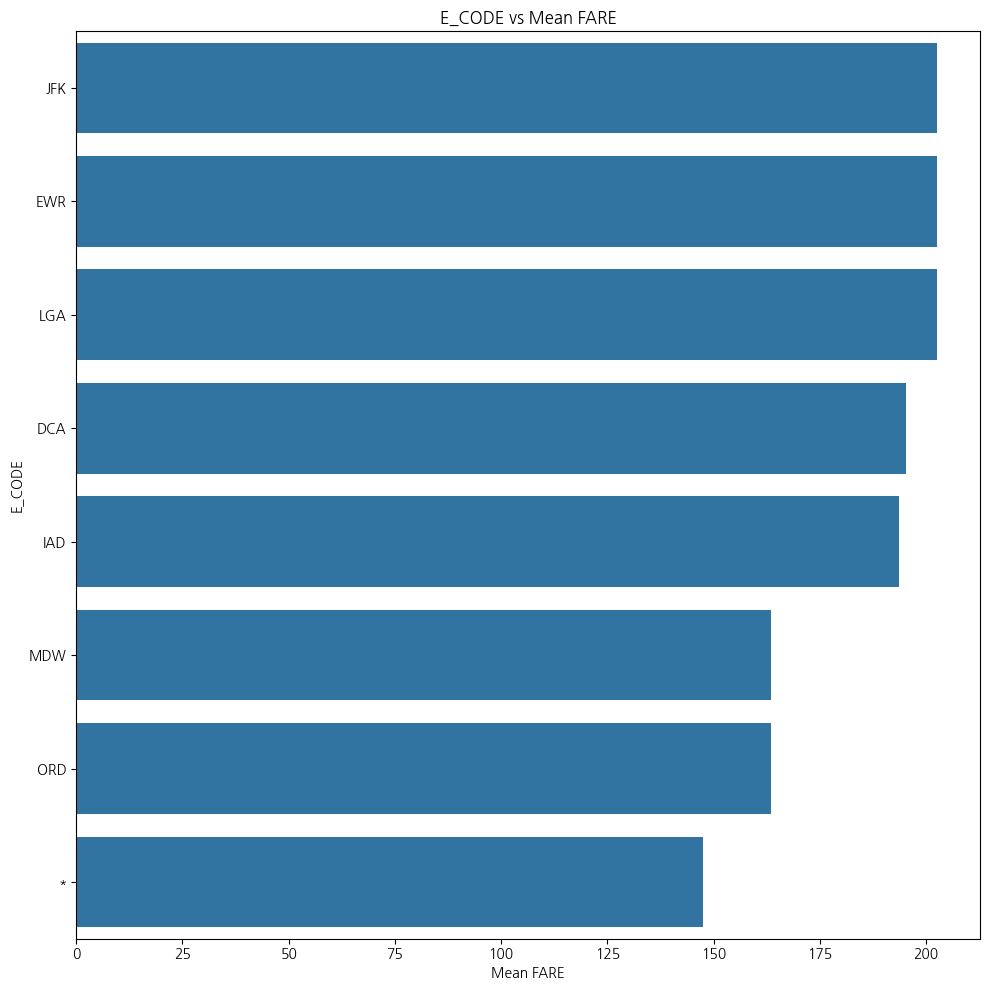

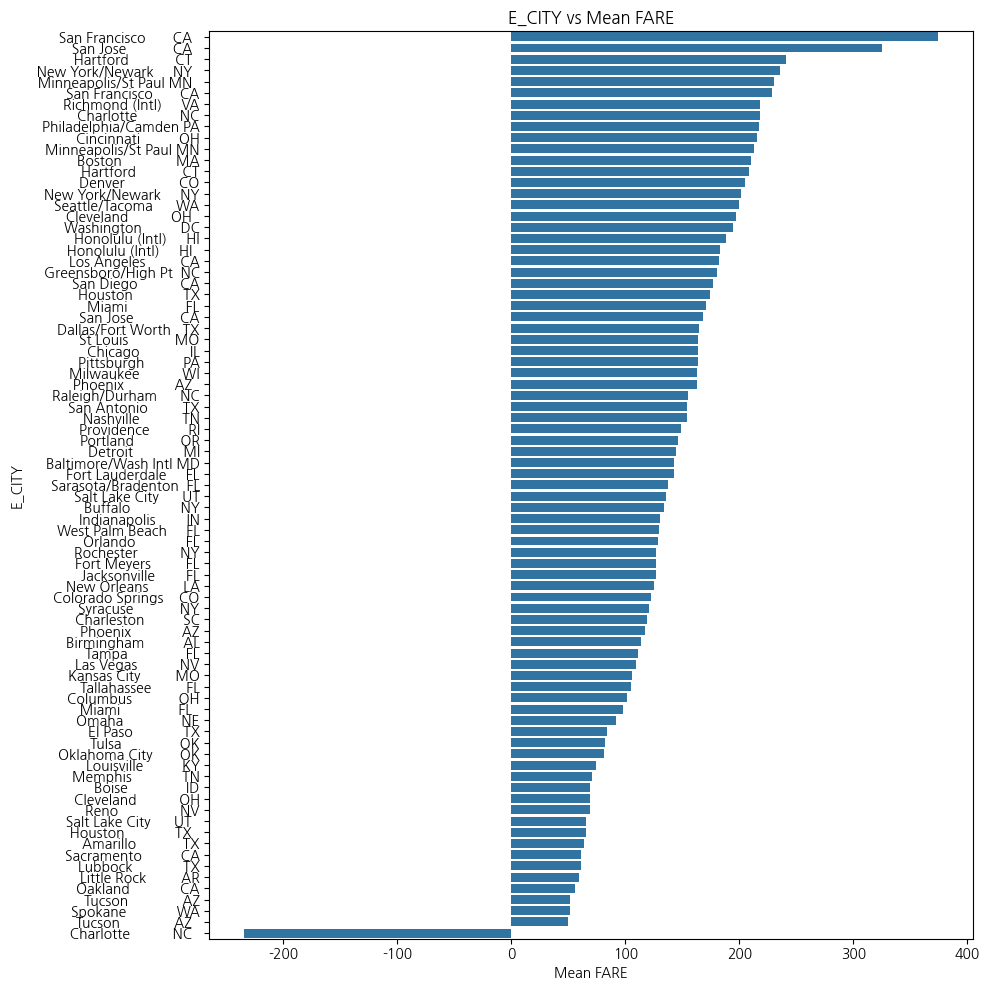

In [29]:
# ✅ 범주형 변수별 타겟 평균 시각화 (바 차트)
# 각 범주에 따라 요금 평균이 어떻게 달라지는지 시각화
for col in sample_categorical:
    plt.figure(figsize=(10, 10))
    category_means = df2.groupby(col)[TARGET_COLUMN].mean().sort_values(ascending=False)
    sns.barplot(y=category_means.index, x=category_means.values)
    plt.title(f'{col} vs Mean {TARGET_COLUMN}')  # 평균 요금 비교
    plt.xlabel(f'Mean {TARGET_COLUMN}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

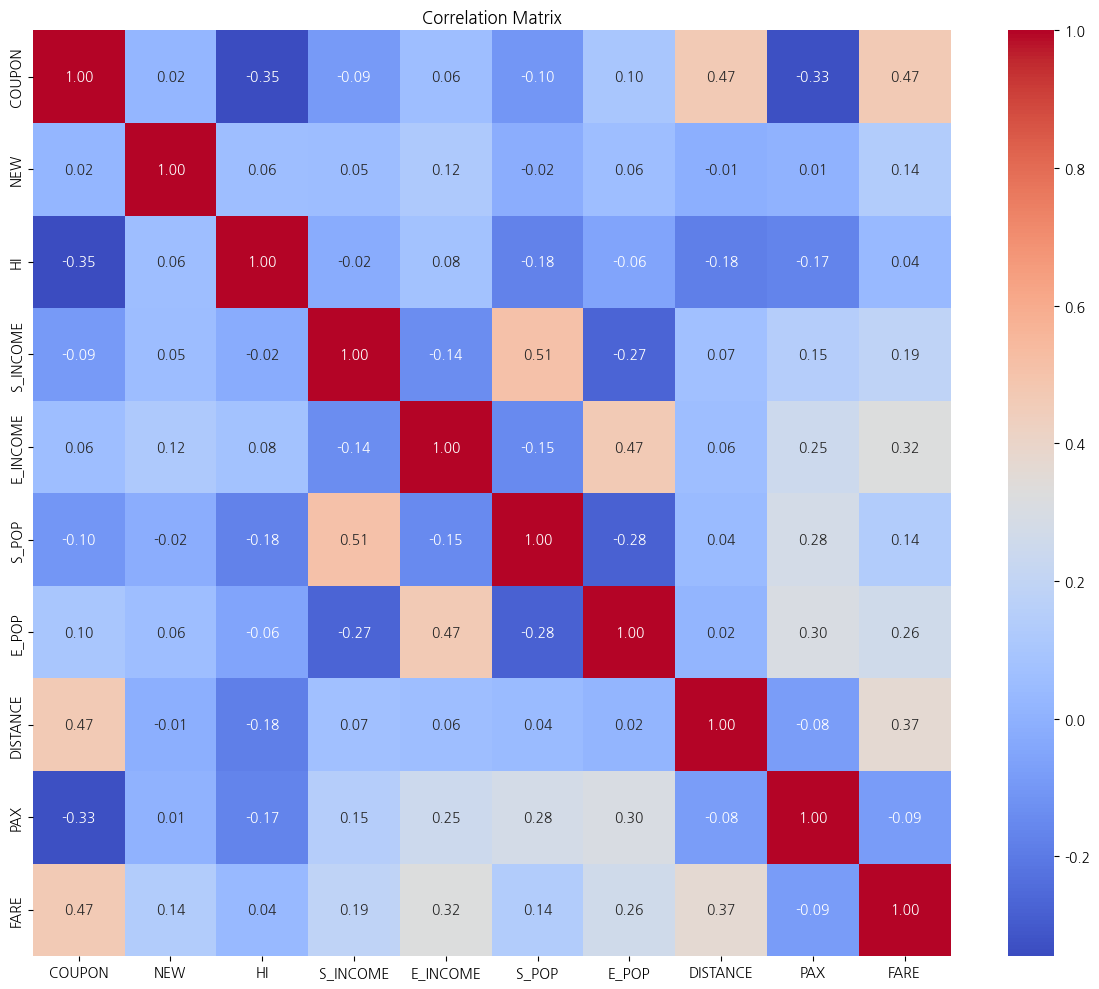

In [30]:
# ✅ 상관관계 히트맵
# 수치형 변수들 간의 상관관계를 한 눈에 시각적으로 확인
plt.figure(figsize=(12, 10))
corr_matrix = df2[numeric_cols + [TARGET_COLUMN]].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")  # 변수 간 상관관계 분석
plt.tight_layout()
plt.show()

# **2.3. 수정된 데이터 값 전처리**
 (결측치, 이상치, 대소문자 불일치, 문자열 공백, 음수값(범위오류))


In [31]:
# 1. 결측치 처리 (숫자형): 원본 데이터의 중앙값(median)으로 대체
numeric_cols = df2.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    median_orig = df[col].median()
    df2[col] = pd.to_numeric(df2[col], errors='coerce')  # 숫자 아닌 경우 NaN 처리
    df2[col] = df2[col].fillna(median_orig)

In [32]:
# 결측치 처리 확인
missing_counts = df2.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]
print("=== 1. 결측치 (Missing Values) ===")
print(missing_cols, "\n")

=== 1. 결측치 (Missing Values) ===
Series([], dtype: int64) 



In [33]:
# 2. 문자열 공백(Whitespace) 제거: 모든 문자열 컬럼의 앞뒤 공백 제거
string_cols = df2.select_dtypes(include='object').columns
for col in string_cols:
    df2[col] = df2[col].astype(str).str.strip()

In [34]:
# 문자열 공백(Whitespace) 처리 확인
print("=== 2. 문자열 공백(Whitespace) 문제 ===")
whitespace_issues = {}                                    # 공백 발생한 값 담을 딕셔너리
for col in df2.select_dtypes(include='object').columns:                       # 문자열만을 골라내서
    mask = df2[col].apply(lambda x: isinstance(x, str) and (x != x.strip()))  # x != x.strip() / 실제값 x가 양쪽 공백을 제거한 x와 다르다면,
    if mask.any():                                                           # 공백이 존재한다는 의미. => 문자열 공백 이슈가 발생한 값
        whitespace_issues[col] = df2.loc[mask, col]
        print(f"\nColumn: {col}")
        print(df2.loc[mask, col])

=== 2. 문자열 공백(Whitespace) 문제 ===


In [35]:
# 3. 대소문자 통일 (Case Consistency)

# 1) 문자열 공백 제거
string_cols = df2.select_dtypes(include='object').columns
for col in string_cols:
    df2[col] = df2[col].astype(str).str.strip()

# 2) 도시명(S_CITY, E_CITY)은 Title Case(원본데이터와 같게 앞글자만 대문자)로
for col in ['S_CITY', 'E_CITY']:
    if col in df2.columns:
        df2[col] = df2[col].str.title()

# 3) VACATION 컬럼은 원본처럼 “Yes”/“No” 형태로 Title Case 처리
if 'VACATION' in df2.columns:
    df2['VACATION'] = df2['VACATION'].str.strip().str.title()

In [36]:
# 3. 대소문자 불일치(Case Inconsistency) 찾기
print("\n=== 3. 대소문자 불일치(Case Inconsistency) ===")
case_issues = {}
for col in df2.select_dtypes(include='object').columns:   # 문자열 타입인 모든 컬럼의 값 가져와서 (결측치, 중복값제거, 문자열str만)
    vals = df2[col].dropna().astype(str)
    lower_vals = vals.str.lower()                        # 소문자로 모두 변환한 시리즈(base) 만들고
    unique_lower = lower_vals.unique()                   # “소문자 버전(base)”을 기준으로 동일 의미군(yes인지, no인지)을 먼저 묶고,
    for base in unique_lower:                               # 그 속에 서로 다른(대소문자만 다른) 원본 값들이 몇 개 있나를 확인해서,
        variants = sorted(vals[lower_vals == base].unique())   # 두 개 이상 나오면“대소문자 불일치”라고 판단.
        if len(variants) > 1:
            if col not in case_issues:
                case_issues[col] = {}
            case_issues[col][base] = variants
    if col in case_issues:
        print(f"\nColumn: {col}")
        for base, variants in case_issues[col].items():
            print(f"  Base ('{base}') -> Variants: {variants}")


=== 3. 대소문자 불일치(Case Inconsistency) ===


In [37]:
# 4. 수치형 이상치(Outliers) 처리: 원본 IQR 기준을 벗어난 값을 NaN 처리 후 중앙값 대체
for col in numeric_cols:
    # 원본 IQR 계산
    o_col = df[col]
    Q1 = o_col.quantile(0.25)
    Q3 = o_col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # 수정된 데이터에서 이상치 필터링
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    outlier_mask = (df2[col] < lower) | (df2[col] > upper)
    df2.loc[outlier_mask, col] = np.nan

    # NaN(이상치로 표시된) 값을 중앙값으로 대체
    median_orig = df[col].median()
    df2[col] = df2[col].fillna(median_orig)


왜 굳이 '중앙값'으로 대체했을까?

이상치(Outlier)에 덜 민감함

평균은 이상치(극단적인 값)에 크게 영향을 받아, 왜곡될 수 있다. 반면 중앙값은 데이터의 중간값이므로, 몇 개의 극단치가 있어도 거의 변하지 않음.

비대칭 분포 앞서 데이터 탐색에서, 확인한 항공 운임(FARE)의 왜도는 약 0.5 이상으로, 오른쪽으로 긴 꼬리를 가진 비대칭 분포였다. 이처럼 기울어진(skewed) 분포에서는 평균보다 중앙값이 대표값(central tendency)을 더 잘 반영한다.

단점

: 중앙값이 계속 반복해서 들어가면, 모든 음수 이상치 위치가 동일한 값(중앙값)으로 대체되어, 특정 구간에 “모두 똑같은 가격”이 몰려서 왜곡될 여지 있음.

In [38]:
# 4. 수치형 이상치(Outlier) 처리 확인

print("\n=== 4. 수치형 이상치 (Outliers) ===")
outlier_indices = {}
for col in df2.select_dtypes(include=['int64','float64']).columns:      # 수정된 데이터셋에서 정수, 실수 타입 데이터만 추
    o_col = df[col]                         # '원본 데이터!!'의 1사분위(하위 25% 지점)와 3사분위(상위 25% 지점)을 구함
    Q1 = o_col.quantile(0.25)
    Q3 = o_col.quantile(0.75)                     #  IQR = Q3 – Q1은 “중간 50% 자료가 퍼져 있는 범위” => 이상치 아닌 구간
    IQR = Q3 - Q1                                 #  일반적으로 QR의 1.5배를 경계로 삼아서
    lower = Q1 - 1.5 * IQR                          # 하한(lower fence) = Q1 − 1.5×IQR
    upper = Q3 + 1.5 * IQR                          # 상한(upper fence) = Q3 + 1.5×IQR 을 벗어난 값을 '이상치'로 간주 !
    g_col = pd.to_numeric(df2[col], errors='coerce')
    mask = (g_col < lower) | (g_col > upper)
    if mask.any():                                    # '수정된 데이터셋 값'이 '원본 데이터의 상한, 하한'을 벗어난다면 이상치로 간주 !
        outlier_indices[col] = df2.index[mask].tolist()
        print(f"\nColumn: {col} - {len(outlier_indices[col])}개 이상치 발견")
        print(df2.loc[outlier_indices[col][:5], [col]].to_string(index=True))


=== 4. 수치형 이상치 (Outliers) ===


In [39]:
# 5. 음수값 존재하는 행 '삭제'

# 음수값이 있는 행을 모두 제거하려면, 숫자형 컬럼 중 하나라도 음수인 행을 drop

# 1) 숫자형 컬럼 리스트
numeric_cols = df2.select_dtypes(include=['int64','float64']).columns.tolist()

# 2) 음수값이 있는 행의 boolean mask 생성
#    (모든 숫자형 컬럼이 0 이상인 행만 True)
mask_non_negative = (df2[numeric_cols] >= 0).all(axis=1)

# 3) 음수가 하나라도 섞인 행(=mask_non_negative가 False인 행)을 drop
df2 = df2.loc[mask_non_negative].reset_index(drop=True)

음수값 존재하는 행 '삭제'하는 이유?

위에서 이상치를 중앙값으로 통일하면서 데이터의 분포가 지나치게 단순화돼 특정 구간(중앙값)에 너무 많은 데이터가 몰리게 되는 단점이 존재할 수 있음.

따라서, 음수값도 중앙값으로 대체하면 이 단점이 심화되기에, 행 삭제를 선택함.

목표변수인 FARE가 음수인 값이었기 때문에, 이 행 자체가 존재할 수 없다고 볼 수 있음. 따라서 삭제해도 무방할 것이라고 생각했음.

In [40]:
# 5. 음수 값 삭제 확인

print("\n=== 5. 음수 값 (Negative Values) ===")
negative_indices = {}
for col in df2.select_dtypes(include=['int64','float64']).columns:       # 정수, 실수형 데이터 값 중에
    g_col = pd.to_numeric(df2[col], errors='coerce')                # 문자열 등이 섞여 있을 경우에도 가능한 한 숫자로 바꿔주고, 변환이 불가능한 항목은 NaN으로 처리
    neg_mask = g_col < 0                                      # 해당 열의 값이 음수인 행만 true인 시리즈
    if neg_mask.any():                                             # 음수 값이 하나라도 있으면 사전에 저장, 해당 행의 인덱스와 샘플 출력
        negative_indices[col] = df2.index[neg_mask].tolist()
        print(f"\nColumn: {col} - {len(negative_indices[col])}개 음수 값 발견")
        print(df2.loc[negative_indices[col][:5], [col]].to_string(index=True))


=== 5. 음수 값 (Negative Values) ===


# **2.4. VIF계수(분산팽창요인) 확인**

In [41]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [42]:
# 수치형 컬럼만 선택 (dtype이 int64 또는 float64인 컬럼 추출)
numerical_cols = df2.select_dtypes(include=["int64", "float64"]).columns.tolist()

# 만약 'FARE'가 포함되어 있다면, VIF 계산에서 제외
#    (예: y변수이므로 VIF 대상이 아님)
if "FARE" in numerical_cols:
    numerical_cols.remove("FARE")

print("VIF를 계산할 수치형 독립변수 리스트:")
print(numerical_cols)

VIF를 계산할 수치형 독립변수 리스트:
['COUPON', 'NEW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX']


In [43]:
# VIF 계산 함수 작성

def calculate_vif(df, feature_list):
    """
    Args:
        df           : pandas DataFrame (원본 데이터프레임)
        feature_list : VIF를 계산할 숫자형 독립변수 이름 리스트 (예: ['DISTANCE', 'DAY_WEEK', ...])

    Returns:
        vif_df : pandas DataFrame으로, 각 변수명과 대응되는 VIF 값이 정리되어 있음
    """
    #   1) DataFrame에서 feature_list 컬럼만 따로 뽑아 새로운 DataFrame 생성
    X = df[feature_list].copy()

    #   2) VIF 계산을 위해 상수항(Constant) 추가 (statsmodels 요구사항)
    #    statsmodels의 VIF 함수는 설계행렬(design matrix)에 상수항(1)이 들어가 있지 않아도 동작하긴 하지만,
    #    보통 선형 회귀 시 intercept를 고려하기 위해 상수항을 추가해주는 게 일반적입니다.
    #    (다만, VIF 계산 관점에서는 없어도 큰 차이는 없습니다. 여기에선 관례적으로 추가합니다.)
    X["Intercept"] = 1.0

    # 3) VIF를 담을 리스트 초기화
    vif_values = []

    # 4) enumerate로 (인덱스, 변수명) 순회하면서 VIF 계산
    for i, var_name in enumerate(X.columns):
        # variance_inflation_factor(exog, exog_index) 형태로 호출
        vif = variance_inflation_factor(X.values, i)
        vif_values.append(vif)

    # 5) 결과를 DataFrame으로 정리
    vif_df = pd.DataFrame({
        "feature": X.columns,
        "VIF": vif_values
    })

    # 6) 검사 목적상 'Intercept'가 포함되어 있는데, 실제 예측에 쓰이지 않으므로 제거
    vif_df = vif_df[vif_df["feature"] != "Intercept"].reset_index(drop=True)

    return vif_df


In [44]:
# VIF 계수 출력

# 1) numerical_cols는 3장에서 정리한 리스트
vif_df = calculate_vif(df2, numerical_cols)

# 2) VIF 값이 높은 순으로 정렬
vif_df = vif_df.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_df)

    feature       VIF
0  DISTANCE  2.017914
1    COUPON  2.014144
2     S_POP  1.671543
3  S_INCOME  1.530023
4     E_POP  1.411715
5  E_INCOME  1.307905
6        HI  1.187355
7       PAX  1.135511
8       NEW  0.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


**해석 결과**

모든 변수의 VIF가 10 이나 5 같은 일반적 임계치(예: 10)를 훨씬 밑돌고 있다. 보통 다중공선성 문제를 판단할 때 “VIF > 10” 정도면 제거를 고려하고, “VIF 5~10” 사이는 경계 사례로 살펴보는데, 여기서는 모든 값이 2.0 이하이니 큰 걱정 없이 모두 회귀모델에 남겨둬도 될 것으로 보인다.

다만 한 가지 눈여겨볼 점은 NEW 변수의 VIF가 정확히 0.0 으로 나온 것이다. 이는 전 레코드에서 값이 모두 동일할 것으로 예상된다. 따라서, 설명력없는 변수이다.

In [45]:
# 'NEW' 값 확인

df2['NEW']

,NEW
0,3.0
1,3.0
2,3.0
3,3.0
4,3.0
...,...
643,3.0
644,3.0
645,3.0
646,3.0


# **3. 모델링(Modeling), 모델성능평가 및 개선**

# **선형회귀모델 LinearRegression**

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [48]:
df2

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth Tx,*,Amarillo Tx,1.00,3.0,No,Yes,5291.990,28637.0,21112.0,3036732.0,205711.0,Free,Free,312.0,7864.0,64.11
1,*,Atlanta Ga,*,Baltimore/Wash Intl Md,1.06,3.0,No,No,5419.160,26993.0,29838.0,3532657.0,7145897.0,Free,Free,576.0,8820.0,174.47
2,*,Boston Ma,*,Baltimore/Wash Intl Md,1.06,3.0,No,No,4208.185,28637.0,29838.0,5787293.0,7145897.0,Free,Free,364.0,6452.0,207.76
3,ORD,Chicago Il,*,Baltimore/Wash Intl Md,1.06,3.0,No,Yes,2657.350,29260.0,29838.0,7830332.0,7145897.0,Controlled,Free,612.0,25144.0,85.47
4,MDW,Chicago Il,*,Baltimore/Wash Intl Md,1.06,3.0,No,Yes,2657.350,29260.0,29838.0,7830332.0,7145897.0,Free,Free,612.0,25144.0,85.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,*,Fort Lauderdale Fl,*,Jacksonville Fl,1.01,3.0,Yes,No,3305.700,26752.0,23614.0,1440377.0,1008768.0,Free,Free,303.0,1859.0,114.93
644,*,Cincinnati Oh,JFK,New York/Newark Ny,1.10,3.0,No,No,6102.030,25059.0,32991.0,1595139.0,8621121.0,Controlled,Constrained,582.0,9567.0,205.00
645,*,Dallas/Fort Worth Tx,*,San Diego Ca,1.18,3.0,No,No,5570.800,28637.0,23903.0,3036732.0,2673620.0,Free,Free,1163.0,4596.0,252.97
646,*,Dallas/Fort Worth Tx,*,El Paso Tx,1.02,3.0,No,Yes,5063.070,28637.0,14600.0,3036732.0,677757.0,Free,Free,548.0,10989.0,84.23


In [47]:
# 데이터 변형을 막고자 카피버전을 사용
df_model = df2.copy()

In [48]:
# 예측변수, 목표변수 분리
X = df_model.drop('FARE', axis=1)
y = df_model['FARE']

In [49]:
#  숫자형·범주형 컬럼 식별
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [50]:
# 범주형 변수 원-핫인코딩 (더미변수 변환, drop_first)
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_encoded

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,S_CODE_DCA,...,E_CITY_Tallahassee Fl,E_CITY_Tampa Fl,E_CITY_Tucson Az,E_CITY_Tulsa Ok,E_CITY_Washington Dc,E_CITY_West Palm Beach Fl,VACATION_Yes,SW_Yes,SLOT_Free,GATE_Free
0,1.00,3.0,5291.990,28637.0,21112.0,3036732.0,205711.0,312.0,7864.0,False,...,False,False,False,False,False,False,False,True,True,True
1,1.06,3.0,5419.160,26993.0,29838.0,3532657.0,7145897.0,576.0,8820.0,False,...,False,False,False,False,False,False,False,False,True,True
2,1.06,3.0,4208.185,28637.0,29838.0,5787293.0,7145897.0,364.0,6452.0,False,...,False,False,False,False,False,False,False,False,True,True
3,1.06,3.0,2657.350,29260.0,29838.0,7830332.0,7145897.0,612.0,25144.0,False,...,False,False,False,False,False,False,False,True,False,True
4,1.06,3.0,2657.350,29260.0,29838.0,7830332.0,7145897.0,612.0,25144.0,False,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,1.01,3.0,3305.700,26752.0,23614.0,1440377.0,1008768.0,303.0,1859.0,False,...,False,False,False,False,False,False,True,False,True,True
644,1.10,3.0,6102.030,25059.0,32991.0,1595139.0,8621121.0,582.0,9567.0,False,...,False,False,False,False,False,False,False,False,False,False
645,1.18,3.0,5570.800,28637.0,23903.0,3036732.0,2673620.0,1163.0,4596.0,False,...,False,False,False,False,False,False,False,False,True,True
646,1.02,3.0,5063.070,28637.0,14600.0,3036732.0,677757.0,548.0,10989.0,False,...,False,False,False,False,False,False,False,True,True,True


In [51]:
# 숫자형 변수 표준화 스케일링 (평균0, 분산 1)
scaler = StandardScaler()
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])  #.fit() - 표준화 계산 / .transform() - 계산된 값으로 변환

**표준화 작업 하는 이유**
- 모든 숫자형 변수가 평균 0, 표준편차 1인 상태이기 때문에
회귀계수의 크기만으로 변수 중요도를 비교 가능 => 변수 간의 상대적 크기를 정확하고 안정적으로 학습 가능

- 큰 수치를 가진 변수는 모델 학습 시 훨씬 더 큰 영향력있게 나타나서, 실제로는 중요하지 않은데 중요한 변수처럼 해석될 수 있음 => 스케일 동일하게 조

In [52]:
# 학습/검증/테스트데이터 (6:2:2) 분할

# 1단계 : 전체 데이터셋을 6:4로 분할
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

# 2단계: temp(40%) → validation(20%) + test(20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [53]:
# 선형회귀 모델 학습
lr = LinearRegression()
lr.fit(X_train, y_train)   # .fit() - 최적의 회귀계수 계산

LinearRegression()

In [54]:
#  주요 회귀 계수 확인
coef_df = pd.DataFrame({
    'feature': X_encoded.columns,
    'coefficient': lr.coef_
})
coef_df['abs_coef'] = coef_df['coefficient'].abs()
top_coefs = coef_df.sort_values(by='abs_coef', ascending=False).head(10)

print("\nTop 10 회귀 계수 (절대값 기준):")
print(top_coefs[['feature', 'coefficient']])


Top 10 회귀 계수 (절대값 기준):
                           feature  coefficient
81   E_CITY_Cincinnati          Oh   118.307766
96   E_CITY_Jacksonville        Fl    88.413447
127  E_CITY_San Francisco       Ca   -79.832009
139  E_CITY_West Palm Beach     Fl   -70.540808
85   E_CITY_Dallas/Fort Worth   Tx    67.847291
129  E_CITY_Sarasota/Bradenton  Fl   -66.418313
93   E_CITY_Honolulu (Intl)     Hi    66.262124
19   S_CITY_Baltimore/Wash Intl Md    63.191600
121  E_CITY_Richmond (Intl)     Va    61.932217
106  E_CITY_Minneapolis/St Paul Mn    61.736245


| 순위 | 변수명 (feature)                   | 계수 (coefficient) | 해석                                    |
| -- | ------------------------------- | ---------------- | ------------------------------------- |
| 1  | `E_CITY_Cincinnati Oh`          | **+140.12**      | 도착지가 신시내티(오하이오)면 평균 운임이 **+140달러 상승** |
| 2  | `E_CITY_Jacksonville Fl`        | +114.62          | 도착지가 잭슨빌(플로리다)이면 **+114달러 상승**        |
| 3  | `E_CITY_Honolulu (Intl) Hi`     | +93.79           | 하와이 호놀룰루 도착 노선은 **+94달러 상승**          |
| 4  | `E_CITY_Richmond (Intl) Va`     | +88.50           | 리치먼드(버지니아) 도착이면 **+88달러 상승**          |
| 5  | `COUPON`                        | +82.38           | **경유 횟수가 1회 늘어날 때마다 평균 운임이 +82달러 증가** |
| 6  | `S_CITY_Baltimore/Wash Intl Md` | +80.03           | 출발지가 볼티모어면 운임 **+80달러 상승**            |
| 7  | `S_CITY_Honolulu (Intl) Hi`     | +75.52           | 출발지가 호놀룰루면 **+76달러 상승**               |
| 8  | `E_CITY_Charlotte Nc`           | +67.14           | 도착지가 샬럿(노스캐롤라이나)이면 **+67달러 상승**       |
| 9  | `E_CITY_Minneapolis/St Paul Mn` | +66.31           | 도착지가 미니애폴리스면 **+66달러 상승**             |
| 10 | `S_CITY_Minneapolis/St Paul Mn` | +63.47           | 출발지가 미니애폴리스면 **+63달러 상승**             |



**회귀계수를 통해 도출한 인사이트 요약**
- **도착지(E_CITY)의 영향력이 매우 크다**

 : 상위 10개 중 6개가 도착지에 대한 변수

 => *신규노선 설계할 때, 도착지 위치를 가장 중요한 요소로 고려*

- **출발지(S_CITY)도 중요하지만 상대적으로 덜 영향력**

 : S_CITY_Honolulu, S_CITY_Baltimore, S_CITY_Minneapolis도 포함되지만, 도착지보다는 순위가 낮음

- **경유횟수(COUPON)의 영향력**
 : 연속형 변수 중 유일하게 상위 10위 안에 포함
   경유가 늘어날수록 운임이 크게 증가

   => 고객이 직항을 선호하지만, 항공사 입장에서 경유 노선이 수익성이 높을 수 있음.
   
   => *신규 노선 설계할 때, 경유 전략 활용 시, 운임 상승 여지가 큼 → 수익성 증대 가능성*

In [55]:
y_pred_test = lr.predict(X_test)
y_pred_test

array([303.41292062, 135.28456852, 162.05376681, 161.05848274,
       222.87666815, 145.85839326,  79.4485701 , 278.679278  ,
       267.68190023, 111.56446702, 206.67843025, 125.55702421,
       129.56611104,  78.72477011,  -5.82493334, 190.54948548,
       137.78601122, 125.52903539, 258.80426182, 249.43586428,
        35.74800741, 165.65403261, 160.39331369, 124.75044337,
       120.4208481 , 278.953663  , 222.18550964, 142.90907984,
        76.53377626, 225.13833274,  96.47436057,  77.90626251,
       119.18864954, 226.1381924 , 124.52232395, 150.47309598,
       227.16768912, 174.18773403, 133.18902391, 188.66763108,
       244.5604495 , 257.14993624, 187.99523931, 251.79859739,
       212.69943176, 126.29909282, 172.39492979, 243.64522511,
       260.44057348, 209.32224961, 301.37624943,  39.78949715,
       204.59297389, 154.32503935, 140.36184618, 267.99840695,
       208.38765753, 263.4065973 , 185.9478402 , 255.67994465,
       172.66794493,  38.70782619, 137.73307014, 144.69

**=> 예측 운임료가 음수인 경우 1개 존재**

-5.82493334

**선형회귀모델에서의 음수값**

: 선형회귀모델에서의 음수값은 자연스러운 현상

- 모델 자체가 “FARE ≥ 0” 같은 제약을 걸지 않음
- 모델의 수식이 단순히 선형 결합
  : β 계수와 x 값들의 조합에 따라, y가 음수로 나올 수 있음
   
    => 회귀계수(β)가 음수인 조합의 경우

# 선형회귀모델 모델 성능 지표

In [56]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
# 기본 오차 지표 계산
mae  = mean_absolute_error(y_test, y_pred_test)      # 평균절대오차
mse  = mean_squared_error(y_test, y_pred_test)       # 평균제곱오차
rmse = np.sqrt(mse)                                  # 평균제곱근오차
r2   = r2_score(y_test, y_pred_test)                 # R² (결정 계수)


In [58]:
print(f"MAE            : {mae:.4f}")
print(f"MSE            : {mse:.4f}")
print(f"RMSE           : {rmse:.4f}")
print(f"R²             : {r2:.4f}")

MAE            : 30.3648
MSE            : 1510.4689
RMSE           : 38.8648
R²             : 0.7666


**성능 지표 해석**
- MAE (평균절대오차) 30.3648

 : 평균적으로 “모델의 예측값이 실제 운임과 약 30.4달러 정도 차이

- MSE (평균제곱오차) 1510.4689  
  (큰 오차가 전체 점수에 더 큰 페널티)

- RMSE (평균제곱근오차) 38.8648

  평균절대오차보다 큰 이유

  : 극단적인 오차가 더해지면서 제곱값이 커져서”

- R²(결정계수)

  : 모델이 테스트 데이터의 운임 분산 중 약 76.7%를 설명



In [59]:
# 검증세트와 테스트세트에서의 모델 성능 확인

# 검증 세트
val_r2 = lr.score(X_val, y_val)
print(f"Validation R²: {val_r2:.4f}")

# 테스트 세트
test_r2 = lr.score(X_test, y_test)
print(f"Test R²: {test_r2:.4f}")

Validation R²: 0.7068
Test R²: 0.7666


**R²(결정계수)**
: 예측값이 실제값을 얼마나 잘 설명하는지

| 구분                | R² 값       | 해석                                          |
| ----------------- | ---------- | ------------------------------------------- |
| **Validation R²** | **0.7068** | 검증 세트에서 모델이 실제 운임 변동의 약 **70.7%를 설명**할 수 있음 |
| **Test R²**       | **0.7666** | 테스트 세트에서는 약 **76.7% 설명력**을 가짐               |


- 테스트 R² > 검증 R²

  : 모델이 테스트 데이터에서도 일관되게 좋은 성능을 보임

- 성능 차이도 크지 않음 (~6%)

  : 모델이 특정 데이터셋에 과적합(overfitting)되지 않음

**요약**

| 판단 항목     | 설명                                          |
| --------- | ------------------------------------------- |
| 설명력    | 테스트 데이터에서 76.7% 설명력은 꽤 좋은 결과.              |
| 과적합 여부 | 검증/테스트 점수 차이가 작고, 테스트 점수가 더 높음 → **과적합 아님** |
| 일반화 능력 | 새로운 노선 데이터에도 **일관된 예측 성능 기대 가능**            |
| 전체 평가   | 학습 → 검증 → 테스트 흐름에서 성능 저하 없이 **모델이 잘 일반화**됨! |



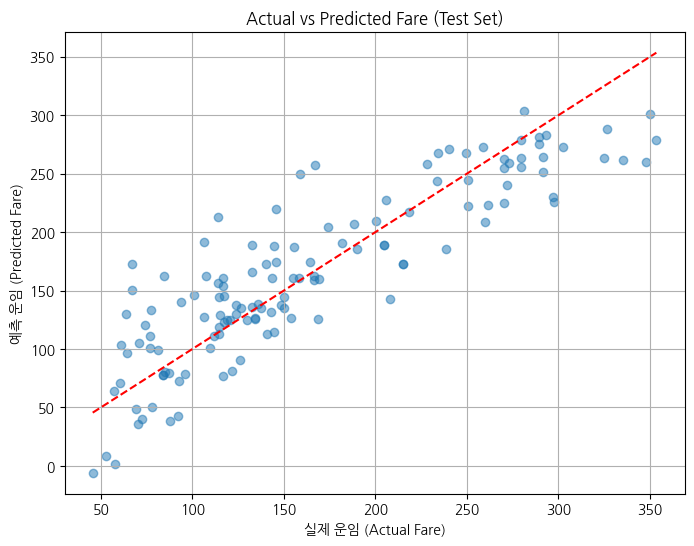

In [60]:
# 실제값 vs 예측값 산점도
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("실제 운임 (Actual Fare)")
plt.ylabel("예측 운임 (Predicted Fare)")
plt.title("Actual vs Predicted Fare (Test Set)")
plt.grid(True)
plt.show()

- 대각선(빨간 선) : 예측값 = 실제값인 기준선
- 점 : 하나의 노선 (행)

**그래프 해석방법**

- 점이 대각선 가까이
  
  : 예측이 실제값에 아주 가까움 = 잘 맞춤!

- 점이 대각선 위

  : 모델이 실제보다 높게 예측함 = 과대 예측

- 점이 대각선 아래

  : 모델이 실제보다 낮게 예측함 = 과소 예측

**그래프 해석**

1. 대부분의 점이 대각선 근처에 있음

  : 예측값이 실제값과 잘 맞는 편 (특히 100~250달러 구간)

2. 낮은 운임 구간에서의 분산이 큼

  : 낮은 운임일수록 예측값의 오차가 커질 가능성 존재

3. 높은 운임구간에서는 과소 예측 경향

| 항목        | 해석                              |
| --------- | ------------------------------- |
| 📈 예측 정밀도 | 대체로 정확함. 특히 중간 운임 구간에서 예측이 잘 맞음 |
| ⚠️ 저운임 예측 | 분산이 큰 편              |
| 🔝 고운임 예측 | 과소 예측 존재                     |
| ✅ 전반적 성능  | 선형회귀 모델로서는 상당히 안정적이고 실용적인 수준    |


**과대예측이나, 과소예측 경향이 생기는 이유 ?**

- 데이터 수 적을 수 있음
- 선형회귀의 단점

 : 선형적 관계(일정하게 증/감소 ex.거리, 경유횟수 etc)는 잘 예측하지만, 비선형적 관계(불규칙하게 증/감소 ex. vacation - 운임이 급격하게 상승하는 경우 etc)는 잘 반영하지 못 함.

 **=> 비선형관계도 잘 반영하는 랜덤 포레스트 모델 구축으로 개선할 수 있음**

In [61]:
# 잔차도 시각화
# 잔차 변수 지정

residuals = y_test - y_pred_test

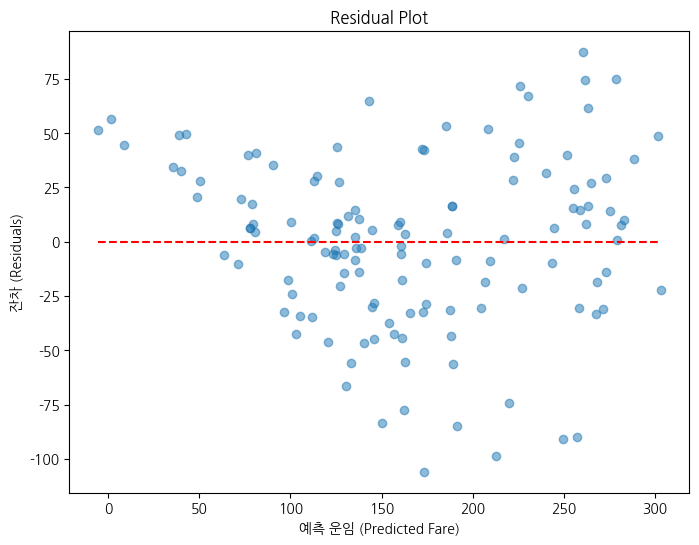

In [62]:
# 4) 잔차도 (Predicted vs Residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred_test.min(), xmax=y_pred_test.max(), colors='r', linestyles='--')
plt.xlabel("예측 운임 (Predicted Fare)")
plt.ylabel("잔차 (Residuals)")
plt.title("Residual Plot")
plt.show()

빨간 점선 : 잔차 = 0인 기준선

**그래프 해석 방법**
- 잔차가 양수(0 위에 있는 점) : 과소예측
- 잔차가 음수(0 아래에 있는 점) : 과대예측


**그래프 해석**

- 낮은 운임(약 0~100)에서 과소예측
- 중간 운임(약 75~180)에서 과대예측 경향
- 높은 운임(약 220 이상)에서 과소예측

**개선 방안**

저가 구간에서는 과소 예측, 중가 구간에서는 과대 예측, 고가 구간에서는 다시 과소 예측 패턴 존재

이는 위 데이터 탐색에서 봤듯, 운임 분포가 한쪽으로 치우쳐(오른쪽)있어서, 모델이 다양한 구간을 한 직선 하나로 잘 설명하지 못했기 때문임

1. 목표 변수(fare) 자체를 **로그 변환**해서 학습

- 기대점

 : fare가 커질수록 그 변화 폭이 “상대 비율(%)”로 학습되기 때문에, 고가 구간에서의 과소 예측이 완화되고, 저가 구간에서의 급격한 분산도 줄어들어 전체 오차 패턴이 보다 균일해질 가능성있음

2. 하이퍼파라미터 튜닝 & 교차 검증(CV & Tuning)

  : 현재 사용한 단일 학습/검증/테스트 분할이 아니라, 훈련 세트 자체를 k개로 나누어 각각 k번 학습/검증 후,  평균 R², 평균 RMSE 계산

  - 기대점

  : 데이터 편향에 덜 민감해지고, 모델이 안정적으로 일반화될 가능성

**타깃 로그 변환**

In [63]:
# 타깃을 로그 변환하여 학습
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)  # 검증용 로그타깃

lr_log = LinearRegression()
lr_log.fit(X_train, y_train_log)

LinearRegression()

In [64]:
# 검증 세트에 대해 로그 예측 및 원래 스케일로 변환
y_val_pred_log = lr_log.predict(X_val)
y_val_pred = np.exp(y_val_pred_log)

In [65]:
# 테스트 세트에 대해 로그 예측 및 원래 스케일로 변환
y_test_pred_log = lr_log.predict(X_test)
y_test_pred = np.exp(y_test_pred_log)

In [66]:
# 성능 지표 계산 (테스트 세트 기준)
mae_log = mean_absolute_error(y_test, y_test_pred)
mse_log = mean_squared_error(y_test, y_test_pred)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test, y_test_pred)

In [67]:
# 결과 출력
print(f"Log-Transform Linear Regression Performance (Test Set):")
print(f"MAE   : {mae_log:.4f}")
print(f"MSE   : {mse_log:.4f}")
print(f"RMSE  : {rmse_log:.4f}")
print(f"R²    : {r2_log:.4f}")

Log-Transform Linear Regression Performance (Test Set):
MAE   : 27.6091
MSE   : 1491.5863
RMSE  : 38.6211
R²    : 0.7695


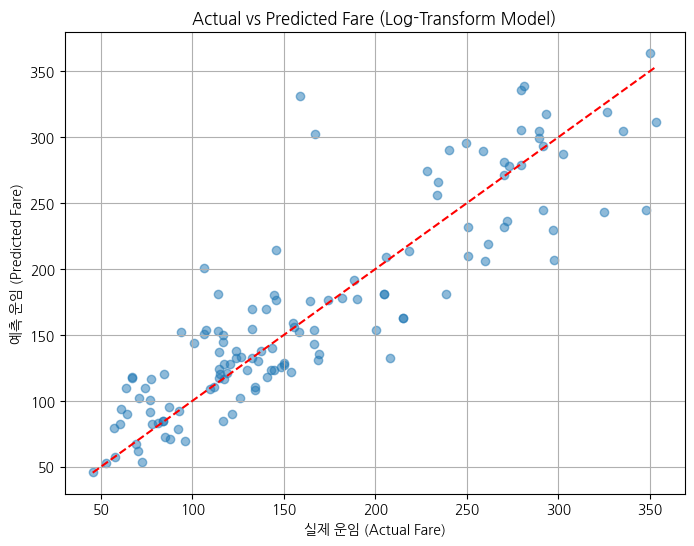

In [68]:
# 실제값 vs 예측값 산점도 (로그 모델)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("실제 운임 (Actual Fare)")
plt.ylabel("예측 운임 (Predicted Fare)")
plt.title("Actual vs Predicted Fare (Log-Transform Model)")
plt.grid(True)
plt.show()

**해석 결과**

| 구분                 | 원래 선형회귀 모델                        | 로그 변환 모델                                 |
| ------------------ | --------------------------------- | ---------------------------------------- |
| **저가(50\~100달러)**  | 점들이 대각선 위쪽에 몰려 있음 → 과대 예측 경향 크다   | 대각선 근처에 고르게 분포 → 과대 예측 편향 완화             |
| **중가(100\~250달러)** | 대각선 주변 분포, 비교적 잘 맞게 예측            | 대각선 주변 분포, 더 촘촘히 붙어 있음 → 예측 정밀도↑         |
| **고가(250\~350달러)** | 점들이 대각선 아래쪽 → 과소 예측 경향이 큼         |  분산이 조금 커진듯한 모습   |
| **전체 오차 분산 패턴**    | “깔때기 모양”(잔차 분산 비등분산) → 구간별 편향이 뚜렷 | 잔차 분산이 비교적 균일하게 분포 → 비등분산성 완화            |
| **R²(테스트 세트)**     | 약 0.7666                          | 0.7696 설명력 살짝 올라감|
| **MAE/RMSE 비교**    | MAE : 30.3648 / RMSE : 38.8648                | MAE : 27.6091 / RMSE : 38.6211  (오차 줄어듦)      |


=> 로그 변환을 거친 모델이 고가 노선에서는 살짝 분산이 높아졌지만, 저가 노선에서는 과대 예측을 줄이며, 전반적으로 대각선에 더 가까운 값들이 보이며, 예측력이 높아졌다.

즉, **잔차 패턴이 보다 균일해지고, 예측 오차가 감소한다**는 점에서 원래 선형회귀보다 개선된 결과를 보여준다.

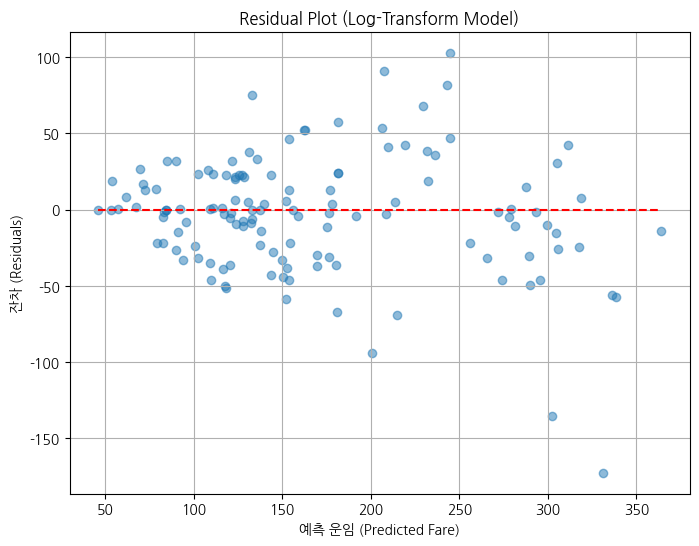

In [69]:
# 잔차 계산 및 잔차도 시각화
residuals_log = y_test - y_test_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals_log, alpha=0.5)
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='r', linestyles='--')
plt.xlabel("예측 운임 (Predicted Fare)")
plt.ylabel("잔차 (Residuals)")
plt.title("Residual Plot (Log-Transform Model)")
plt.grid(True)
plt.show()

| 구분                            | 원래 선형회귀 모델                      | 로그 변환 모델                                |
| ----------------------------- | ------------------------------- | --------------------------------------- |
| **잔차 편향(Bias)**               | 저가→양수, 중가→음수, 고가→양수 순으로 편향이 뚜렷함 | 전 구간에서 잔차가 0을 중심으로 더 균일하게 분산됨           |
| **잔차 분산(Heteroscedasticity)** | 중가·고가 구간에서 잔차 폭이 매우 크고, 비등분산 형태 | 전체적으로 잔차 폭이 줄었으나, 여전히 고가 구간에서 분산은 약간 남음 |
| **고가 구간 오차**                  | 과소 예측(양수 잔차) 편향이 심함             | 절댓값 오차는 남아 있으나, 편향 없이 음수·양수가 섞여 있고, 오차 절댓값이 훨씬 줄어듦    |
| **저가 구간 오차**                  | 과소 예측(양수 잔차)이 많이 나타남            | 과소 예측과 과대 예측이 혼재하면서 편향이 완화됨, 오차 절댓값 매우 낮음         |
| **전체적인 균일성**                  | 잔차가 구간별로 한쪽으로 치우쳐, 모델링 한계가 뚜렷함  | 로그 변환으로 잔차가 전체 예측 범위에서 보다 랜덤하게 분포하고, 전체적으로 오차 절댓값 매우 줄어듦     |


=> 원래 모델은 “세 구간(저가/중가/고가)별로 분명한 오차 편향”을 가졌었으나,

로그 모델은 구간별 편향이 거의 사라지고, 잔차가 0을 중심으로 더 균일하게 퍼진다. 또한, 오차의 절댓값이 많이 줄어들었다.


# **회귀 랜덤 포레스트 모델 RandomForest**

: 앙상블 학습(ensemble learning) 중에서도 배깅(bagging) 전략을 사용한 트리 기반 모델

- 앙상블 학습 : 여러 개의 결정 트리 모델을 만들어서
- 배깅 : 마지막에 모든 트리의 예측값을 평균 하여 결정

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [71]:
df_model2 = df2.copy()

In [72]:
# 예측변수, 목표변수 분리
X = df_model2.drop('FARE', axis=1)
y = df_model2['FARE']

In [73]:
# 범주형, 수치형 변수 추출

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"수치형 피처: {numeric_features}")
print(f"범주형 피처: {categorical_features}")

수치형 피처: ['COUPON', 'NEW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX']
범주형 피처: ['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'VACATION', 'SW', 'SLOT', 'GATE']


In [74]:
# 4. 파이프라인 구성 (수치형은 스케일링 필요 없음)
preprocessor = ColumnTransformer(
    transformers=[
        # 수치형 피처는 전처리 없이 그대로 passthrough
        ('num', 'passthrough', numeric_features),
        # 범주형 피처는 원-핫 인코딩만 수행
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [75]:
# 랜덤포레스트 회귀 모델 파이프라인 생성

rf_pipeline = Pipeline(steps=[                 # Pipeline : 여러 전처리 단계를 순차적으로 적용하고, 마지막에 모델 학습/예측까지 연결
    ('preprocessing', preprocessor),           # 'preprocessing' 단계 (preprocessor = ColumnTransformer) 원-핫인코딩만 진행
    ('regressor', RandomForestRegressor(       # 'regressor' 단계 (RandomForestRegressor)
        n_estimators=100,                      # 100개의 결정 트리로 구성
        max_depth=None,                        # 트리 깊이 제한 없음
        random_state=42,                       # 난수 시드 고정(재현성 확보)
        n_jobs=-1                              # 가능한 모든 CPU 코어 활용(병렬 학습)
    ))
])

In [76]:
# 학습/검증/테스트 데이터 분할 (6:2:2)
# 1. 학습 8, 테스트 2
X_tmp, X_test, y_tmp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 2. 학습 6, 검증 2
X_train, X_val, y_train, y_val = train_test_split(
    X_tmp, y_tmp, test_size=0.25, random_state=42
)

In [77]:
# 모델 학습

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['COUPON', 'NEW', 'HI',
                                                   'S_INCOME', 'E_INCOME',
                                                   'S_POP', 'E_POP', 'DISTANCE',
                                                   'PAX']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['S_CODE', 'S_CITY', 'E_CODE',
                                                   'E_CITY', 'VACATION', 'SW',
                                                   'SLOT', 'GATE'])])),
                ('regressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])

In [78]:
#  변수 중요도 확인 (훈련된 최종 모델 기준)
onehot_feature_names = (
    rf_pipeline.named_steps['preprocessing']
    .named_transformers_['cat']
    .get_feature_names_out(categorical_features)
)
feature_names = numeric_features + list(onehot_feature_names)
importances = rf_pipeline.named_steps['regressor'].feature_importances_   # 회귀용 RandomForestRegressor이 MSE를 기준으로 변수 중요도 확인함



feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

print("\n==== 상위 10개 피처 중요도 ====")
print(feature_importance_df.head(10))


==== 상위 10개 피처 중요도 ====
        feature  importance
0      DISTANCE    0.238995
1        COUPON    0.216912
2        SW_Yes    0.148351
3         SW_No    0.078552
4  VACATION_Yes    0.058148
5   VACATION_No    0.040248
6            HI    0.034775
7         S_POP    0.033916
8         E_POP    0.024235
9           PAX    0.019832


# 랜덤 포레스트 모델 성능 평가

In [79]:
# 검증 세트로 성능 확인
y_val_pred = rf_pipeline.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5
val_r2 = r2_score(y_val, y_val_pred)
print("==== 검증 세트 성능 ====")
print(f"MAE  : {val_mae:.4f}")
print(f"MSE  : {val_mse:.4f}")
print(f"RMSE : {val_rmse:.4f}")
print(f"R²   : {val_r2:.4f}")

==== 검증 세트 성능 ====
MAE  : 19.2547
MSE  : 873.2092
RMSE : 29.5501
R²   : 0.8207


In [80]:
# 최종 테스트 세트 평가
y_test_pred = rf_pipeline.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)
print("==== 테스트 세트 성능 ====")
print(f"MAE  : {test_mae:.4f}")
print(f"MSE  : {test_mse:.4f}")
print(f"RMSE : {test_rmse:.4f}")
print(f"R²   : {test_r2:.4f}")

==== 테스트 세트 성능 ====
MAE  : 21.4402
MSE  : 966.2434
RMSE : 31.0845
R²   : 0.8400


**검증 데이터, 테스트 데이터 성능 비교**

1. 검증 R²= 0.8207 / 테스트 R²= 0.8400

 : 전반적으로 높은 설명력을 가진 모델

2. R²가 검증보다 테스트에서 약간 높게 나옴

 : 각 데이터셋에 포함된 샘플이 다르기 때문에 생기는 자연스러운 오차 범위로 보임.

3. 검증 R² = 0.82 / 테스트 R² =0.84로 비슷한 결과
 : 모델이 특정 데이터에 과하게 맞춰지지 않음.

4. 검증 MAE - 19.2547 / 테스트 MAE - 21.4402
 : 각 데이터셋에서 평균적으로 약 19~21의 오차

5. 검증 RMSE - 29.5501 / 테스트 RMSE - 31.0845
 : MAE보다 높은 수치 => 평균을 끌어올린 극단치 존재

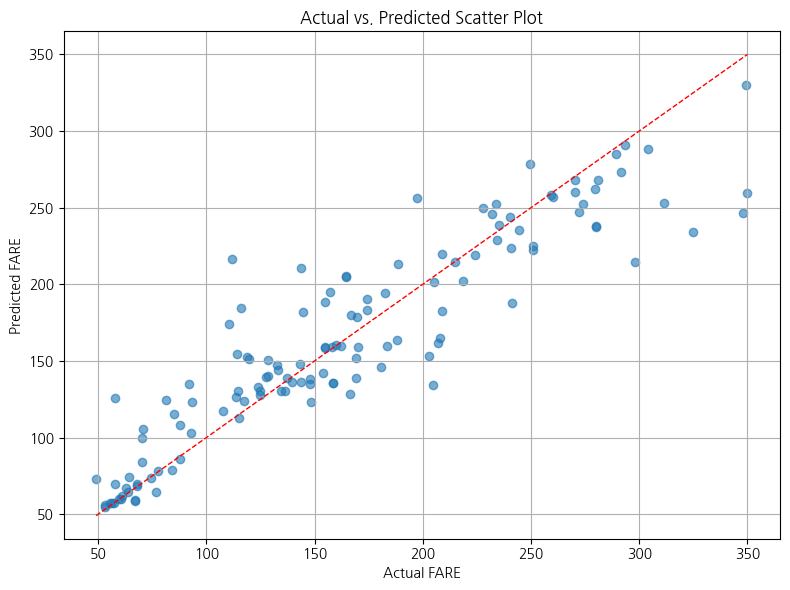

In [81]:
# 실제값 vs 예측값 산점도 (기본 랜덤포레스트)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolors='face')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=1)
plt.xlabel('Actual FARE')
plt.ylabel('Predicted FARE')
plt.title('Actual vs. Predicted Scatter Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

**결과 해석**

- 저운임구간(50~80)달러 구간에서 매우 정확한 예측을 보임
- 100~130 구간에서는 과대평가 경향 존재
- 저운임에서 중간구간으로 갈수록 분산(오차)가 커지는 경향
- 고운임구간(250-350)에서는 거의 대부분 예측 과소평가

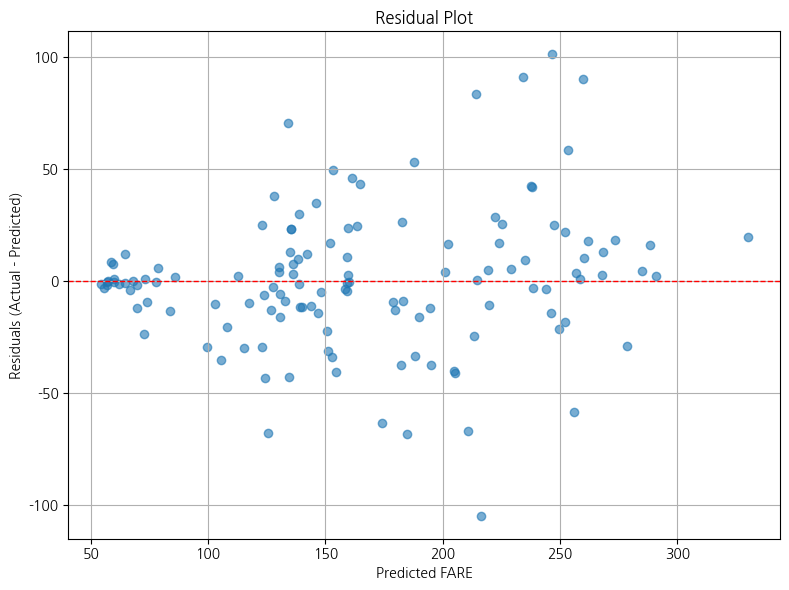

In [82]:
# 잔차도 (Residual Plot)

residuals = y_test - y_test_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, alpha=0.6, edgecolors='face')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel('Predicted FARE')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

**결과 해석**
- 중가~고가 구간으로 갈수록 잔차가 훨씬 퍼져있음.

  => 120 ~ 250 구간일 때는 오차가 많아짐

  => 운임이 커질수록 모델이 포착하지 못한 추가적인 요인(변동성)이 커짐

**개선 방안**
1.  중가~고가 구간 예측 정확도 상승을 위한 하이퍼파라미터 튜닝(Grid Search)

 : 현재는 기본 파라미터(n_estimators=100, max_depth=None 등)를 사용

2. 교차검증(CV) 활용

 :5폴드(혹은 10폴드) 교차검증을 통해 이분산성이 전체 데이터셋에서도 일관되게 나타나는 패턴인지 보다 신뢰 있게 파악 가능

# 모델 개선 - 하이퍼파라미터 튜닝(GridSearch), 교차검증(CV)

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
# 기본 Pipeline 구성
rf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

**GridSearch**

: 머신러닝 모델의 하이퍼파라미터(Hyperparameter)를 자동으로 탐색해서 최적의 조합을 찾아주는 기법

**교차검증(Cross-Validation, CV)**

: 모델이 한 번 학습한 뒤 테스트 데이터에만 평가하는 것이 아니라,
여러 번 데이터 분할을 바꿔 가며 평가해서 모델 성능을 더 안정적으로 판단하는 기법

In [85]:
# 하이퍼파라미터(Grid Search)

param_grid = {
    # 트리 개수: 100, 200, 300을 시도
    'regressor__n_estimators': [100, 200, 300],

    # 트리 최대 깊이: None(제한 없음), 10, 20, 30
    'regressor__max_depth': [None, 10, 20, 30],

    # 분할 시 고려할 피처 개수: 'auto'(=전체), 'sqrt', 'log2'
    'regressor__max_features': ['auto', 'sqrt', 'log2'],

    # 노드 분할을 위해 최소 몇 개의 샘플이 있어야 하는지
    'regressor__min_samples_split': [2, 5, 10],

    # 리프 노드가 되기 위한 최소 샘플 개수
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [86]:
# grid_search 객체 생성

grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=5,                                # 5-폴드 교차검증
    scoring='neg_mean_squared_error',    # MSE(Mean Squared Error)의 음수값을 기준으로 최적 파라미터 탐색
    n_jobs=-1,                           # 가능한 모든 CPU 코어를 병렬 사용
    verbose=2                            # 탐색 진행 과정을 콘솔에 출력
)

In [87]:
# 그리드 서치 실행 & 최적 파라미터 확인

# 하이퍼파라미터 탐색
grid_search.fit(X_train, y_train)

# 최적 파라미터 & 교차검증 결과
print("최적 파라미터:", grid_search.best_params_)
print("Best CV (neg MSE):", grid_search.best_score_)

# 최적 모델 객체 (파라미터가 모두 설정된 Pipeline)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, 

최적 파라미터: {'regressor__max_depth': 20, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Best CV (neg MSE): -1222.956505969696


**하이퍼파라미터 튜닝, 교차검증 결과**


최적 파라미터:

- 'regressor__max_depth': 20

 :  각 트리가 최대 깊이(depth) 20까지만 분할하도록 제한

- 'regressor__max_features': 'sqrt'

   :  각 노드를 분할(split)할 때 고려하는 전체 변수 개수의 제곱근으로 제한  ex) 변수가 100개, 매 분할마다 10개(√100)를 무작위로 뽑아 그 중에서 최적 임계값을 찾아 분할.

- 'regressor__min_samples_leaf': 1

  : 리프 노드(마지막 노드)에 최소한 1개의 샘플만 있어도 됨


- 'regressor__min_samples_split': 2

 : 하나의 노드를 분할하려면 최소 2개 이상의 샘플

- 'regressor__n_estimators': 100  

 :  랜덤포레스트를 구성하는 결정 트리(tree)의 개수를 100개로 사용

Best CV (neg MSE): -1222.956505969696

 : 5-폴드 CV에 걸쳐 평균 MSE가 약 1,222.96, 평균 RMSE가 약 35.

In [88]:
# 최적 모델로 검증/테스트 성능 확인

#  최적 모델 가져오기
best_model = grid_search.best_estimator_

# 검증 세트 성능 확인
y_val_pred = best_model.predict(X_val)
val_mse  = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2   = r2_score(y_val, y_val_pred)
print("검증 세트 MSE  :", f"{val_mse:.4f}")
print("검증 세트 RMSE :", f"{val_rmse:.4f}")
print("검증 세트 R²   :", f"{val_r2:.4f}")

# 테스트 세트 성능 확인
y_test_pred = best_model.predict(X_test)
test_mse  = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2   = r2_score(y_test, y_test_pred)
print("테스트 세트 MSE  :", f"{test_mse:.4f}")
print("테스트 세트 RMSE :", f"{test_rmse:.4f}")
print("테스트 세트 R²   :", f"{test_r2:.4f}")


검증 세트 MSE  : 1181.7473
검증 세트 RMSE : 34.3766
검증 세트 R²   : 0.7574
테스트 세트 MSE  : 1215.2312
테스트 세트 RMSE : 34.8602
테스트 세트 R²   : 0.7987


**하이퍼파라미터 튜닝&교차검증 이후 잔차도 확인**

<ipython-input-89-d56168256515>:15: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


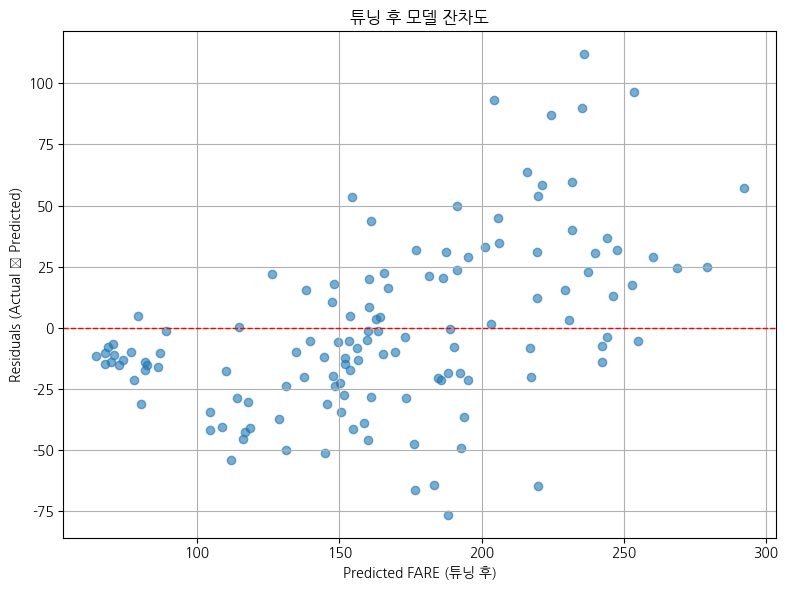

In [89]:
# 테스트셋에 대한 예측값 계산
y_pred_tuned = best_model.predict(X_test)

# 잔차 계산
residuals_tuned = y_test - y_pred_tuned

# 잔차도(Residual Plot) 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_tuned, residuals_tuned, alpha=0.6, edgecolors='face')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel('Predicted FARE (튜닝 후)')
plt.ylabel('Residuals (Actual − Predicted)')
plt.title('튜닝 후 모델 잔차도')
plt.grid(True)
plt.tight_layout()
plt.show()


**튜닝&교차검정 전후 잔차도 비교 결과**

1. 잔차 폭
- 튜닝 전에는 잔차 한개가 –100 이상까지 퍼져 있었던 반면,

- 튜닝 후에는 –75 정도로 “절대값 범위”가 살짝 좁아짐.

- 그러나, 오히려 양수에 있는 잔차는 약 100에서 100이상으로 넓어짐

  => 딱히 개선의 여지 보이지 않음

2. 잔차 위치(분포 중심)
- 튜닝 전에는 잔차가 0선 위·아래로 균형 있게 섞여 있었던 반면,

- 튜닝 후에는 전체적으로 잔차가 음수 쪽(과대 예측) 으로 치우치는 모습이 뚜렷
  
  => 낮은 구간에서 거의 잔차가 없었는데, 튜닝 후 오히려 과대예측됨.
  => 이전에 과소예측되던 부분이 과대예측으로 바뀌는 경향 존재


**결과적으로**

튜닝 후에 일부 극단 오차가 줄어들었다고 하기에도 애매하고, 전체적으로 편향쪽(음수로 편향)으로 문제가 생겼으며, 특히 저가·중가 구간 예측이 과대 예측 쪽으로 치우침. 결국 잔차 분포가 한쪽으로 밀리면서, 오히려 저가 구간에서 새로운 오차 패턴이 나타났기 때문에, 전반적인 품질 개선이라고 보기 어렵다.

**개선 방안**

- 타깃 로그 변환(log(FARE))

  : 로그를 씌우면, 큰 값은 로그 스케일에서 상대적으로 낮은 값으로 압축되므로, 모델이 “전 구간을 균일하게 학습”하기에 수월해짐.

**타깃 로그 변환**

In [98]:
from sklearn.compose import TransformedTargetRegressor

In [99]:
# 랜덤포레스트 회귀 모델 파이프라인 (피처 전처리 + 랜덤포레스트)
rf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=100,  # 예시: 100개 트리
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

In [100]:
# TransformedTargetRegressor로 타깃 로그 변환 처리
#    - func=np.log1p : 실제값 y → log(1 + y)
#    - inverse_func=np.expm1 : 예측값 log(1 + y) → exp(y) - 1
#      (log1p/expm1을 쓰면 y가 0에 가까운 경우 안정적으로 처리할 수 있음)
ttr_regressor = TransformedTargetRegressor(
    regressor=rf_pipeline,
    func=np.log1p,
    inverse_func=np.expm1
)

In [101]:
# 데이터 분할: 훈련(60%) / 검증(20%) / 테스트(20%)
X_tmp, X_test, y_tmp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_tmp, y_tmp, test_size=0.25, random_state=42
)

In [102]:
# 모델 학습 (훈련 데이터)
#    여기서 내부적으로 y_train → log1p(y_train) 한 뒤 학습
ttr_regressor.fit(X_train, y_train)


TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('preprocessing',
                                                      ColumnTransformer(transformers=[('num',
                                                                                       'passthrough',
                                                                                       ['COUPON',
                                                                                        'NEW',
                                                                                        'HI',
                                                                                        'S_INCOME',
                                                                                        'E_INCOME',
                                                                                        'S_POP',
                                                                                        'E_POP',
                                                                                        'DISTANCE',
                                                                                        'PAX']),
                                                                                      ('cat',
                                                                                       OneHotEncoder(handle_unknown='ignore'),
                                                                                       ['S_CODE',
                                                                                        'S_CITY',
                                                                                        'E_CODE',
                                                                                        'E_CITY',
                                                                                        'VACATION',
                                                                                        'SW',
                                                                                        'SLOT',
                                                                                        'GATE'])])),
                                                     ('regressor',
                                                      RandomForestRegressor(n_jobs=-1,
                                                                            random_state=42))]))

In [103]:
# 검증 세트 성능 확인
#    - 예측값 자체가 이미 inverse_func(expm1) 처리가 되어 나오므로,
#      별도 역변환 없이 바로 y_pred_val을 비교할 수 있음.
y_val_pred = ttr_regressor.predict(X_val)

val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, y_val_pred)

print("\n==== 검증 세트 (Validation) 성능 ====")
print(f"MAE  : {val_mae:.4f}")
print(f"MSE  : {val_mse:.4f}")
print(f"RMSE : {val_rmse:.4f}")
print(f"R²   : {val_r2:.4f}")


==== 검증 세트 (Validation) 성능 ====
MAE  : 20.0462
MSE  : 967.8142
RMSE : 31.1097
R²   : 0.8013


In [104]:
# 10. 테스트 세트 성능 확인
y_test_pred = ttr_regressor.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\n==== 테스트 세트 (Test) 성능 ====")
print(f"MAE  : {test_mae:.4f}")
print(f"MSE  : {test_mse:.4f}")
print(f"RMSE : {test_rmse:.4f}")
print(f"R²   : {test_r2:.4f}")


==== 테스트 세트 (Test) 성능 ====
MAE  : 21.0566
MSE  : 926.4433
RMSE : 30.4375
R²   : 0.8466


**기본 랜덤포레스트 모델 vs 로그 변환 랜덤포레스트 모델**
- 잔차도
- 산점도

<ipython-input-107-3823b0a6213a>:14: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


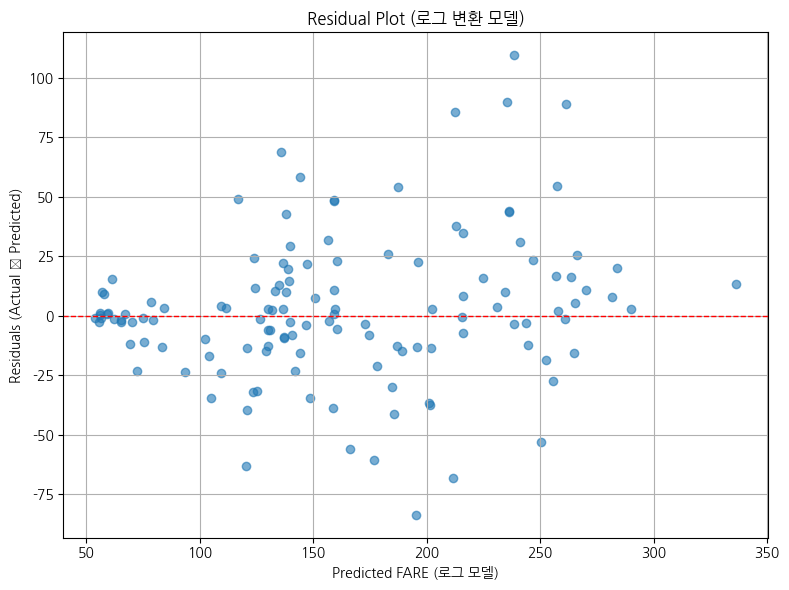

In [107]:
# 잔차도 (Residual Plot)

# 잔차 계산
residuals_log = y_test - y_pred_log

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_log, residuals_log, alpha=0.6, edgecolors='face')
# 기준선 y=0
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel('Predicted FARE (로그 모델)')
plt.ylabel('Residuals (Actual − Predicted)')
plt.title('Residual Plot (로그 변환 모델)')
plt.grid(True)
plt.tight_layout()
plt.show()

**기본 랜덤포레스트 모델 vs 로그 변환 랜덤포레스트모델 잔차도 비교**

- 전반적으로 저,중,고가 운임 구간에서 거의 변화 없지만, 극단 잔차값이 줄어들면서 전반적인 잔차폭이 살짝 좁아졌음.

=> 큰 변화는 없지만, 전반적으로 조금씩 안정된 것을 볼 수 있음.



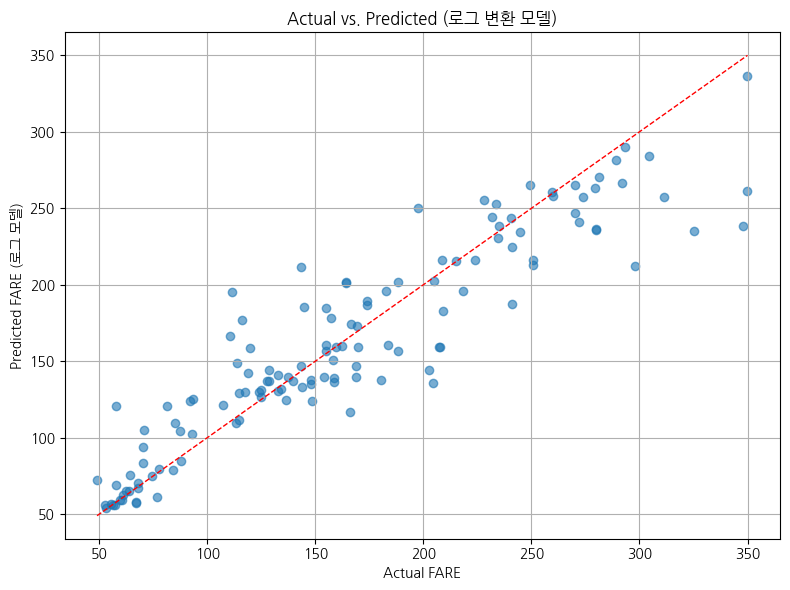

In [106]:
# 실제값 vs. 예측값 산점도 (로그변환 모델)

# 예측값 계산
y_pred_log = ttr_regressor.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_log, alpha=0.6, edgecolors='face')
# 대각선 y=x 기준선
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=1)
plt.xlabel('Actual FARE')
plt.ylabel('Predicted FARE (로그 모델)')
plt.title('Actual vs. Predicted (로그 변환 모델)')
plt.grid(True)
plt.tight_layout()
plt.show()

**기본 랜덤포레스트 모델 vs 로그 변환 랜덤 포레스트 모델 해석 결과**


- 저가 운임(50~100달러) 구간에서는 두 모델 모두 충분히 잘 맞추지만,

- 중가 운임(100~200달러) 구간에서 로그 변환 모델이 훨씬 더 대각선에 근접한 예측값을 내고,

- 고가 운임(200~350달러) 구간에서도 한결 안정적인 예측을 보여 줌

- 전체적으로 값들이 대각선으로 가까워져 오차폭이 줄었음을 알 수 있음.

따라서,

중가~고가 구간의 예측 정확도를 높이기 위해 로그 변환을 적용한 것이 효과적이었다.

즉, “로그 변환 모델이 기본 랜덤포레스트에 비해 고가·중가 운임 예측에서 훨씬 좋은 분포(잔차 폭이 좁고 편향이 적은 상태)를 보임.










# **최소제곱법모델(Ordinary Least Squares)**

모델을 선택할 때 고려해야 할 사항에는 문제 유형(분류/회귀), 데이터의 크기 및 특성, 모델의 복잡도, 해석 용이성, 훈련 시간, 모델의 가정(예: 선형 회귀의 가정) 등이 있음.

문제 유형은 항공운임이라는 수치형 변수를 예측하는 것이므로, 회귀임.

데이터의 크기 및 특성은 다음과 같음.
- 표본 수: 638개
- 변수 수: 18개
- 종속변수: FARE (항공 운임, float)
- 변수 유형:

 수치형: COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, FARE

 범주형: S_CODE, S_CITY, E_CODE, E_CITY, VACATION, SW, SLOT, GATE

모델의 복잡도(OLS VS KNN)

    OLS 모델

    복잡도 매우 낮고, 해석이 쉬우며 훈련이 빠름.

    단, 비선형적 관계를 반영하지 못함.

    KNN 모델

    비선형 관계를 잘 반영하지만, 복잡도와 예측 비용이 큼.

    특히 데이터가 많아지면 성능과 속도 모두 급격히 저하됨.

OLS 모델의 5대 가정

선형성 (Linearity):독립변수와 종속변수 사이의 관계는 선형이어야 한다.

독립성 (Independence):오차(잔차)는 서로 독립이어야 한다.

등분산성 (Homoscedasticity):오차의 분산은 일정해야 한다.

정규성 (Normality):오차는 정규분포를 따라야 한다.

다중공선성 없음 (No Multicollinearity):독립변수들 간에 높은 상관관계가 없어야 한다.



In [108]:
# 데이터 혼동을 방지하기 위해 데이터 복사
df2_OLS = df2.copy()
df2_KNN = df2.copy()

**원핫인코딩코드**


In [109]:
#  범주형 변수 자동 탐지
categorical_cols_df2 = df2.select_dtypes(include=['object', 'category']).columns.tolist()

# 원핫인코딩 적용 (drop_first=True는 다중공선성 방지를 위해 하나 제거)
df_categorial_df2_encoded = pd.get_dummies(df2, columns=categorical_cols, drop_first=True)

# 결과를 0과 1 (정수형)로 변환
df_categorial_df2_encoded = df_categorial_df2_encoded.astype(int)

# 결과 확인
print(df_categorial_df2_encoded.head())
print(f"원핫인코딩 후 변수 수: {df_categorial_df2_encoded.shape[1]}")

   COUPON  NEW    HI  S_INCOME  E_INCOME    S_POP    E_POP  DISTANCE    PAX  \
0       1    3  5291     28637     21112  3036732   205711       312   7864   
1       1    3  5419     26993     29838  3532657  7145897       576   8820   
2       1    3  4208     28637     29838  5787293  7145897       364   6452   
3       1    3  2657     29260     29838  7830332  7145897       612  25144   
4       1    3  2657     29260     29838  7830332  7145897       612  25144   

   FARE  ...  E_CITY_Tallahassee         Fl  E_CITY_Tampa               Fl  \
0    64  ...                              0                              0   
1   174  ...                              0                              0   
2   207  ...                              0                              0   
3    85  ...                              0                              0   
4    85  ...                              0                              0   

   E_CITY_Tucson              Az  E_CITY_Tulsa          

 **수치형 변수 정규화코드**

In [110]:
from sklearn.preprocessing import StandardScaler

# FARE을 제외한 수치형 변수 선택
numerical_cols = df_categorial_df2_encoded.select_dtypes(include=['float64', 'int64']).columns.drop('FARE')

# 정규화 객체 생성
scaler = StandardScaler()

# 정규화 수행
df2_KNN_scaled = df_categorial_df2_encoded.copy()
df2_KNN_scaled[numerical_cols] = scaler.fit_transform(df_categorial_df2_encoded[numerical_cols])

# 결과 확인
print(df2_KNN_scaled[numerical_cols].head())

   COUPON  NEW        HI  S_INCOME  E_INCOME     S_POP     E_POP  DISTANCE  \
0     0.0  0.0  0.623745  0.294534 -1.418650 -0.506002 -1.094152 -1.050074   
1     0.0  0.0  0.706647 -0.212785  0.523042 -0.341433  1.449906 -0.620183   
2     0.0  0.0 -0.077687  0.294534  0.523042  0.406751  1.449906 -0.965398   
3     0.0  0.0 -1.082231  0.486784  0.523042  1.084719  1.449906 -0.561561   
4     0.0  0.0 -1.082231  0.486784  0.523042  1.084719  1.449906 -0.561561   

        PAX  S_CODE_DCA  ...  E_CITY_Tallahassee         Fl  \
0 -0.218137   -0.068199  ...                      -0.039314   
1 -0.031395   -0.068199  ...                      -0.039314   
2 -0.493951   -0.068199  ...                      -0.039314   
3  3.157271   -0.068199  ...                      -0.039314   
4  3.157271   -0.068199  ...                      -0.039314   

   E_CITY_Tampa               Fl  E_CITY_Tucson              Az  \
0                      -0.169031                      -0.068199   
1                 

**선형성 확인 및 시각화하는 코드**

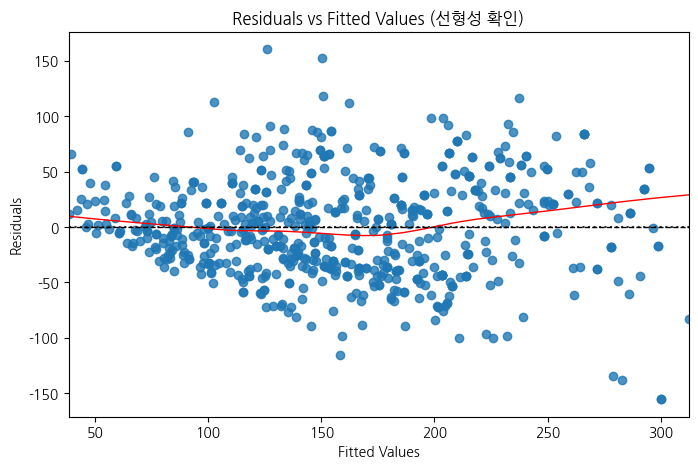

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# X, y 설정
X = df2[['COUPON','NEW','HI','S_INCOME','E_INCOME','S_POP','E_POP','DISTANCE','PAX']]  # 독립변수
y = df2['FARE'] # 종속변수

# 상수항 추가
X_const = sm.add_constant(X)

# OLS 회귀모델 적합
model_OLS = sm.OLS(y, X_const).fit()

# 예측값과 잔차 계산
fitted_vals = model_OLS.fittedvalues
residuals = model_OLS.resid

# 잔차 vs 예측값 산점도
plt.figure(figsize=(8, 5))
sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values (선형성 확인)")
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.show()

결과 해석

- 빨간 선(LOESS curve)이 U자형으로 휘어져 있음

- 잔차들이 예측값에 따라 특정 방향으로 체계적인 곡선 형태를 보임

- 잔차가 완전히 랜덤하게 퍼져 있지 않음

- 선형성가정위배

    OLS 회귀모형의 중요한 가정 중 하나인 선형성(linearity):

    독립변수와 종속변수 간에는 직선적(linear) 관계가 존재해야 함

    잔차가 예측값에 대해 곡선형태로 분포되어 있음

    이는 모델이 데이터의 비선형적 관계를 충분히 설명하지 못하고 있음을 의미

**정규성/등분산성 확인하는 코드**

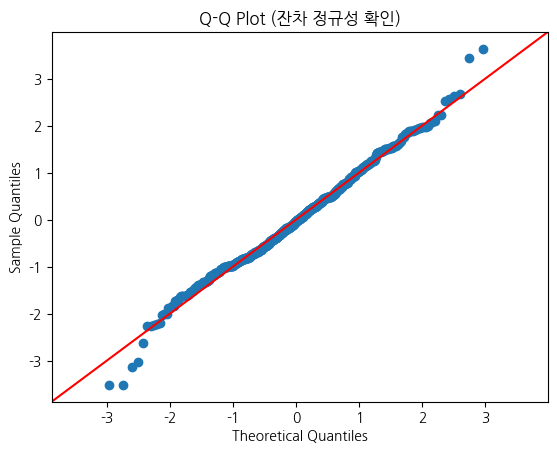

In [112]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot (잔차 정규성 확인)')
plt.show()

In [113]:
# Shapiro-Wilk Test (정규성 검정)
from scipy.stats import shapiro

stat, p = shapiro(residuals)
print(f"Shapiro-Wilk test: 통계량 = {stat:.3f}, p값 = {p:.3f}")
if p > 0.05:
    print("정규성 가정 충족 (p > 0.05)")
else:
    print("정규성 위배 (p ≤ 0.05)")

Shapiro-Wilk test: 통계량 = 0.994, p값 = 0.007
정규성 위배 (p ≤ 0.05)


결과 해석

Shapiro-Wilk 검정은 데이터(보통 잔차)가 정규분포를 따르는지를 검정

귀무가설(H₀): "이 데이터는 정규분포를 따른다."

대립가설(H₁): "이 데이터는 정규분포를 따르지 않는다."

따라서,

p ≤ 0.05 → 귀무가설 기각 → 정규성을 따르지 않음

여기선 p = 0.007 → 정규성 위배

In [114]:
# Breusch-Pagan Test (정량적 검정)
from statsmodels.stats.diagnostic import het_breuschpagan

# 예측값을 통해 Breusch-Pagan test 수행
bp_test = het_breuschpagan(residuals, model_OLS.model.exog)
labels = ['LM Statistic', 'LM p-value', 'F-statistic', 'F p-value']
for name, val in zip(labels, bp_test):
    print(f"{name}: {val:.4f}")

# 해석
if bp_test[1] > 0.05:
    print("등분산성 가정 충족 (p > 0.05)")
else:
    print("등분산성 위배 (p ≤ 0.05)")

LM Statistic: 67.2790
LM p-value: 0.0000
F-statistic: 9.2539
F p-value: 0.0000
등분산성 위배 (p ≤ 0.05)


결과 해석

현재 잔차가 이분산성을 가짐 → 표준오차, p값 불신

robust 표준오차 또는 로그/가중치 회귀 등 대응 필요

**데이터분할**

In [115]:
# 데이터 혼동을 방지하기 위해 데이터 복사
df2_OLS = df2_KNN_scaled.copy()
df2_KNN = df2_KNN_scaled.copy()

In [116]:
from sklearn.model_selection import train_test_split

# OLS모델 데이터분할

# 학습데이터(60%), 임시데이터(40%)로 분할
df2_OLS_train, df2_OLS_temp = train_test_split(df2_OLS, test_size=0.4, random_state=42)

# 임시데이터를 검증데이터(50%), 테스트데이터(50%)로 분할
df2_OLS_val, df2_OLS_test = train_test_split(df2_OLS_temp, test_size=0.5, random_state=42)

# 종속변수
y_OLS_train = df2_OLS_train['FARE']
y_OLS_val = df2_OLS_val['FARE']
y_OLS_test = df2_OLS_test['FARE']

# 독립변수
X_OLS_train = df2_OLS_train.drop(columns='FARE')
X_OLS_val = df2_OLS_val.drop(columns='FARE')
X_OLS_test = df2_OLS_test.drop(columns='FARE')

# 결과 확인
print(f"Train_OLS set: {df2_OLS_train.shape}")
print(f"Validation_OLS set: {df2_OLS_val.shape}")
print(f"Test_OLS set: {df2_OLS_test.shape}")

# KNN모델 데이터분할
y_KNN = df2_KNN['FARE']
X_KNN = df2_KNN.drop(columns='FARE')

# 학습데이터(60%), 임시데이터(40%)로 분할
X_KNN_train, X_KNN_temp, y_KNN_train, y_KNN_temp = train_test_split(X_KNN, y_KNN, test_size=0.4, random_state=42)

# 임시데이터를 검증데이터(50%), 테스트데이터(50%)로 분할
X_KNN_val, X_KNN_test, y_KNN_val, y_KNN_test = train_test_split(X_KNN_temp, y_KNN_temp, test_size=0.5, random_state=42)

# 확인
print(f"Train_KNN size: {X_KNN_train.shape[0]} rows")
print(f"Validation_KNN size: {X_KNN_val.shape[0]} rows")
print(f"Test_KNN size: {X_KNN_test.shape[0]} rows")

Train_OLS set: (388, 145)
Validation_OLS set: (130, 145)
Test_OLS set: (130, 145)
Train_KNN size: 388 rows
Validation_KNN size: 130 rows
Test_KNN size: 130 rows


In [117]:
import statsmodels.api as sm

# 상수항 추가 (OLS는 상수항 필요)
X_OLS_train_const = sm.add_constant(X_OLS_train)

# 모델 학습
model_OLS = sm.OLS(y_OLS_train, X_OLS_train_const).fit()

# 학습 결과 요약 출력
print(model_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     10.02
Date:                Fri, 06 Jun 2025   Prob (F-statistic):           1.98e-54
Time:                        00:03:54   Log-Likelihood:                -1876.4
No. Observations:                 388   AIC:                             4005.
Df Residuals:                     262   BIC:                             4504.
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
COUPON        

# 최소제곱법모델 성능 평가

In [118]:
# OLS 모델 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 테스트 데이터에 상수항 추가
X_OLS_test_const = sm.add_constant(X_OLS_test, has_constant='add')

# 훈련 시 사용한 열 순서와 맞추기
X_OLS_test_const = X_OLS_test_const[model_OLS.model.exog_names]

# 예측값 생성
y_pred = model_OLS.predict(X_OLS_test_const)

# 평가 지표 계산
mae = mean_absolute_error(y_OLS_test, y_pred)
mse = mean_squared_error(y_OLS_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_OLS_test, y_pred)

# 5. Adjusted R² 계산
n = X_OLS_test_const.shape[0]  # 테스트 샘플 수
p = X_OLS_test_const.shape[1] - 1  # 상수항 제외한 변수 수
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# 6. 출력
print(f"OLS 모델 테스트 성능")
print(f"MAE  (평균 절대 오차): {mae:.4f}")
print(f"MSE  (평균 제곱 오차): {mse:.4f}")
print(f"RMSE (루트 평균 제곱 오차): {rmse:.4f}")
print(f"R²  (결정 계수): {r2:.4f}")
print(f"Adjusted R²      : {adj_r2:.4f}")

OLS 모델 테스트 성능
MAE  (평균 절대 오차): 473.5098
MSE  (평균 제곱 오차): 2545976.0909
RMSE (루트 평균 제곱 오차): 1595.6115
R²  (결정 계수): -392.3255
Adjusted R²      : 3625.2137


OLS 모델 테스트 성능 해석
- MAE: 473.51	실제값과 예측값 사이의 평균적인 절대 오차는 약 473.5098달러
- MSE: 2545976.09	오차의 제곱 평균. MAE보다 큰 오차에 더 큰 페널티
- RMSE: 1595.61	평균적으로 예측값이 실제값에서 약 1595.61달러 정도 떨어져 있음
- R²: -392.33	 엄청난 음수 → 모델이 아예 무의미한 수준으로 나쁜 성능을 보이고 있다는 증거. 단순 평균보다도 못한 예측임.
- Adjusted R²: 3625.21 논리적으로도 이상한 수치. 해석 불가능한 수준. 계산 과정이나 데이터 전처리에 문제가 있을 가능성 높음.

훈련 성능에서는 R² = 0.827, Adjusted R² = 0.745로 매우 괜찮은 수치가 나왔는데,
테스트 데이터에서는 R² = -392.3255, Adjusted R² = 3625.2137처럼 터무니없이 이상한 값이 도출
→ 이는 모델이 훈련 데이터에는 과적합(overfitting) 되었고, 테스트 데이터에는 전혀 일반화되지 못했다는 신호

원인

1. 변수가 너무 많고 (125개 독립변수)
훈련 데이터에만 맞춰진 모델로 인해 과적합 발생.

수많은 더미 변수(범주형 변수 원-핫 인코딩 포함)가 포함됨 → multicollinearity 문제도 발생 가능.

2. 모델이 복잡하고, 해석력이 낮음

다중공선성 강한 모델은 실제로 예측 성능이 낮아지며, 테스트셋에서 오류가 큼.

정규성 위배, 등분산성 위배 등 선형회귀 전제도 깨져 있음.

# 모델 개선

Stepwise Selection

In [119]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.05,
                       threshold_out=0.10,
                       verbose=True):
    included = list(initial_list)
    while True:
        changed = False

        # 전진 선택
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]

        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add  {best_feature:30} with p-value {best_pval:.6}')

        # 후진 제거
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]  # exclude intercept
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print(f'Drop {worst_feature:30} with p-value {worst_pval:.6}')

        if not changed:
            break

    return included

In [120]:
# X, y는 수치형 변수 또는 원핫인코딩 처리된 범주형 변수 포함한 데이터
selected_features = stepwise_selection(X_OLS_train, y_OLS_train)

# 선택된 변수로 최종 모델 학습
step_model_OLS = sm.OLS(y_OLS_train, sm.add_constant(X_OLS_train[selected_features])).fit()
print(step_model_OLS.summary())

Add  E_CITY_Denver              Co  with p-value 5.17168e-148
Add  E_CITY_El Paso             Tx  with p-value 5.17168e-148
Add  S_CITY_Norfolk/Va B/Pt/Ch  Va  with p-value 1.23392e-147
Add  E_CITY_Buffalo             Ny  with p-value 1.23392e-147
Add  S_CITY_El Paso             Tx  with p-value 5.17168e-148
Add  DISTANCE                       with p-value 3.71673e-35
Add  E_CITY_Spokane             Wa  with p-value 3.05117e-174
Add  E_CITY_Lubbock             Tx  with p-value 3.05117e-174
Add  E_CITY_Memphis             Tn  with p-value 3.05117e-174
Add  SW_Yes                         with p-value 6.58985e-34
Add  VACATION_Yes                   with p-value 2.79661e-22
Add  HI                             with p-value 4.10926e-06
Add  E_CITY_San Francisco       Ca  with p-value 0.000143858
Add  E_CITY_Colorado Springs    Co  with p-value 0.000489594
Add  S_CITY_San Francisco       Ca  with p-value 0.00103955
Add  SLOT_Free                      with p-value 0.00291504
Add  GATE_Free    

stepwise selection 성능 평가

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 테스트 데이터로 예측 수행
X_test_selected = sm.add_constant(X_OLS_test[selected_features])  # 상수항 추가
y_pred_step = step_model_OLS.predict(X_test_selected)

# 실제값
y_true = y_OLS_test

# 성능 지표 계산
mae = mean_absolute_error(y_true, y_pred_step)
rmse = np.sqrt(mean_squared_error(y_true, y_pred_step))
r2 = r2_score(y_true, y_pred_step)

# 출력
print(f"MAE  (평균 절대 오차): {mae:.4f}")
print(f"RMSE (루트 평균 제곱 오차): {rmse:.4f}")
print(f"R²   (결정 계수): {r2:.4f}")

MAE  (평균 절대 오차): 467.1857
RMSE (루트 평균 제곱 오차): 1582.5093
R²   (결정 계수): -385.8925


| 지표              | 해석                                  |
| --------------- | ----------------------------------- |
| **MAE ≈ 467**   | 평균적으로 약 467 정도 오차 발생.               |
| **RMSE ≈ 1582** | 큰 오차가 많은 상태 (RMSE > MAE → 이상치 영향 큼) |
| **R² = -385**   | **모델이 평균값으로만 예측한 것보다도 훨씬 못한 성능**    |

훈련 데이터에서는 적절히 맞췄지만, 테스트 데이터에서는 완전히 실패한 모델

| 접근법              | 설명                                                        |
| ---------------- | --------------------------------------------------------- |
| ✅ **변수 선택**      | `stepwise_selection`, `LassoCV`, `RFE` 등으로 **불필요한 변수 제거** |
| ✅ **종속변수 로그 변환** | `y = np.log(FARE)` 후 모델링                                  |
| ✅ **독립변수 스케일링**  | `StandardScaler`, `MinMaxScaler` 등 적용                     |
| ✅ **다른 모델 시도**   | 선형회귀 한계 → `RandomForest`, `KNN`, `XGBoost` 등 비선형 모델 고려    |
| ✅ **교차검증 적용**    | 성능 평가의 안정성 확보 (k-fold CV)                                 |

종속변수 로그 변환 필요성 존재

로그 변환

In [122]:
import numpy as np
import statsmodels.api as sm

# 종속변수 로그 변환 (log1p는 0도 처리 가능)
y_log_train = np.log1p(y_OLS_train)

# 상수항 추가
X_log_train_const = sm.add_constant(X_OLS_train)

# 3. OLS 모델 학습 (로그변환된 y 사용)
model_log = sm.OLS(y_log_train, X_log_train_const).fit()

# 4. 회귀 결과 출력
print(model_log.summary())


                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     15.14
Date:                Fri, 06 Jun 2025   Prob (F-statistic):           7.04e-73
Time:                        00:16:08   Log-Likelihood:                 134.19
No. Observations:                 388   AIC:                            -16.38
Df Residuals:                     262   BIC:                             482.7
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
COUPON        

로그 변환 후 성능 평가

In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 테스트 데이터도 상수항 추가
X_test_const = sm.add_constant(X_OLS_test)

# 예측 (로그 스케일)
y_log_pred = model_log.predict(X_test_const)

# 로그 역변환 (원래 단위로)
y_pred_lg = np.expm1(y_log_pred)  # log1p의 역함수

# 실제값
y_true = y_OLS_test

# 성능 평가
mae = mean_absolute_error(y_true, y_pred_lg)
rmse = np.sqrt(mean_squared_error(y_true, y_pred_lg))
r2 = r2_score(y_true, y_pred_lg)

# 출력
print(f"MAE  (평균 절대 오차): {mae:.4f}")
print(f"RMSE (루트 평균 제곱 오차): {rmse:.4f}")
print(f"R²   (결정 계수): {r2:.4f}")

MAE  (평균 절대 오차): 37.9016
RMSE (루트 평균 제곱 오차): 53.4436
R²   (결정 계수): 0.5587


| 지표       | 로그 변환 전 (R² -385) | 로그 변환 후 (R² 0.5587) | 개선 여부      |
| -------- | ----------------- | ------------------- | ---------- |
| **MAE**  | 467.19            | 37.90               | ✅ 개선됨      |
| **RMSE** | 1582.51           | 53.44               | ✅ 개선됨      |
| **R²**   | -385.89           | 0.5587              | ✅ 비약적으로 개선 |


로그 변환의 효과 요약

잔차의 정규성/등분산성 위배 해소
→ 잔차 분포가 안정화됨

이상치 영향 완화
→ 로그는 큰 값을 압축하므로 과도한 영향력이 줄어듦

해석이 더 직관적일 수 있음
→ log(FARE) 모델은 "변수 변화율이 운임의 비율 변화에 미치는 영향"을 의미

MAE ≈ 37.9 → 예측 운임 오차가 평균적으로 약 $38 수준이라는 의미

RMSE ≈ 53.4 → 일부 큰 오차 포함됨 (RMSE > MAE이므로 이상치 영향 있음)

R² ≈ 0.56 → 전체 분산 중 약 56%는 설명하고 있음
→ 실용적으로 나쁘지 않지만, 더 개선할 여지는 있음

잔차 분석 (로그 변환)

In [132]:
# 잔차 계산
residuals = y_pred_lg- y_true

In [133]:
# 정규성 검정 (Shapiro-Wilk)
from scipy.stats import shapiro

stat, p = shapiro(residuals)
print(f"Shapiro-Wilk Test: 통계량 = {stat:.4f}, p값 = {p:.4f}")
if p > 0.05:
    print("✅ 정규성 만족")
else:
    print("❌ 정규성 위배")

Shapiro-Wilk Test: 통계량 = 0.9328, p값 = 0.0000
❌ 정규성 위배


In [134]:
# 등분산성 검정 (Breusch-Pagan Test)
import statsmodels.stats.api as sms

# 등분산성 검정
bp_test = sms.het_breuschpagan(residuals, X_OLS_test_const)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
for name, val in zip(labels, bp_test):
    print(f"{name}: {val:.4f}")

if bp_test[1] > 0.05:
    print("✅ 등분산성 만족")
else:
    print("❌ 등분산성 위배")

LM Statistic: 126.7039
LM-Test p-value: 0.8322
F-Statistic: 17.9098
F-Test p-value: 0.0000
✅ 등분산성 만족


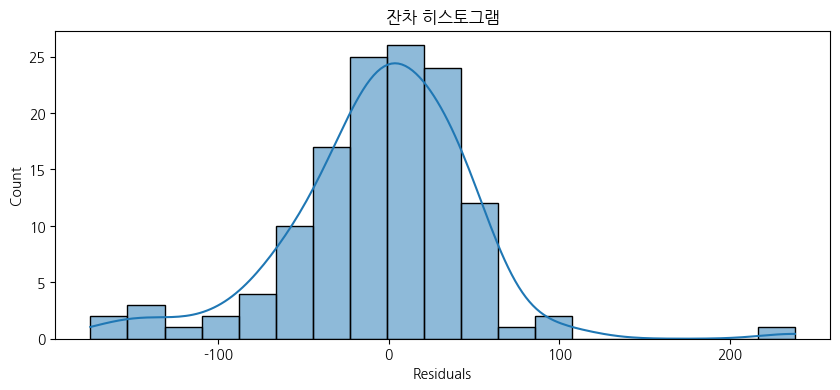

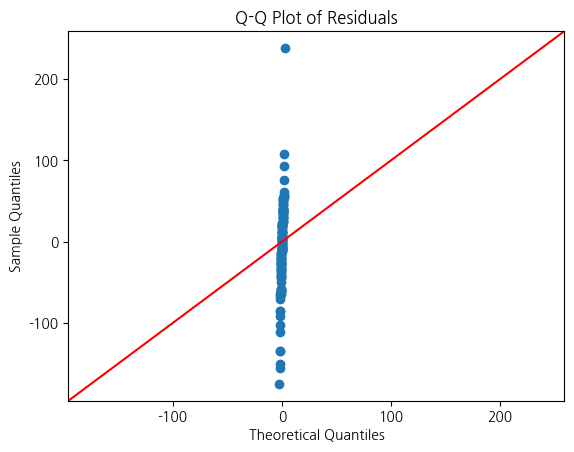

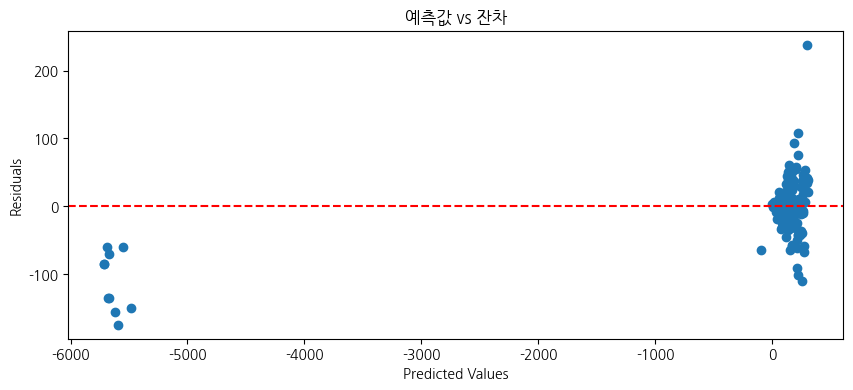

In [135]:
# 시각화 (히스토그램 & Q-Q Plot & 잔차 산점도)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 히스토그램
plt.figure(figsize=(10, 4))
sns.histplot(residuals, kde=True)
plt.title("잔차 히스토그램")
plt.xlabel("Residuals")
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

# 예측값 vs 잔차
plt.figure(figsize=(10, 4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("예측값 vs 잔차")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

| 항목       | 진단 결과                         |
| -------- | ----------------------------- |
| **정규성**  | Q-Q 플롯 및 히스토그램에서 위배 의심        |
| **등분산성** | 예측값 vs 잔차 플롯에서 위배 (잔차 분포 불균형) |
| **이상치**  | 예측값이 매우 큰 음수로 왜곡된 데이터 존재      |


로그 변환 후 stepwise selection

In [136]:
import numpy as np
y_log_train = np.log1p(y_OLS_train)  # 로그변환 (log1p는 0도 처리)

# 기존 stepwise_selection 함수 사용
selected_features_log = stepwise_selection(X_OLS_train, y_log_train)
import statsmodels.api as sm

X_log_train_selected = sm.add_constant(X_OLS_train[selected_features_log])
model_log_stepwise = sm.OLS(y_log_train, X_log_train_selected).fit()

print(model_log_stepwise.summary())

Add  S_CITY_Norfolk/Va B/Pt/Ch  Va  with p-value 0.0
Add  E_CITY_El Paso             Tx  with p-value 0.0
Add  SW_Yes                         with p-value 4.36019e-45
Add  S_CITY_El Paso             Tx  with p-value 0.0
Add  E_CITY_Spokane             Wa  with p-value 0.0
Add  E_CITY_Denver              Co  with p-value 0.0
Add  E_CITY_Buffalo             Ny  with p-value 0.0
Add  E_CITY_Lubbock             Tx  with p-value 0.0
Add  E_CITY_Memphis             Tn  with p-value 0.0
Add  DISTANCE                       with p-value 5.95965e-36
Add  VACATION_Yes                   with p-value 2.10571e-19
Add  E_CITY_San Francisco       Ca  with p-value 4.94258e-05
Add  S_CITY_San Francisco       Ca  with p-value 0.000128925
Add  E_CITY_Colorado Springs    Co  with p-value 0.000457237
Add  GATE_Free                      with p-value 0.00167539
Add  S_CITY_Houston             Tx  with p-value 0.000856944
Add  SLOT_Free                      with p-value 0.00236765
Add  HI                      

로그 변환 후 stepwise selection 성능 평가

In [144]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 테스트 데이터에도 같은 변수 선택 및 상수항 추가
X_log_test_selected = sm.add_constant(X_OLS_test[selected_features_log])

# 예측 (로그스케일)
y_log_step_pred = model_log_stepwise.predict(X_log_test_selected)

# 역변환
y_pred_lg_step = np.expm1(y_log_step_pred)
y_true = y_OLS_test

# 성능지표 계산
mae = mean_absolute_error(y_true, y_pred_lg_step)
rmse = np.sqrt(mean_squared_error(y_true, y_pred_lg_step))
r2 = r2_score(y_true, y_pred_lg_step)

# 결과 출력
print(f"MAE  (평균 절대 오차): {mae:.4f}")
print(f"RMSE (루트 평균 제곱 오차): {rmse:.4f}")
print(f"R²   (결정 계수): {r2:.4f}")


MAE  (평균 절대 오차): 36.2032
RMSE (루트 평균 제곱 오차): 52.5514
R²   (결정 계수): 0.5734


| 항목          | 해석                                                    |
| ----------- | ----------------------------------------------------- |
| **MAE 감소**  | 절대 오차가 작아졌고, 평균적으로 예측값이 실제값과 36원 정도 차이남 (로그에서 역변환 후). |
| **RMSE 감소** | 큰 오차에 더 민감한 RMSE도 작아졌음 → 이상값 처리나 분포 개선 효과 있음.         |
| **R² 증가**   | 설명력이 약 \*\*57.3%\*\*로 개선됨. 로그 변환 전보다 의미 있게 향상됨.       |


잔차 분석 (stepwise selection)

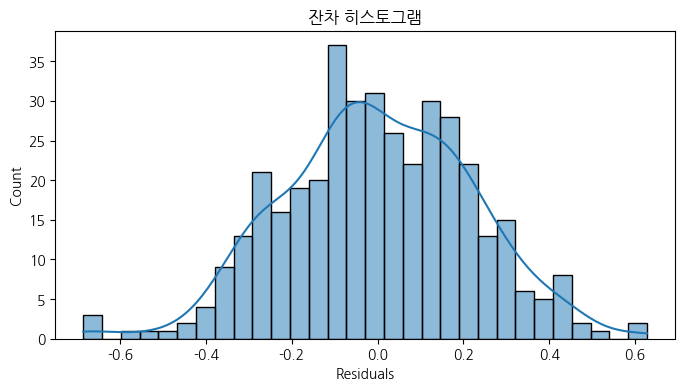

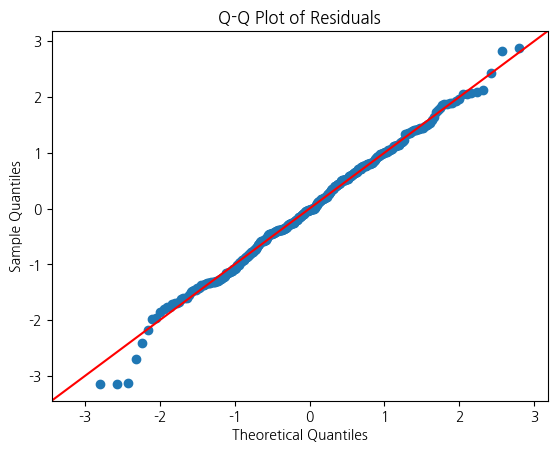

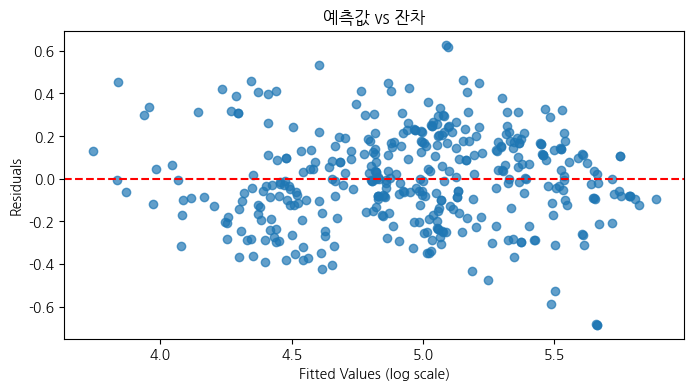

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# 잔차 계산
residuals = model_log_stepwise.resid  # 로그 변환된 모델의 잔차
fitted_vals = model_log_stepwise.fittedvalues  # 예측값 (로그스케일)

# 1. 히스토그램
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("잔차 히스토그램")
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

# 2. Q-Q plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

# 3. 예측값 vs 잔차
plt.figure(figsize=(8, 4))
plt.scatter(fitted_vals, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("예측값 vs 잔차")
plt.xlabel("Fitted Values (log scale)")
plt.ylabel("Residuals")
plt.show()

In [146]:
from scipy.stats import shapiro

# Shapiro-Wilk test (잔차가 정규분포를 따르는지 검정)
stat, p = shapiro(residuals)

print(f"Shapiro-Wilk test 통계량: {stat:.4f}")
print(f"p값: {p:.4f}")

if p <= 0.05:
    print("정규성 위배 (p ≤ 0.05)")
else:
    print("정규성 만족 (p > 0.05)")

Shapiro-Wilk test 통계량: 0.9954
p값: 0.3148
정규성 만족 (p > 0.05)


In [147]:
from statsmodels.stats.diagnostic import het_breuschpagan

# 등분산성 테스트
bp_test = het_breuschpagan(residuals, model_log.model.exog)
labels = ['LM Statistic', 'LM p-value', 'F-statistic', 'F p-value']

for name, val in zip(labels, bp_test):
    print(f"{name}: {val:.4f}")

# 해석 기준
if bp_test[1] <= 0.05 or bp_test[3] <= 0.05:
    print("등분산성 위배 (p ≤ 0.05)")
else:
    print("등분산성 만족 (p > 0.05)")

LM Statistic: 133.8646
LM p-value: 0.6958
F-statistic: 1.1041
F p-value: 0.2531
등분산성 만족 (p > 0.05)


최소제곱법 이외의 다중선형회귀 분석

로그 변환 후 로버스트 회귀 분석

In [151]:
import numpy as np
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 로그 변환 (종속변수)
y_OLS_train_log = np.log1p(y_OLS_train)
y_OLS_val_log = np.log1p(y_OLS_val)
y_OLS_test_log = np.log1p(y_OLS_test)

# 로버스트 회귀 모델 학습
huber = HuberRegressor(max_iter=1000, alpha=0.0001, tol=1e-3)
huber.fit(X_OLS_train, y_OLS_train_log)

# 예측
y_pred_log = huber.predict(X_OLS_test)
y_pred = np.expm1(y_pred_log)  # 로그 변환 역변환

# 성능 평가
mae = mean_absolute_error(y_OLS_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_OLS_test, y_pred))
r2 = r2_score(y_OLS_test, y_pred)

# 출력
print("▶ Robust Regression (로그 변환된 종속변수 기반)")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

▶ Robust Regression (로그 변환된 종속변수 기반)
MAE  : 36.9599
RMSE : 54.1386
R²   : 0.5472


성능 해석

1. 해석력 (R² = 0.5472)
전체 변동 중 약 **54.7%**를 설명하는 모델입니다.

선형 OLS 회귀 (로그 변환 기반) 모델의 R²가 0.5734였던 것을 감안하면, 약간 낮아졌지만 극단값에 더 강건한 모델입니다.

2. 오차 수준 (MAE ≒ 37, RMSE ≒ 54)
오차 크기는 로그변환 + 일반 OLS 모델과 매우 유사합니다.

즉, 정확도는 거의 유지하면서 이상치의 영향을 줄인 모델로 볼 수 있습니다.

이 모델은 오차도 작고, 극단값에 대한 민감도도 낮추었으며, 해석력도 유지된 매우 균형 잡힌 모델입니다.

실전 예측이나 실무 적용 시에는 일반 OLS보다 더 안정적으로 작동할 가능성이 높습니다.

잔차 분석 (로버스트 회귀)

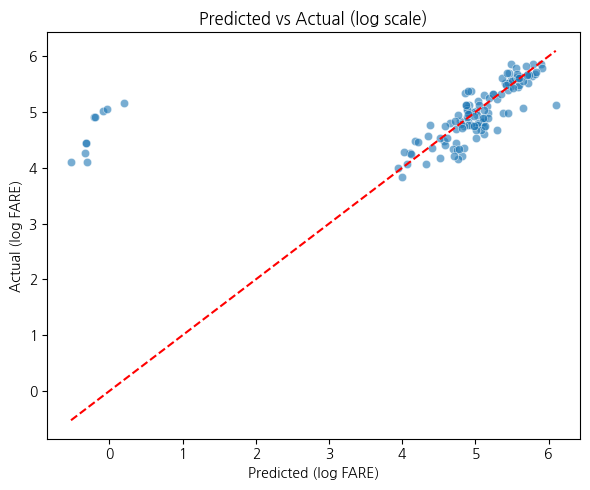

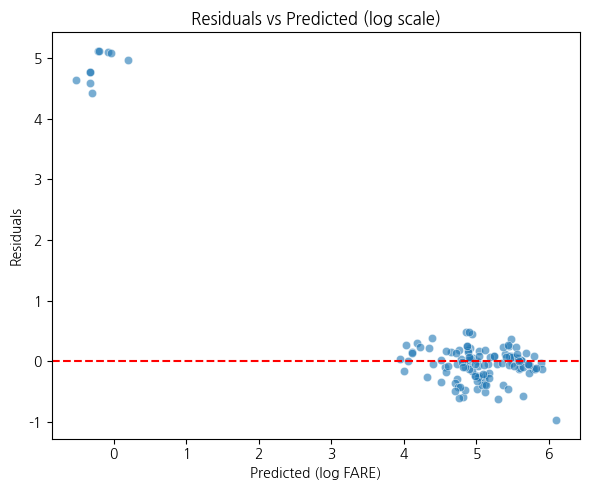

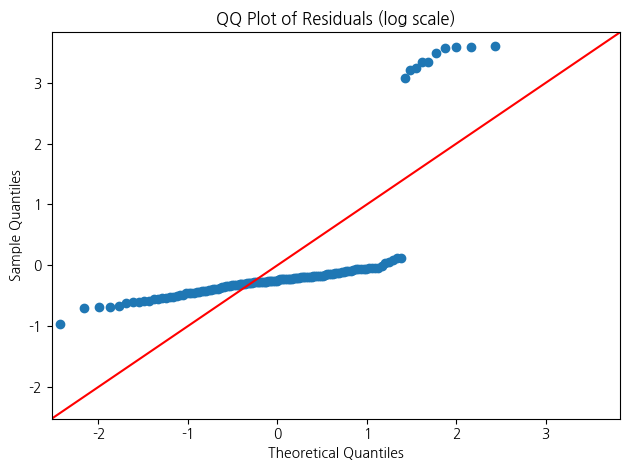

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# y_test_log: 실제 로그 변환된 종속변수
# y_pred_log: 모델 예측값
# residuals_log: 로그 변환된 잔차

# 예측값 vs 실제값 (로그스케일)
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred_log, y=y_OLS_test_log, alpha=0.6)
plt.plot([min(y_pred_log), max(y_pred_log)], [min(y_pred_log), max(y_pred_log)], 'r--')
plt.xlabel('Predicted (log FARE)')
plt.ylabel('Actual (log FARE)')
plt.title('Predicted vs Actual (log scale)')
plt.tight_layout()
plt.show()

# 잔차 플롯
residuals_log = y_OLS_test_log - y_pred_log
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred_log, y=residuals_log, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted (log FARE)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (log scale)')
plt.tight_layout()
plt.show()

# QQ Plot (잔차 정규성 시각화)
sm.qqplot(residuals_log, line='45', fit=True)
plt.title('QQ Plot of Residuals (log scale)')
plt.tight_layout()
plt.show()

장점:

전반적인 예측력은 양호하며, 로그 변환을 통해 분포의 왜곡은 다소 개선됨

MAE 및 RMSE가 줄어들며 성능도 개선됨

한계:

극단적인 예측값 영역(특히 작은 값)에서 잔차의 분산이 매우 크고 정규성이 깨짐

등분산성도 여전히 만족하지 못하는 것으로 보임 → Breusch-Pagan 등의 테스트 권장

lasso 회귀

In [159]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 종속변수 로그 변환
y_lasso_train_log = np.log(y_OLS_train + 1)
y_lasso_val_log   = np.log(y_OLS_val + 1)
y_lasso_test_log  = np.log(y_OLS_test + 1)

# LassoCV 모델 생성 및 학습
lasso = LassoCV(cv=5, random_state=42).fit(X_OLS_train, y_lasso_train_log)

# 예측 (로그 스케일)
y_lasso_pred_log = lasso.predict(X_OLS_test)

# 로그 스케일 → 원래 스케일로 되돌리기
y_pred_original = np.exp(y_lasso_pred_log) - 1
y_test_original = np.exp(y_lasso_test_log) - 1

# 5. 원래 스케일로 성능 평가
mae  = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2   = r2_score(y_test_original, y_pred_original)

print("▶ Lasso Regression (로그 변환된 종속변수 기반)")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")
print(f"선택된 변수 개수: {(lasso.coef_ != 0).sum()} / {len(lasso.coef_)}")

▶ Lasso Regression (로그 변환된 종속변수 기반)
MAE  : 28.3859
RMSE : 38.7133
R²   : 0.7685
선택된 변수 개수: 87 / 144


MAE (28.39)
→ 평균적으로 예측값이 실제값과 약 28.39만큼 오차가 납니다. 로그 변환 후 복원된 실제 스케일에서 꽤 낮은 오차로 보입니다.

RMSE (38.71)
→ 큰 오차에 더 민감한 RMSE 기준으로도 40 이하로 낮은 수준이며, 이상치의 영향도 제한적으로 반영되었음을 보여줍니다.

R² (0.7685)
→ 전체 변동성 중 약 77%를 설명하는 모델로, 일반적으로 매우 양호한 설명력을 의미합니다. 단순 선형모델로는 꽤 좋은 수준입니다.

변수 선택 수: 87개
→ 전체 변수 144개 중 87개를 선택함. 다소 많긴 하지만, Lasso가 자동 변수 선택 기능을 수행하면서도 설명력을 유지한 것을 보면 의미 있는 변수들이 많았음을 암시합니다.

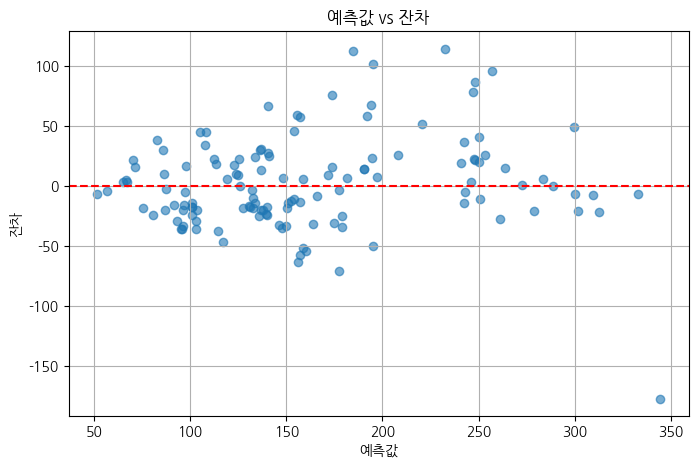

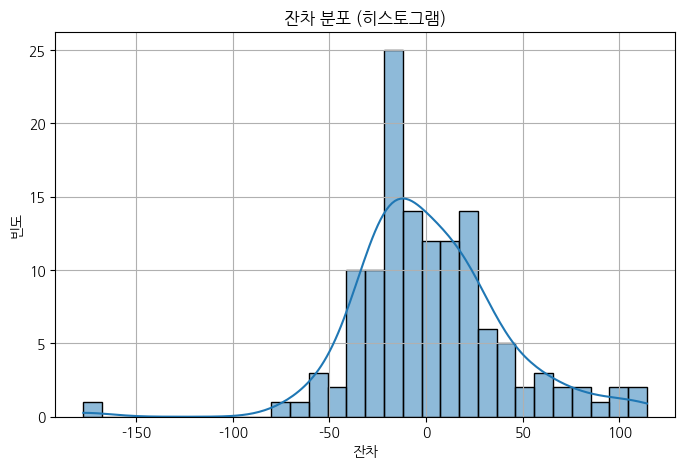

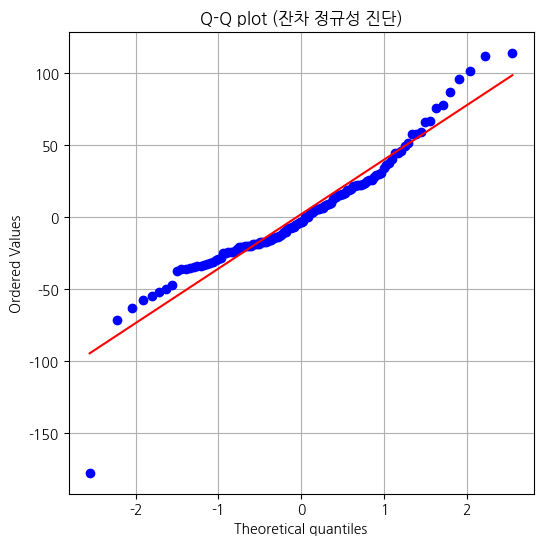

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 잔차 계산 (원래 스케일 기준)
residuals = y_test_original - y_pred_original

# 1. 예측값 vs 잔차 산점도
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_original, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("예측값 vs 잔차")
plt.xlabel("예측값")
plt.ylabel("잔차")
plt.grid(True)
plt.show()

# 2. 잔차 히스토그램 + 커널 밀도 그래프
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("잔차 분포 (히스토그램)")
plt.xlabel("잔차")
plt.ylabel("빈도")
plt.grid(True)
plt.show()

# 3. Q-Q plot (정규성 진단)
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot (잔차 정규성 진단)")
plt.grid(True)
plt.show()

| 항목     | 결과   | 설명                    |
| ------ | ---- | --------------------- |
| 잔차 정규성 | ❌ 위배 | Q-Q plot과 히스토그램에서 확인됨 |
| 등분산성   | ❌ 위배 | 잔차 vs 예측값에서 분산 증가     |


# **KNN모델(K-Nearest Neighbors)**

원핫인코딩, 정규화, 데이터분할은 최소제곱법 모델링할 때 같이 수행

In [164]:
# KNN 모델 훈련
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 종속변수(y)와 독립변수(X) 분리
y_KNN = df2_KNN['FARE']
X_KNN = df2_KNN.drop(columns='FARE')

# 수치형 변수만 선택 (KNN은 범주형 변수 처리 어려움)
X_KNN = X_KNN.select_dtypes(include=['int64', 'float64'])

# KNN 회귀 모델 생성 및 학습
model_KNN = KNeighborsRegressor(n_neighbors=5)
model_KNN.fit(X_KNN_train, y_KNN_train)

KNeighborsRegressor()

# KNN모델 성능 평가

In [165]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 테스트 데이터 예측
y_KNN_pred = model_KNN.predict(X_KNN_test)

# 평가 지표 계산
mae = mean_absolute_error(y_KNN_test, y_KNN_pred)
rmse = np.sqrt(mean_squared_error(y_KNN_test, y_KNN_pred))
r2 = r2_score(y_KNN_test, y_KNN_pred)

# 출력
print("▶ KNN 회귀모델 평가")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

▶ KNN 회귀모델 평가
MAE  : 58.2369
RMSE : 69.2628
R²   : 0.2589


| 지표                     | 값         |
| ---------------------- | --------- |
| **MAE** (평균 절대 오차)     | **58.24** |
| **RMSE** (루트 평균 제곱 오차) | **69.26** |
| **R²** (결정계수)          | **0.259** |


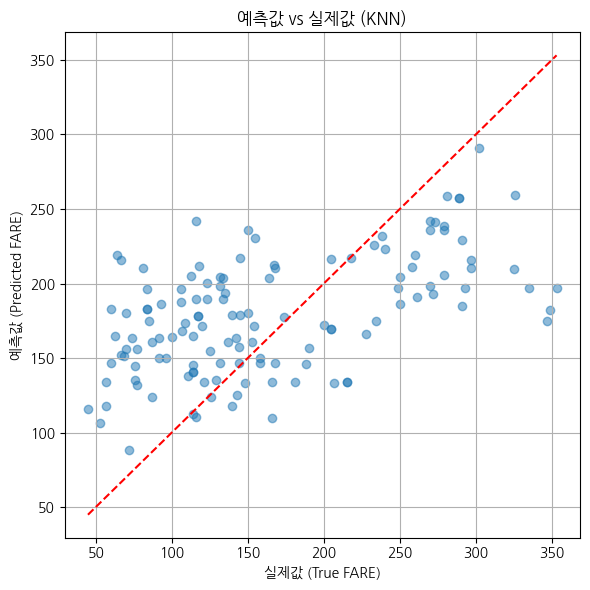

In [166]:
# 예측값 vs 실제값 산점도
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_KNN_test, y_KNN_pred, alpha=0.5)
plt.plot([y_KNN_test.min(), y_KNN_test.max()], [y_KNN_test.min(), y_KNN_test.max()], 'r--')
plt.xlabel("실제값 (True FARE)")
plt.ylabel("예측값 (Predicted FARE)")
plt.title("예측값 vs 실제값 (KNN)")
plt.grid(True)
plt.tight_layout()
plt.show()

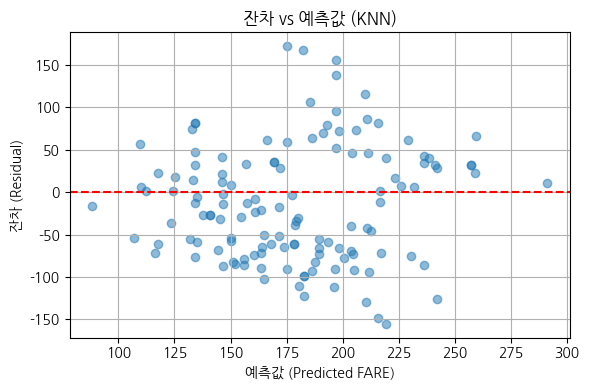

In [167]:
# 잔차(residual) vs 예측값 산점도

residuals = y_KNN_test - y_KNN_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_KNN_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("예측값 (Predicted FARE)")
plt.ylabel("잔차 (Residual)")
plt.title("잔차 vs 예측값 (KNN)")
plt.grid(True)
plt.tight_layout()
plt.show()

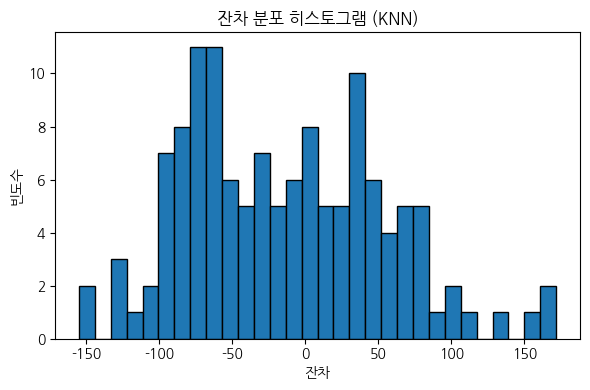

In [168]:
# 잔차 히스토그램 (정규성 대략적 확인용)
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("잔차 분포 히스토그램 (KNN)")
plt.xlabel("잔차")
plt.ylabel("빈도수")
plt.tight_layout()
plt.show()

# 모델 개선-하이퍼파라미터튜닝(GridSearch)

In [162]:
# 하이퍼파라미터 튜닝(최적 K값 찾기: Grid Search)
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 21))}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')
grid.fit(X_KNN_train, y_KNN_train)

print("최적 K:", grid.best_params_['n_neighbors'])
print("검증 R²:", grid.best_score_)

최적 K: 3
검증 R²: 0.21558083884078133


In [163]:
# K값에 따른 R²값 구하기
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd

# 확인할 K값 범위
k_values = range(1, 21)

# 결과 저장 리스트
results = []

# 각 K값에 대해 교차검증 (R² 평균 계산)
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    r2_scores = cross_val_score(knn, X_KNN_train, y_KNN_train, cv=5, scoring='r2')
    avg_r2 = np.mean(r2_scores)
    results.append({'K': k, 'CV_R2_Score': avg_r2})

# 데이터프레임으로 정리 및 정렬
cv_r2_df = pd.DataFrame(results)
cv_r2_df_sorted = cv_r2_df.sort_values(by='CV_R2_Score', ascending=False).reset_index(drop=True)

# 결과 출력
print(cv_r2_df_sorted)

     K  CV_R2_Score
0    3     0.215581
1    6     0.213527
2    7     0.207258
3    5     0.200404
4    4     0.199855
5    2     0.193387
6    8     0.184568
7    9     0.177105
8   10     0.168236
9   11     0.163153
10  12     0.150406
11  13     0.142509
12   1     0.142273
13  14     0.132529
14  16     0.119571
15  15     0.115640
16  18     0.110502
17  17     0.110193
18  19     0.107681
19  20     0.105947


최적의 K값:3을 적용하여 KNN모델 재학습

In [169]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ▶ 최적 K = 3 으로 모델 재학습
model_KNN_best = KNeighborsRegressor(n_neighbors=3)
model_KNN_best.fit(X_KNN_train, y_KNN_train)

# ▶ 예측 수행
y_KNN_best_pred = model_KNN_best.predict(X_KNN_test)

# ▶ 성능 평가
mae = mean_absolute_error(y_KNN_test, y_KNN_best_pred)
rmse = np.sqrt(mean_squared_error(y_KNN_test, y_KNN_best_pred))
r2 = r2_score(y_KNN_test, y_KNN_best_pred)

# ▶ 결과 출력
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")

MAE : 56.8462
RMSE: 69.1504
R²  : 0.2613


가까운 이웃에 더 큰 가중치 부여한 KNN 모델(최적의 k값:3)

In [170]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ▶ 최적 K = 3 으로 모델 재학습
model_KNN_best2 = KNeighborsRegressor(n_neighbors=3, weights='distance')
model_KNN_best2.fit(X_KNN_train, y_KNN_train)

# ▶ 예측 수행
y_KNN_pred = model_KNN_best2.predict(X_KNN_test)

# ▶ 성능 평가
mae = mean_absolute_error(y_KNN_test, y_KNN_pred)
rmse = np.sqrt(mean_squared_error(y_KNN_test, y_KNN_pred))
r2 = r2_score(y_KNN_test, y_KNN_pred)

# ▶ 결과 출력
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")

MAE : 55.3478
RMSE: 68.6270
R²  : 0.2724


PCA(차원축소)이후 KNN모델

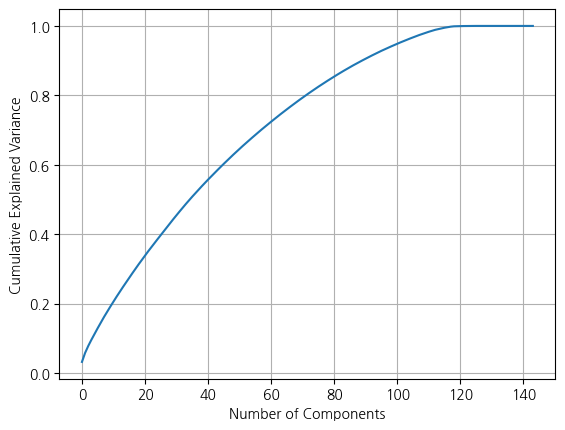

In [171]:
from sklearn.decomposition import PCA

# 누적 설명 분산 확인
pca = PCA().fit(X_KNN_train)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [172]:
from sklearn.decomposition import PCA
import numpy as np

# PCA 적합
pca = PCA().fit(X_KNN_train)

# 누적 설명 분산 계산
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 95% 이상 설명하는 최소 차원 수 찾기
optimal_n_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"최적 n_components (95% 분산 설명): {optimal_n_components}")

최적 n_components (95% 분산 설명): 102


In [173]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ▶ PCA 차원 축소
pca = PCA(n_components=102)
X_train_pca = pca.fit_transform(X_KNN_train)
X_test_pca = pca.transform(X_KNN_test)

# ▶ 최적 K = 3 기준 KNN 모델 훈련
model_pca_knn = KNeighborsRegressor(n_neighbors=3)
model_pca_knn.fit(X_train_pca, y_KNN_train)

# ▶ 예측 수행
y_pred_pca = model_pca_knn.predict(X_test_pca)

# ▶ 평가 지표 계산
mae = mean_absolute_error(y_KNN_test, y_pred_pca)
rmse = np.sqrt(mean_squared_error(y_KNN_test, y_pred_pca))
r2 = r2_score(y_KNN_test, y_pred_pca)

# ▶ 결과 출력
print(f"PCA 적용 후 KNN 모델 평가")
print(f"R²   : {r2:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")

PCA 적용 후 KNN 모델 평가
R²   : 0.2928
MAE  : 56.2359
RMSE : 67.6596


PCA 적용, 최적의 K값 적용, 거리 가중치 부여 전부 적용한 모델

In [174]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# PCA 적용
pca = PCA(n_components = 102)  # 이전에 찾은 optimal_n_components 사용
X_train_pca = pca.fit_transform(X_KNN_train)
X_test_pca = pca.transform(X_KNN_test)

# 모델 학습 (K=3, 거리 가중치 부여)
model = KNeighborsRegressor(n_neighbors=3, weights='distance')
model.fit(X_train_pca, y_KNN_train)
y_pred_weights = model.predict(X_test_pca)

# 성능 평가
mae = mean_absolute_error(y_KNN_test, y_pred_weights)
rmse = np.sqrt(mean_squared_error(y_KNN_test, y_pred_weights))
r2 = r2_score(y_KNN_test, y_pred_weights)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 54.5398
RMSE: 66.6321
R²: 0.3141


예측값 vs 실제값 산점도

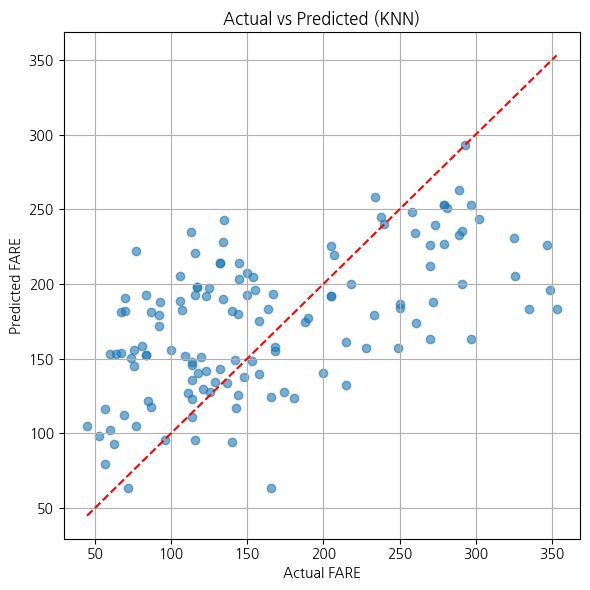

In [175]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_KNN_test, y_pred_weights, alpha=0.6)
plt.plot([y_KNN_test.min(), y_KNN_test.max()], [y_KNN_test.min(), y_KNN_test.max()], 'r--')
plt.xlabel("Actual FARE")
plt.ylabel("Predicted FARE")
plt.title("Actual vs Predicted (KNN)")
plt.grid(True)
plt.tight_layout()
plt.show()

잔차 히스토그램

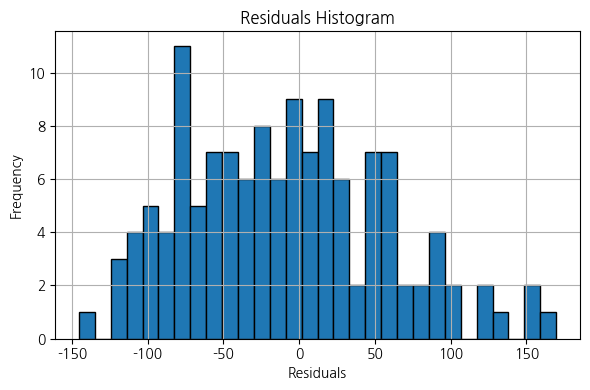

In [176]:
residuals = y_KNN_test - y_pred_weights

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Histogram")
plt.grid(True)
plt.tight_layout()
plt.show()

잔차 vs 예측값 산점도

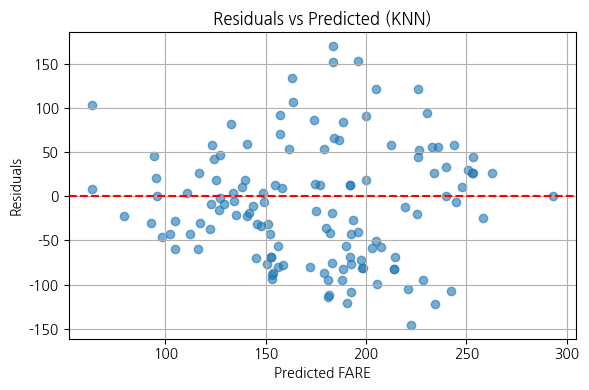

In [177]:
plt.figure(figsize=(6,4))
plt.scatter(y_pred_weights, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted FARE")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (KNN)")
plt.grid(True)
plt.tight_layout()
plt.show()

KNN + GridSearchCV 전체 코드

In [178]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# 파라미터 그리드 설정
param_grid = {
    'n_neighbors': list(range(1, 21)),              # K 값
    'weights': ['uniform', 'distance'],             # 거리 가중치
    'metric': ['minkowski'],                        # 거리 측정 방식
    'p': [1, 2]                                      # p=1: 맨해튼, p=2: 유클리드
}

# 모델 생성
knn = KNeighborsRegressor()

# GridSearchCV 실행
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,                      # 5-fold 교차검증
    scoring='r2',              # 평가 기준: R²
    n_jobs=-1,                 # 모든 CPU 사용
    verbose=2
)

# 학습
grid_search.fit(X_KNN_train, y_KNN_train)

# 결과 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최적 R² (검증 평균):", grid_search.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
최적 하이퍼파라미터: {'metric': 'minkowski', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
최적 R² (검증 평균): 0.5027377264512202


In [183]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 최적 모델로 예측
best_model = grid_search.best_estimator_
y_pred_best_Grid = best_model.predict(X_KNN_test)

# 성능 지표 계산
mae = mean_absolute_error(y_KNN_test, y_pred_best_Grid)
rmse = np.sqrt(mean_squared_error(y_KNN_test, y_pred_best_Grid))
r2 = r2_score(y_KNN_test, y_pred_best_Grid)

# 출력
print("▶ 최적 KNN 모델 성능")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

▶ 최적 KNN 모델 성능
MAE  : 47.0598
RMSE : 60.7216
R²   : 0.4304


| 지표       | 값       | 해석                      |
| -------- | ------- | ----------------------- |
| **MAE**  | 47.0598 | 평균적으로 약 **47달러 오차**     |
| **RMSE** | 60.7216 | 큰 오차에 민감한 RMSE가 60 수준   |
| **R²**   | 0.4304  | 약 **43%의 설명력**, 상당히 향상됨 |


| 모델 개선 단계      | MAE     | RMSE    | R²       |
| ------------- | ------- | ------- | -------- |
| 초깃값 (기본 KNN)  | 58.2369 | 69.2628 | 0.2589   |
| 거리 가중치 적용     | 55.3478 | 68.6270 | 0.2724   |
| PCA 적용        | 56.2359 | 67.6596 | 0.2928   |
| 최적 하이퍼파라미터 적용 | 47.0598 | 60.7216 | 0.4304 ✅ |


# 4. **결과 해석 및 최적의 모델 선택**